In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

In [3]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\IOCL_data\1_2_2023_all_sensor_handheld_12 min expt\Syn_99sccm+so2_11 sccm_3min_5ppm\2302010696_MOX.csv')
df.head()

Time(sec)  UH1 Vtg(V)  MOX1(Ohms)  UH2 Vtg(V)  MOX2(Ohms)  UH3 Vtg(V)  \
0        0.0        0.00    250000.0           0      250000        0.00   
1        0.5        1.88    250000.0           1      250000        2.82   
2        1.0        1.88    250000.0           1      250000        2.82   
3        1.5        1.88    250000.0           1      250000        2.82   
4        2.0        1.88    250000.0           1      250000        2.82   

   MOX3(Ohms)  UH4 Vtg(V)  MOX4(Ohms)  Ambient Temperature(degC)  \
0    209138.1        0.00    250000.0                       25.4   
1    209154.1        2.02    250000.0                       25.4   
2    209155.5        2.02    250000.0                       25.5   
3    209169.7        2.02    250000.0                       25.4   
4    209185.9        2.02    250000.0                       25.4   

   Ambient Humdity(%%)  Ambient Pressure(hPa)  
0                 47.3                  759.9  
1                 47.3                  759.9  
2                 47.4                  759.9  
3                 47.4                  759.9  
4                 47.3                  759.9

# The algorithm for S02 gas 

In [10]:
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (65,66)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60,1
    
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]
    
    # Check if the slope between two points is within the threshold
    slope = np.abs(np.diff(current_data)).mean()
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        
        print(slope)
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx}--{start_idx+interval_length}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += 1


Slope (3883.94) not within threshold (65-66). Skipping interval 0--60
Slope (3884.87) not within threshold (65-66). Skipping interval 1--61
Slope (3885.83) not within threshold (65-66). Skipping interval 2--62
Slope (3886.77) not within threshold (65-66). Skipping interval 3--63
Slope (3887.76) not within threshold (65-66). Skipping interval 4--64
Slope (3438.02) not within threshold (65-66). Skipping interval 5--65
Slope (2977.95) not within threshold (65-66). Skipping interval 6--66
Slope (2512.83) not within threshold (65-66). Skipping interval 7--67
Slope (2044.33) not within threshold (65-66). Skipping interval 8--68
Slope (1573.36) not within threshold (65-66). Skipping interval 9--69
Slope (1100.47) not within threshold (65-66). Skipping interval 10--70
Slope (626.09) not within threshold (65-66). Skipping interval 11--71
Slope (150.44) not within threshold (65-66). Skipping interval 12--72
Slope (124.52) not within threshold (65-66). Skipping interval 13--73
Slope (108.06) not 

C:\Users\Admin\AppData\Local\Temp\ipykernel_13624\4128698862.py:21: RuntimeWarning: Mean of empty slice.
  slope = np.abs(np.diff(current_data)).mean()
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (15,73.60)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60,1
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]
    # Check if the slope between two points is within the threshold
    slope = np.abs(np.diff(current_data)).mean()
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        # Fit the change point detection algorithm to the current interval
        print("Its detected")
        print(slope)
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += interval_length


Slope (3883.94) not within threshold (15-73.6). Skipping interval 1.0
Slope (83.60) not within threshold (15-73.6). Skipping interval 2.0
Slope (109.00) not within threshold (15-73.6). Skipping interval 3.0
Slope (123.24) not within threshold (15-73.6). Skipping interval 4.0
Slope (129.93) not within threshold (15-73.6). Skipping interval 5.0
Slope (116.40) not within threshold (15-73.6). Skipping interval 6.0
Slope (102.85) not within threshold (15-73.6). Skipping interval 7.0
Slope (101.21) not within threshold (15-73.6). Skipping interval 8.0
Slope (98.23) not within threshold (15-73.6). Skipping interval 9.0
Slope (75.66) not within threshold (15-73.6). Skipping interval 10.0
Its detected
66.27644067796606
Slope (73.60) not within threshold (15-73.6). Skipping interval 12.0
Slope (76.55) not within threshold (15-73.6). Skipping interval 13.0
Slope (77.27) not within threshold (15-73.6). Skipping interval 14.0
Its detected
60.6286440677968
Its detected
64.13457627118648
Its detected

In [5]:
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (15,73.60)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60,1
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]
    # Check if the slope between two points is within the threshold
    slope = np.abs(np.diff(current_data)).mean()
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        # Fit the change point detection algorithm to the current interval
        print("Its detected")
        print(slope)
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += 1


Slope (3883.94) not within threshold (15-73.6). Skipping interval 1.0
Slope (3884.87) not within threshold (15-73.6). Skipping interval 1.0166666666666666
Slope (3885.83) not within threshold (15-73.6). Skipping interval 1.0333333333333334
Slope (3886.77) not within threshold (15-73.6). Skipping interval 1.05
Slope (3887.76) not within threshold (15-73.6). Skipping interval 1.0666666666666667
Slope (3438.02) not within threshold (15-73.6). Skipping interval 1.0833333333333333
Slope (2977.95) not within threshold (15-73.6). Skipping interval 1.1
Slope (2512.83) not within threshold (15-73.6). Skipping interval 1.1166666666666667
Slope (2044.33) not within threshold (15-73.6). Skipping interval 1.1333333333333333
Slope (1573.36) not within threshold (15-73.6). Skipping interval 1.15
Slope (1100.47) not within threshold (15-73.6). Skipping interval 1.1666666666666667
Slope (626.09) not within threshold (15-73.6). Skipping interval 1.1833333333333333
Slope (150.44) not within threshold (15

C:\Users\Admin\AppData\Local\Temp\ipykernel_12316\751304998.py:19: RuntimeWarning: Mean of empty slice.
  slope = np.abs(np.diff(current_data)).mean()
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Slope (104.94) not within threshold (0-10). Skipping interval 1.0
Slope (104.92) not within threshold (0-10). Skipping interval 1.0166666666666666
Slope (104.94) not within threshold (0-10). Skipping interval 1.0333333333333334
Slope (105.01) not within threshold (0-10). Skipping interval 1.05
Slope (105.05) not within threshold (0-10). Skipping interval 1.0666666666666667
Slope (105.13) not within threshold (0-10). Skipping interval 1.0833333333333333
Slope (105.23) not within threshold (0-10). Skipping interval 1.1
Slope (105.34) not within threshold (0-10). Skipping interval 1.1166666666666667
Slope (105.47) not within threshold (0-10). Skipping interval 1.1333333333333333
Slope (105.58) not within threshold (0-10). Skipping interval 1.15
Slope (105.68) not within threshold (0-10). Skipping interval 1.1666666666666667
Slope (105.75) not within threshold (0-10). Skipping interval 1.1833333333333333
Slope (105.80) not within threshold (0-10). Skipping interval 1.2
Slope (105.83) not w

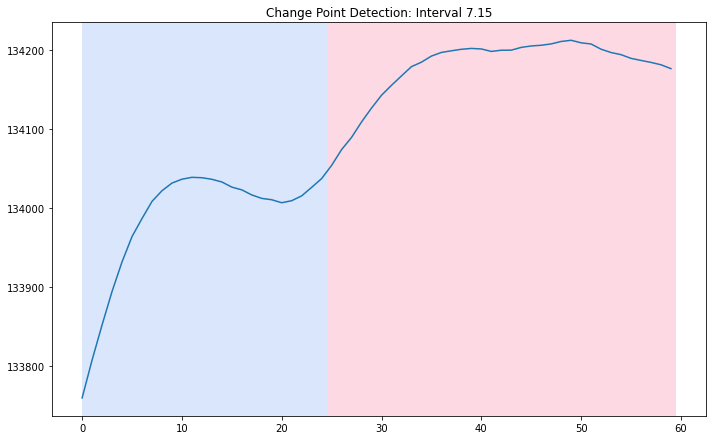

Its detected
8.749152542374064


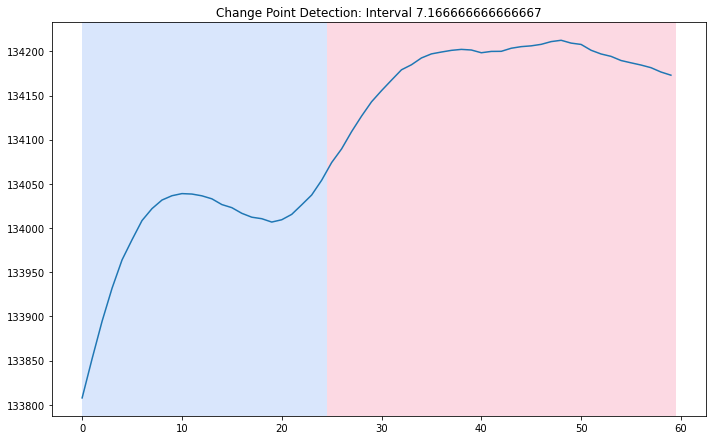

Its detected
8.059322033899292


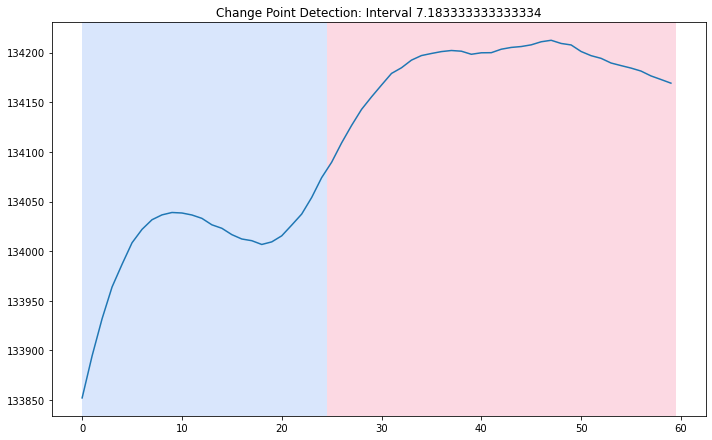

Its detected
7.393220338983742


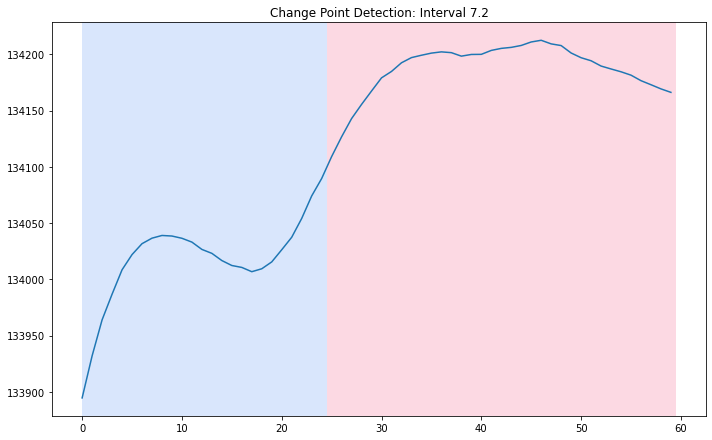

Its detected
6.798305084746355


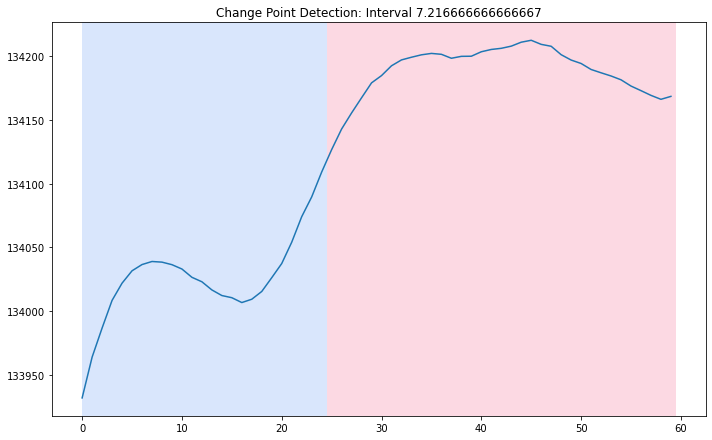

Its detected
6.259322033899094


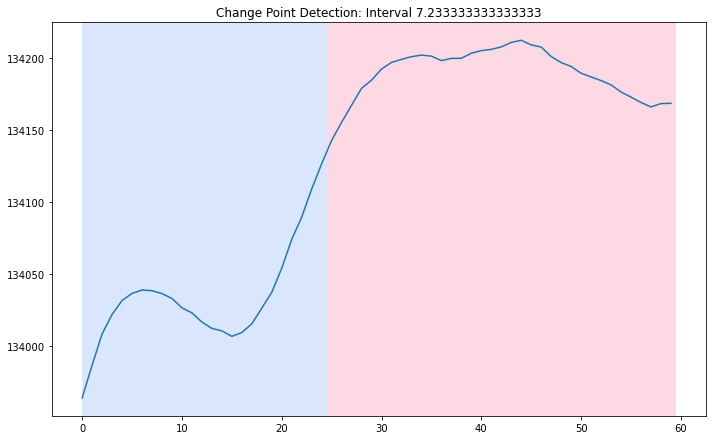

Its detected
5.874576271187526


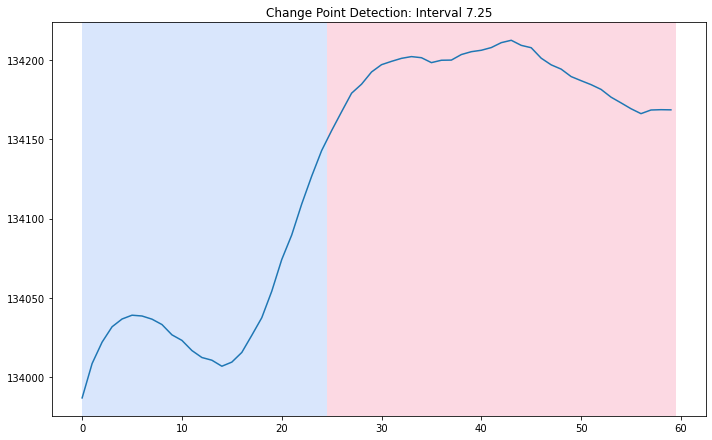

Its detected
5.574576271187329


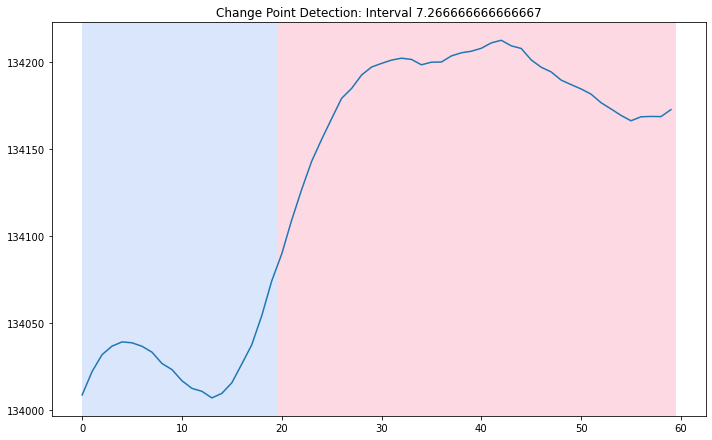

Its detected
5.461016949153233


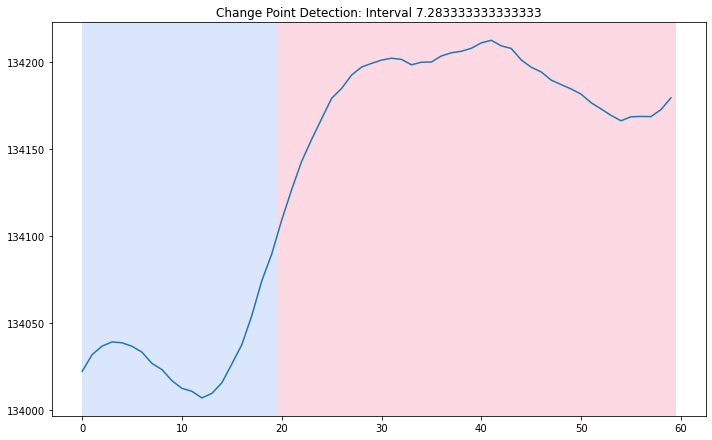

Its detected
5.469491525424419


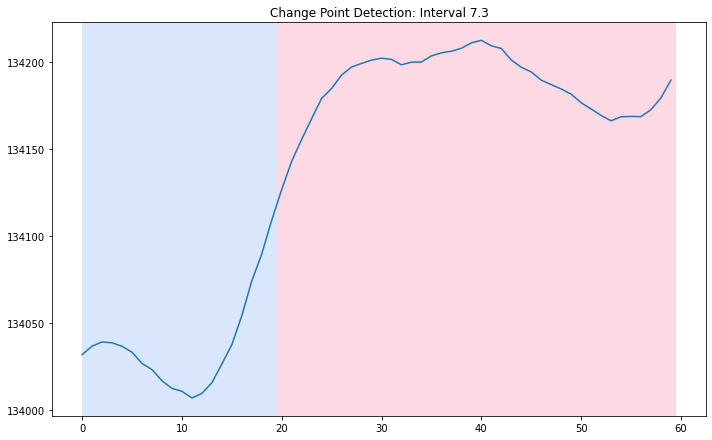

Its detected
5.598305084746552


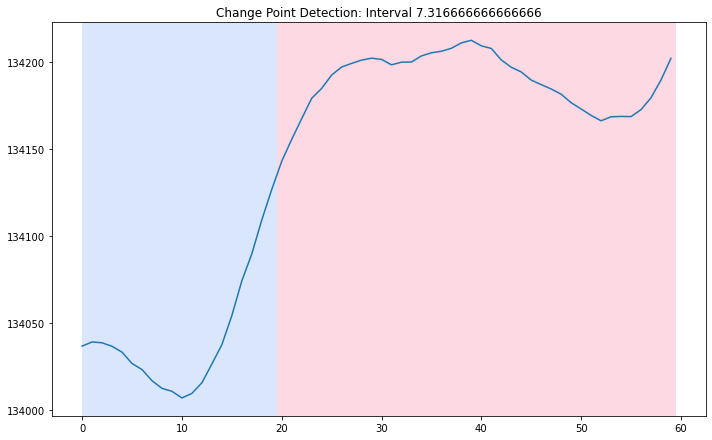

Its detected
5.784745762712654


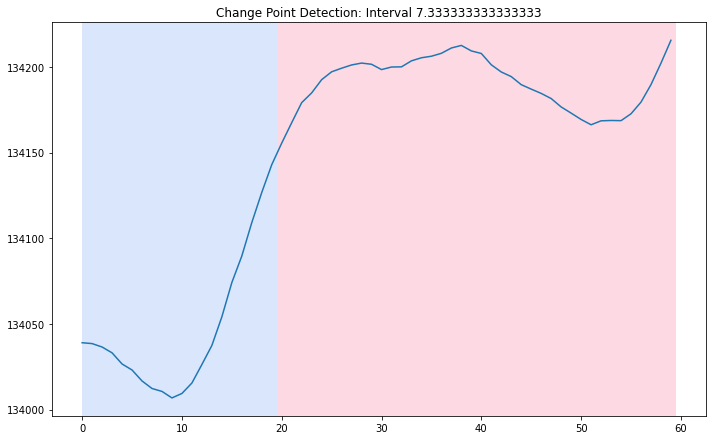

Its detected
6.013559322034688


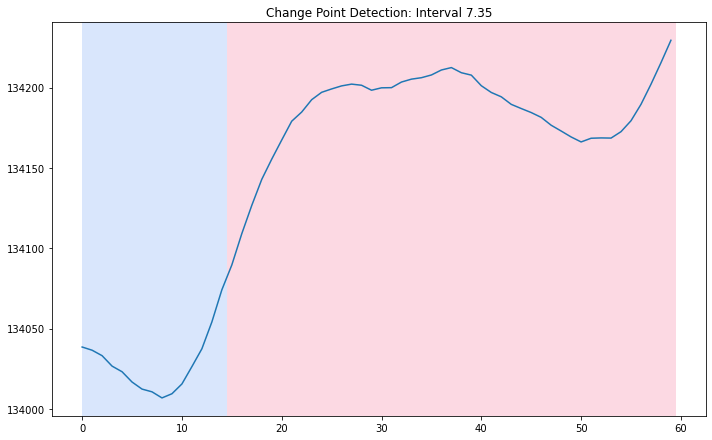

Its detected
6.2271186440686845


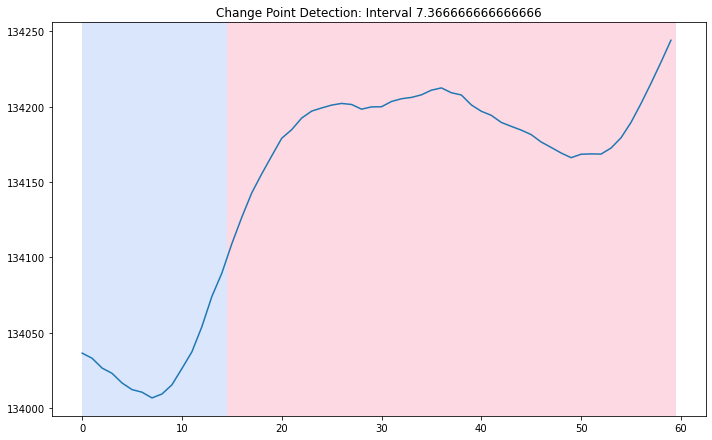

Its detected
6.545762711865097


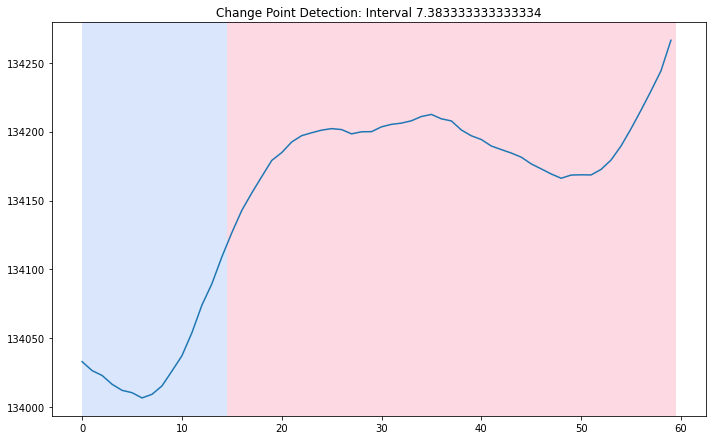

Its detected
6.850847457627809


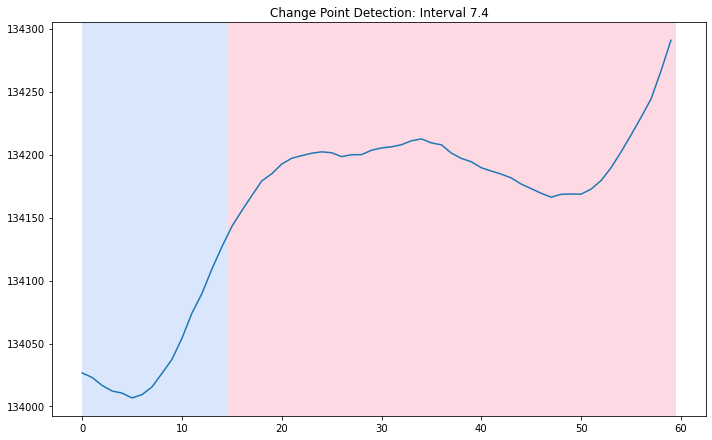

Its detected
7.188135593221424


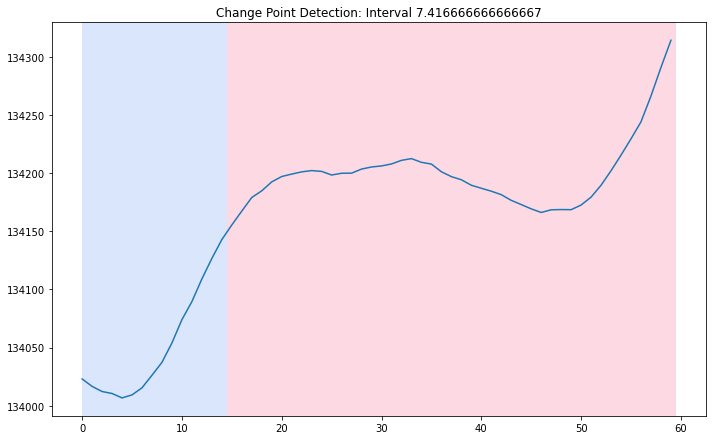

Its detected
7.467796610170577


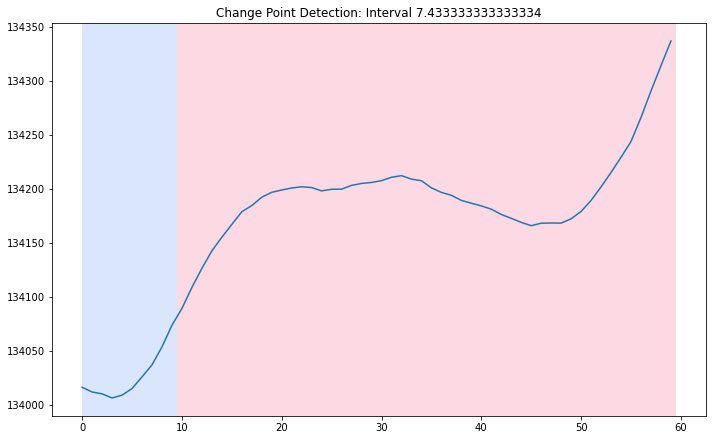

Its detected
7.755932203390422


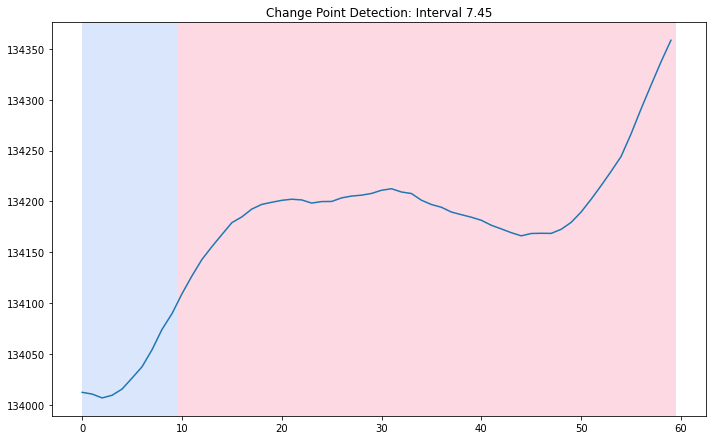

Its detected
8.074576271187329


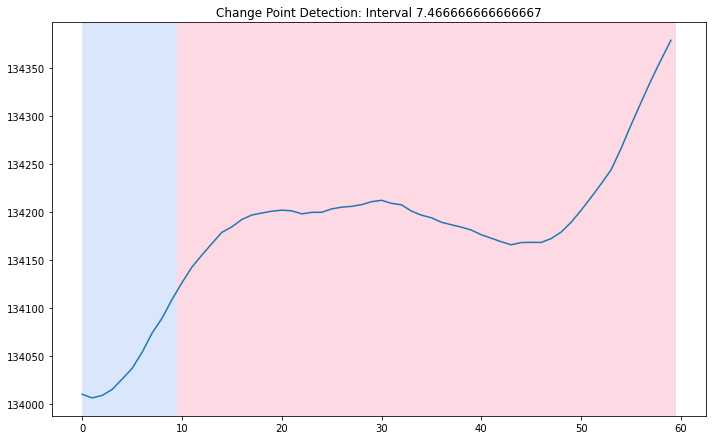

Its detected
8.311864406780055


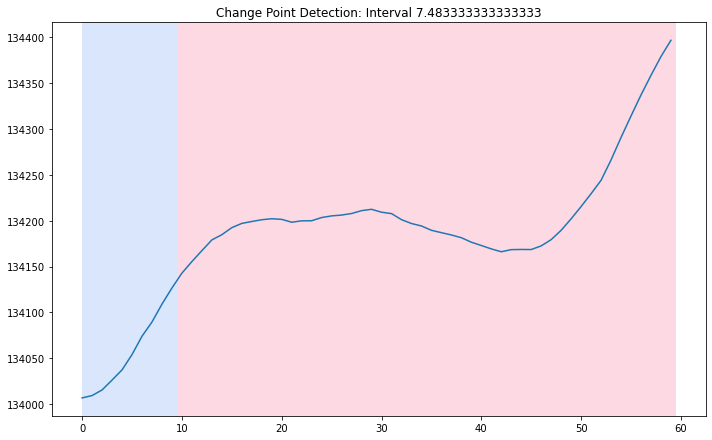

Its detected
8.591525423729209


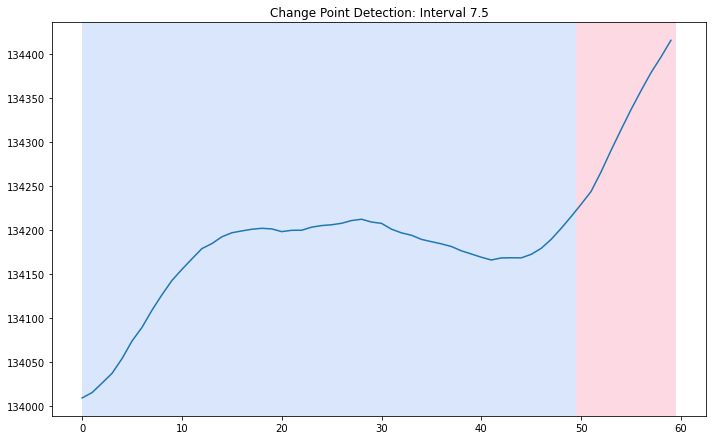

Its detected
8.728813559322527


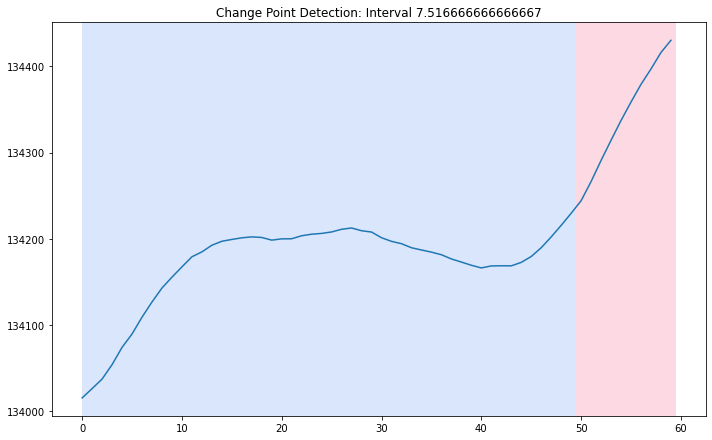

Its detected
8.679661016949744


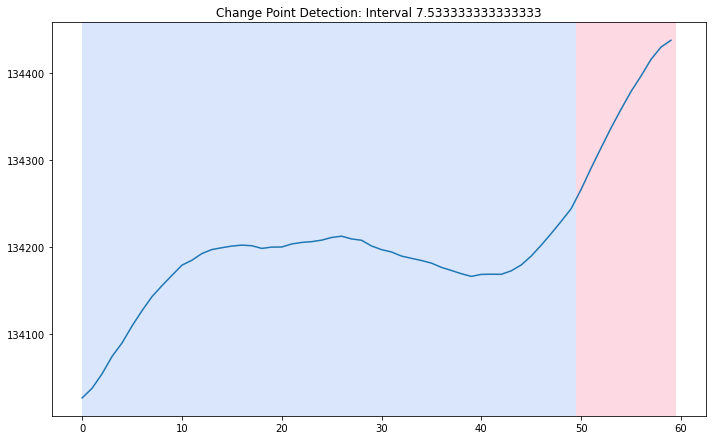

Its detected
8.649152542373177


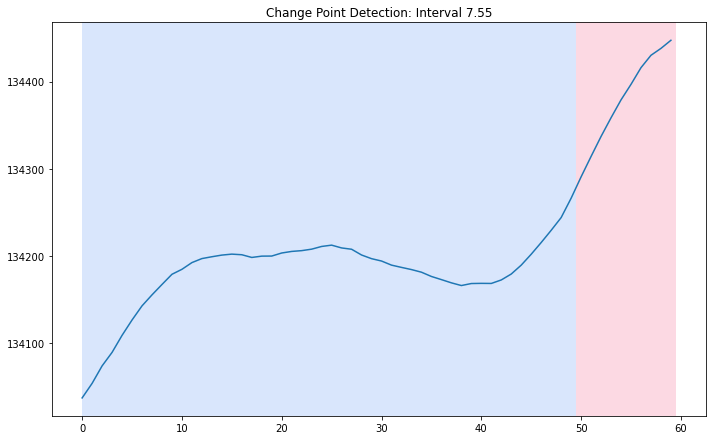

Its detected
8.491525423729307


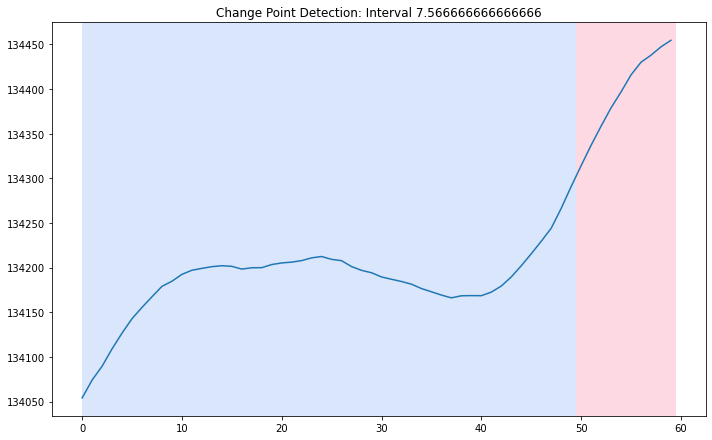

Its detected
8.249152542373078


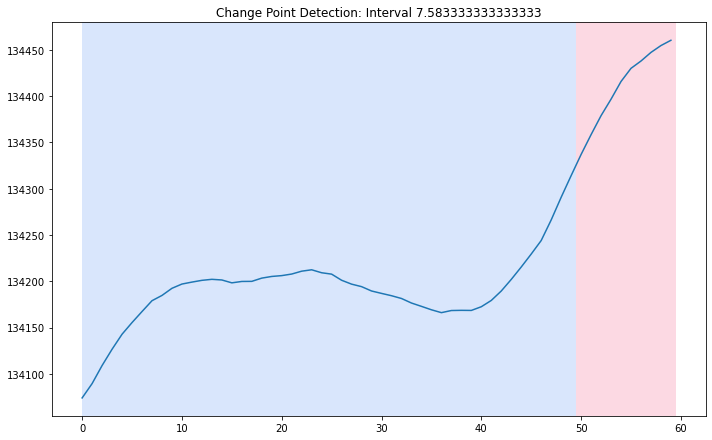

Its detected
8.023728813559716


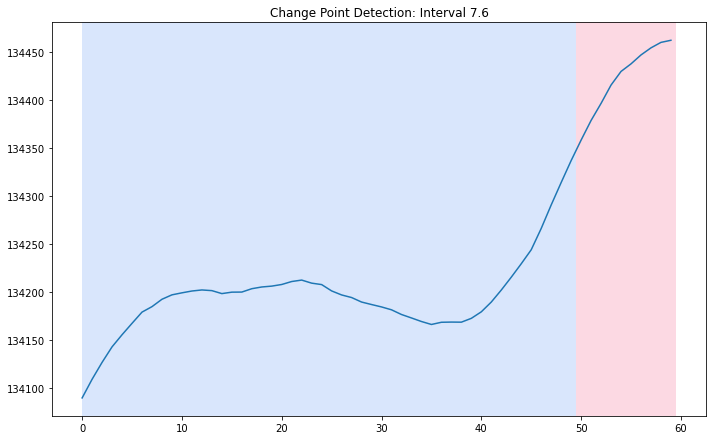

Its detected
7.710169491525819


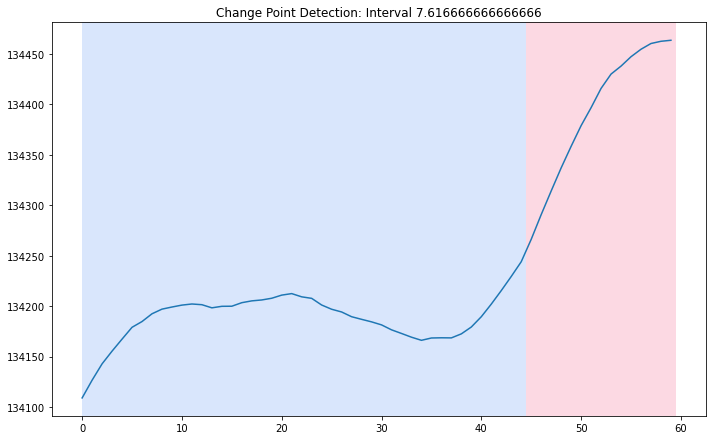

Its detected
7.423728813559816


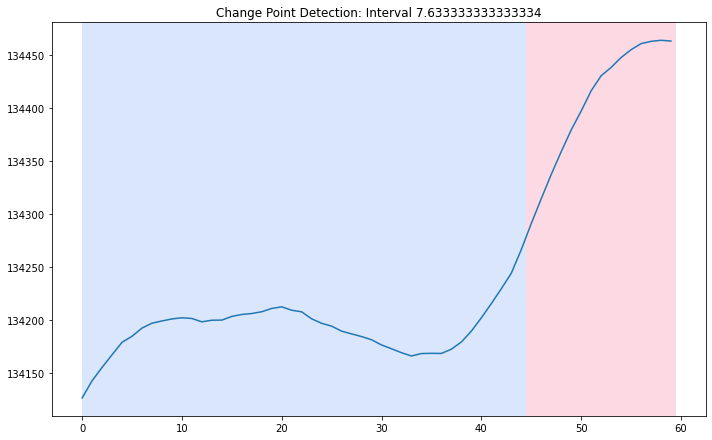

Its detected
7.194915254237781


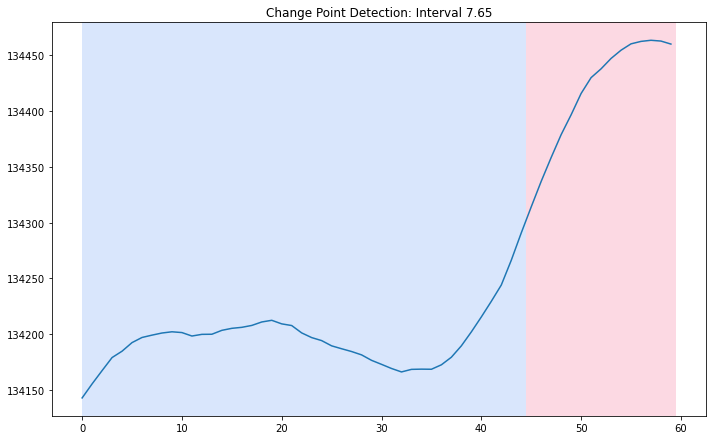

Its detected
7.0406779661020895


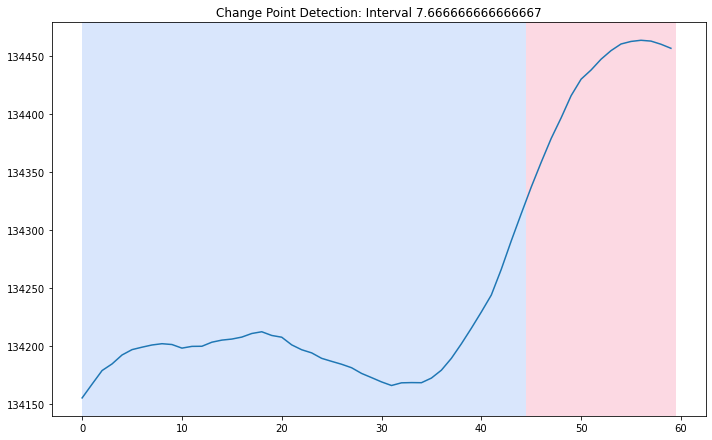

Its detected
6.932203389831002


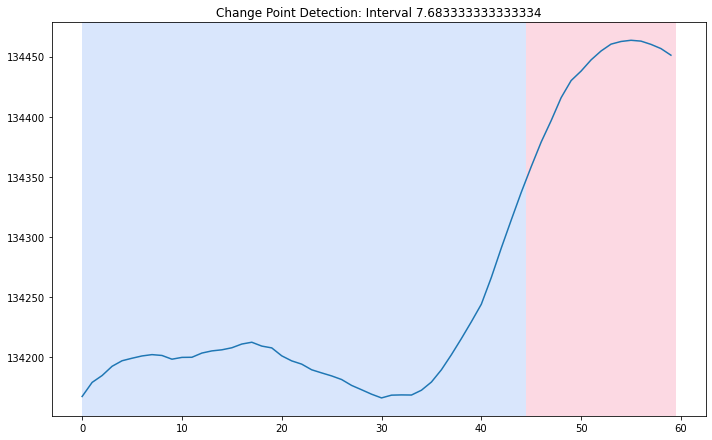

Its detected
6.847457627119137


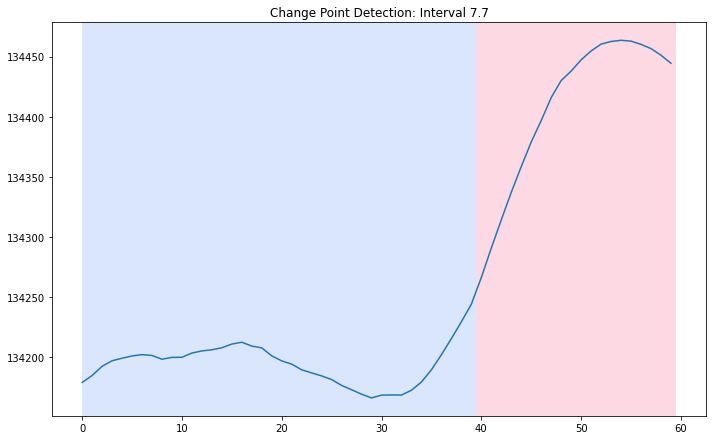

Its detected
6.896610169492413


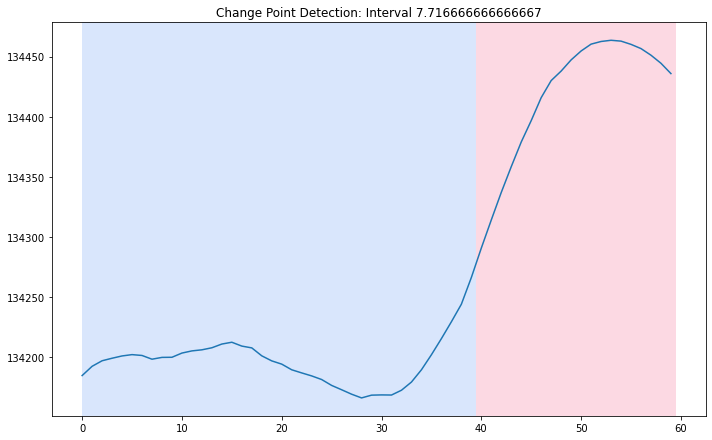

Its detected
6.891525423729406


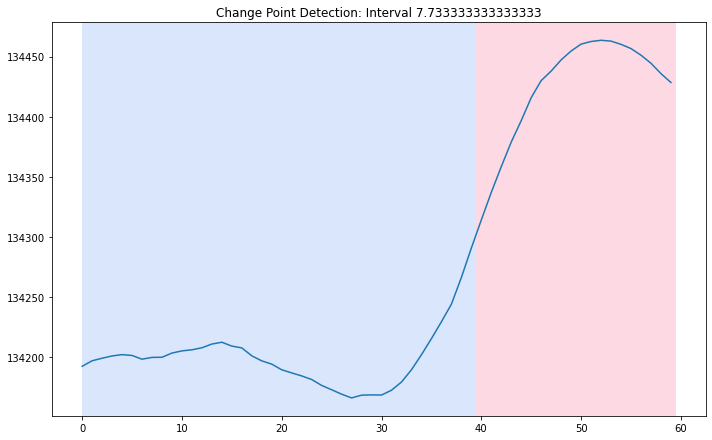

Its detected
7.003389830509165


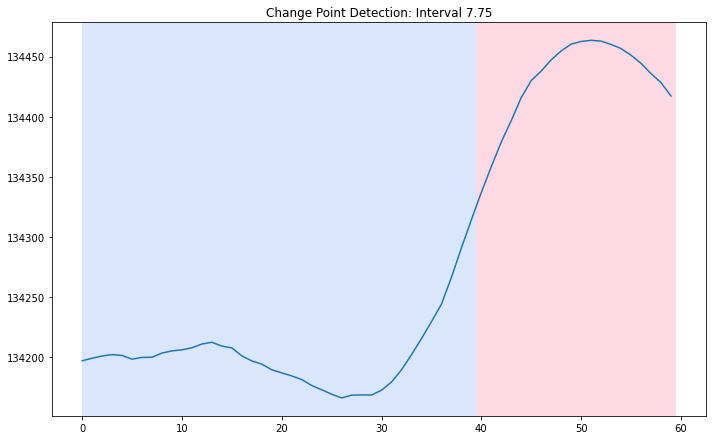

Its detected
7.201694915254632


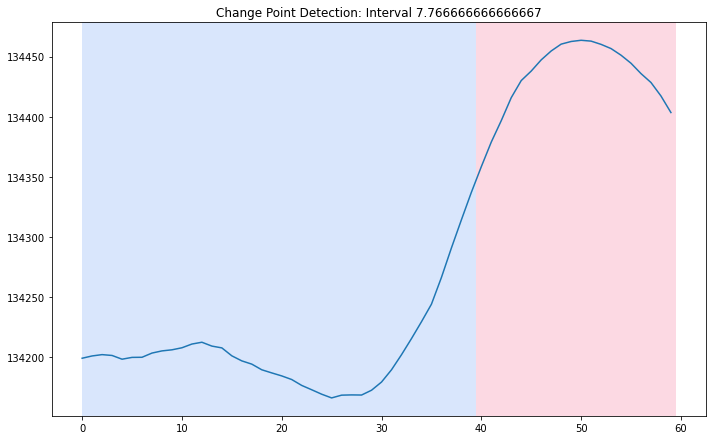

Its detected
7.411864406779957


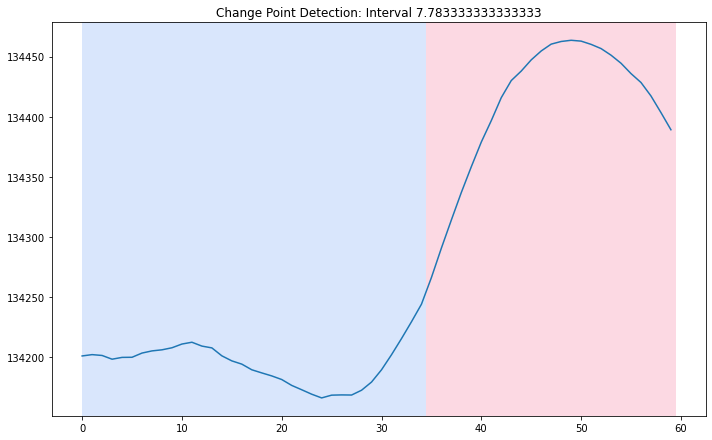

Its detected
7.603389830509067


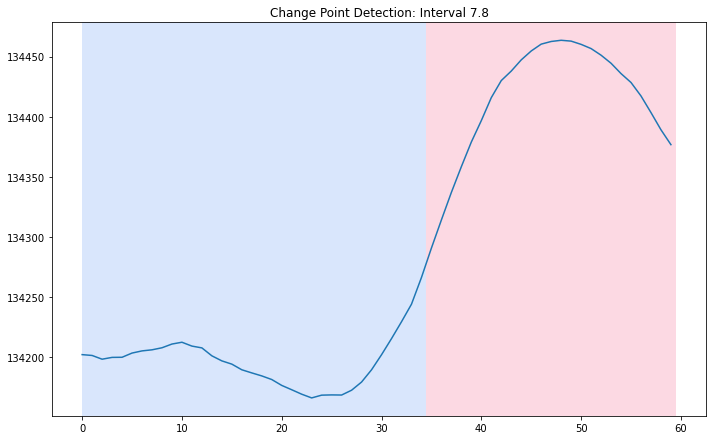

Its detected
7.933898305084845


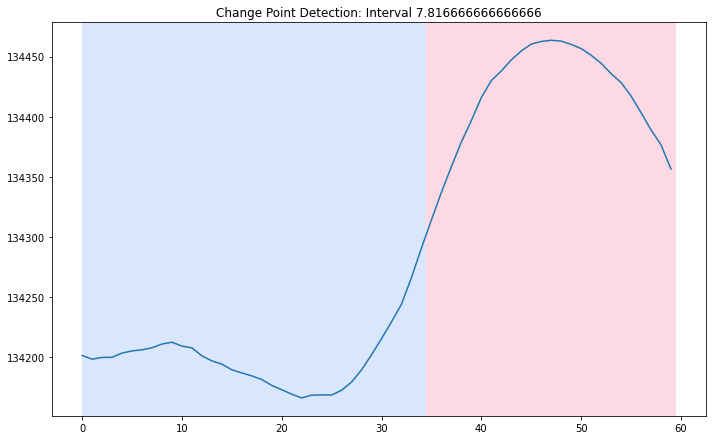

Its detected
8.244067796610071


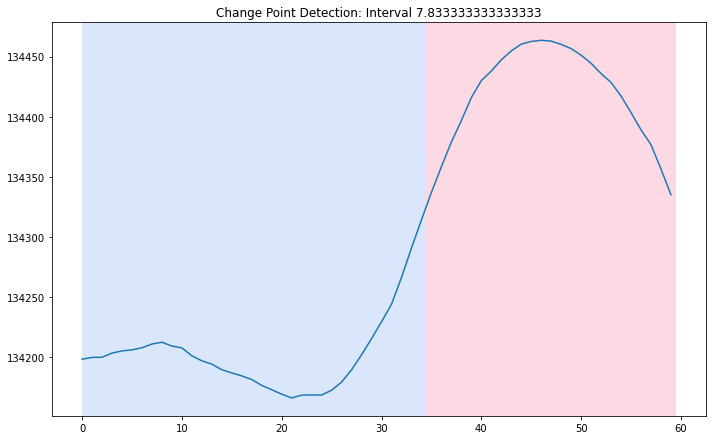

Its detected
8.627118644067796


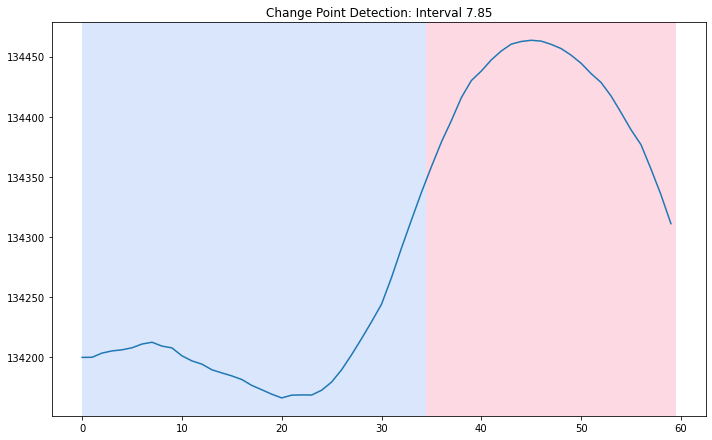

Its detected
9.089830508474378


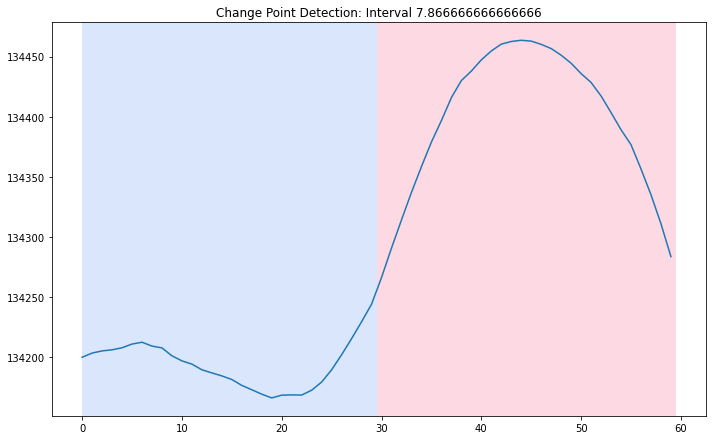

Its detected
9.503389830508672


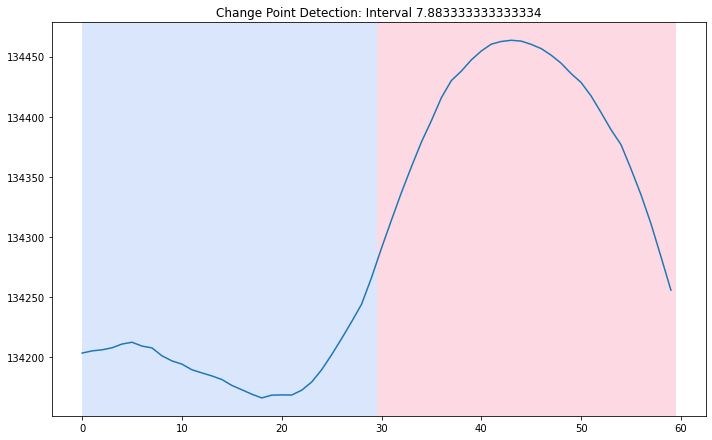

Its detected
9.901694915254435


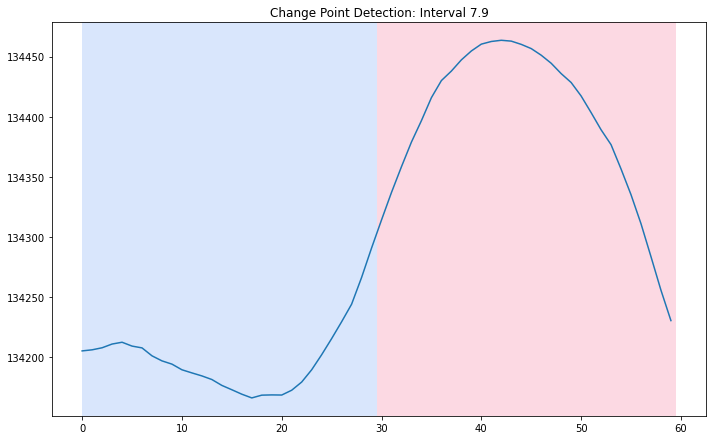

Slope (10.45) not within threshold (0-10). Skipping interval 7.916666666666667
Slope (11.02) not within threshold (0-10). Skipping interval 7.933333333333334
Slope (11.46) not within threshold (0-10). Skipping interval 7.95
Slope (11.95) not within threshold (0-10). Skipping interval 7.966666666666667
Slope (12.39) not within threshold (0-10). Skipping interval 7.983333333333333
Slope (12.78) not within threshold (0-10). Skipping interval 8.0
Slope (13.03) not within threshold (0-10). Skipping interval 8.016666666666666
Slope (13.37) not within threshold (0-10). Skipping interval 8.033333333333333
Slope (13.57) not within threshold (0-10). Skipping interval 8.05
Slope (13.76) not within threshold (0-10). Skipping interval 8.066666666666666
Slope (13.88) not within threshold (0-10). Skipping interval 8.083333333333332
Slope (14.00) not within threshold (0-10). Skipping interval 8.1
Slope (13.99) not within threshold (0-10). Skipping interval 8.116666666666667
Slope (14.02) not within th

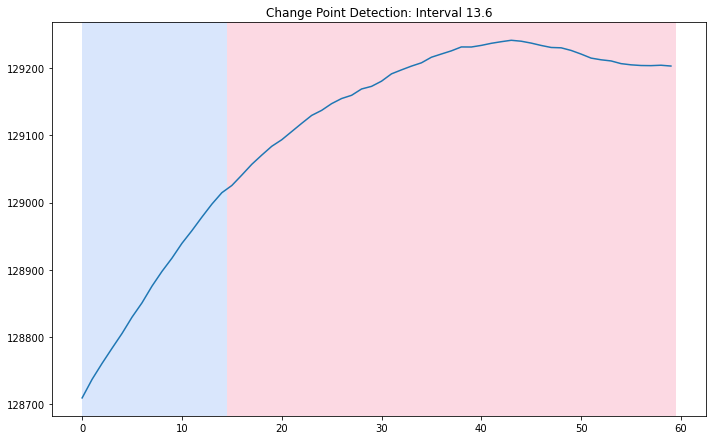

Its detected
9.266101694915697


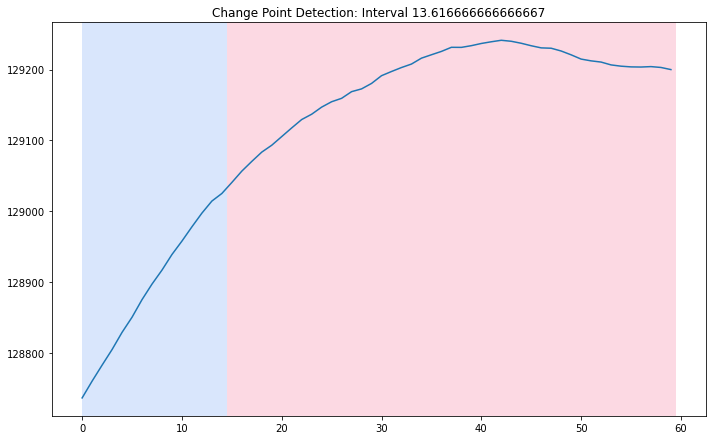

Its detected
8.877966101695211


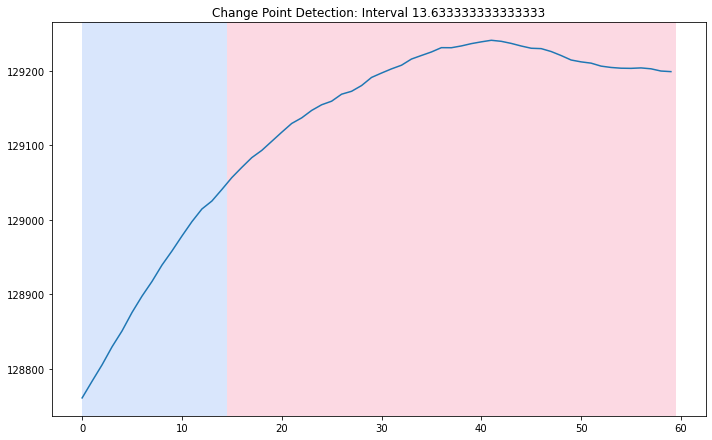

Its detected
8.523728813559716


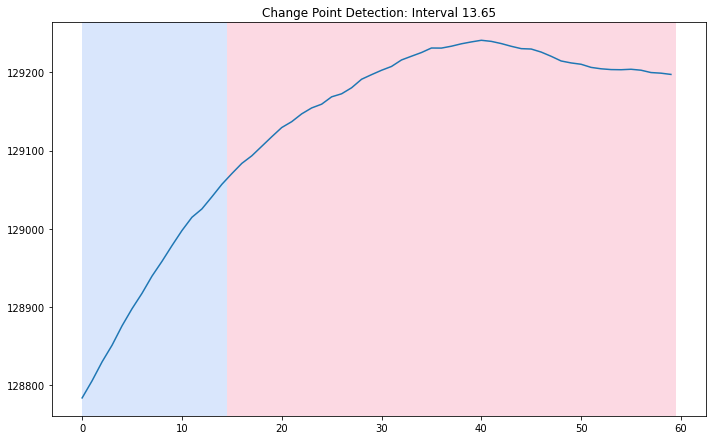

Its detected
8.208474576271483


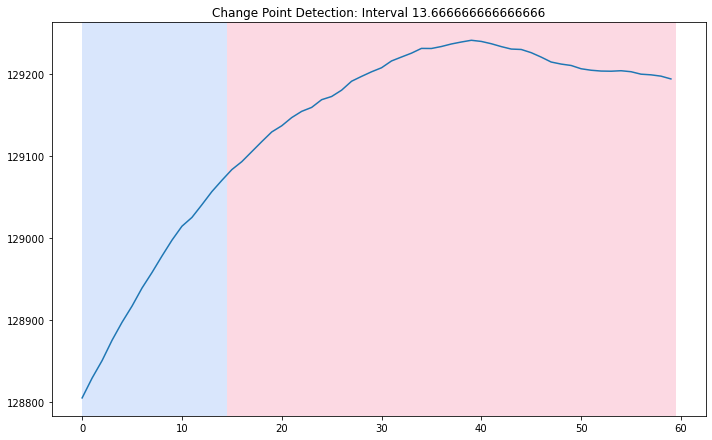

Its detected
7.903389830508771


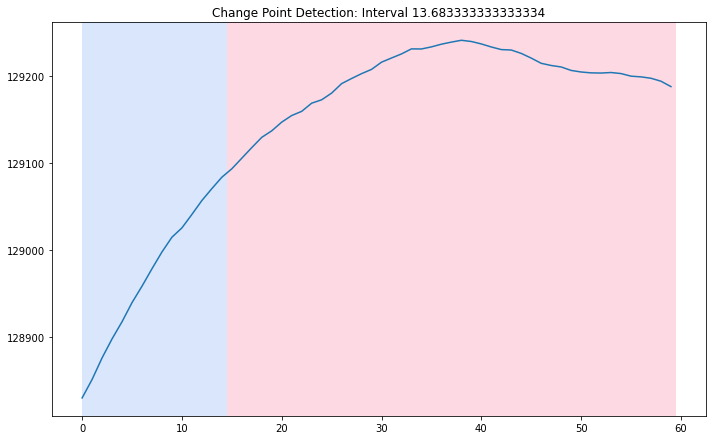

Its detected
7.674576271186736


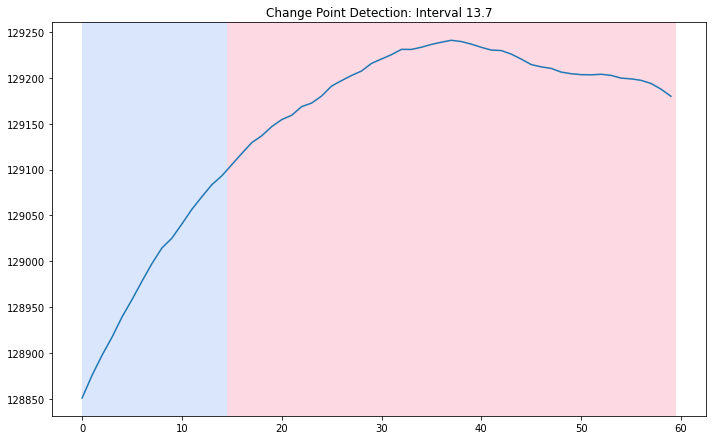

Its detected
7.364406779661263


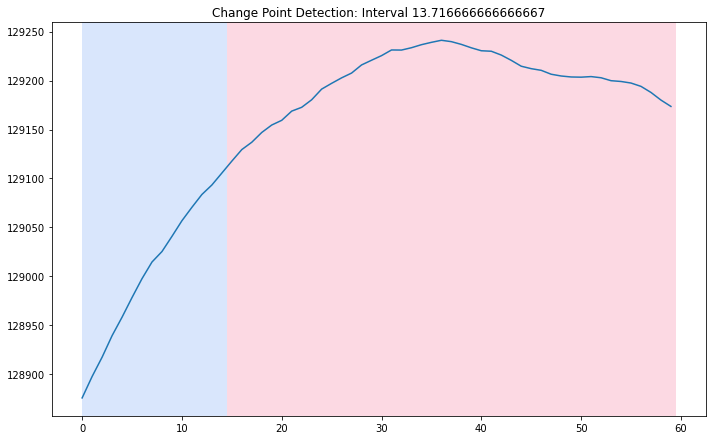

Its detected
7.100000000000148


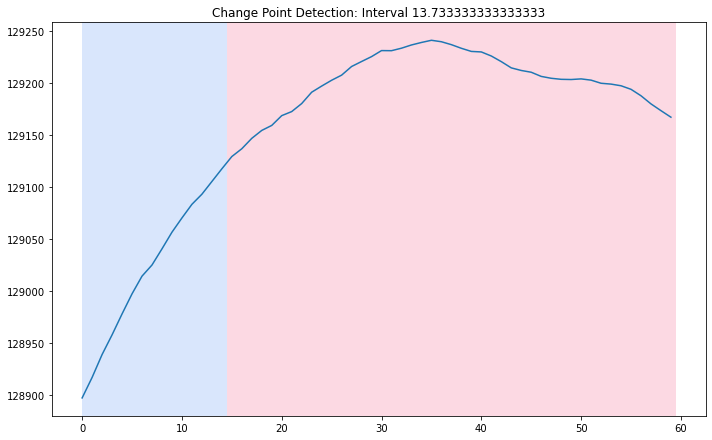

Its detected
6.908474576271532


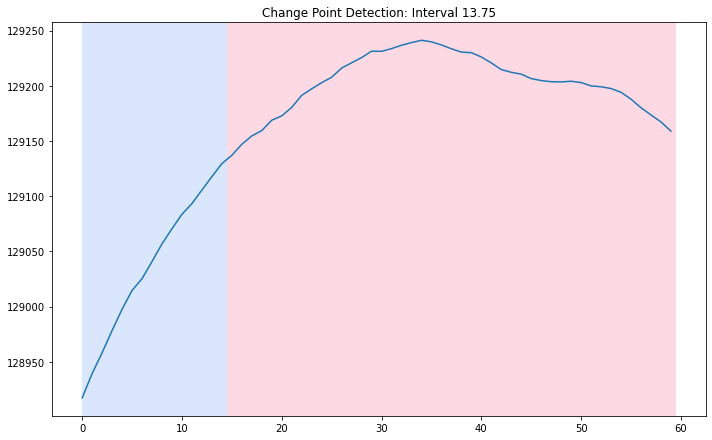

Its detected
6.6440677966104165


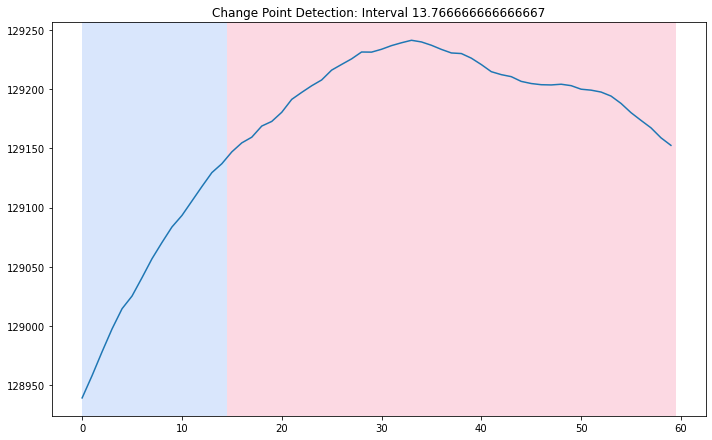

Its detected
6.423728813559569


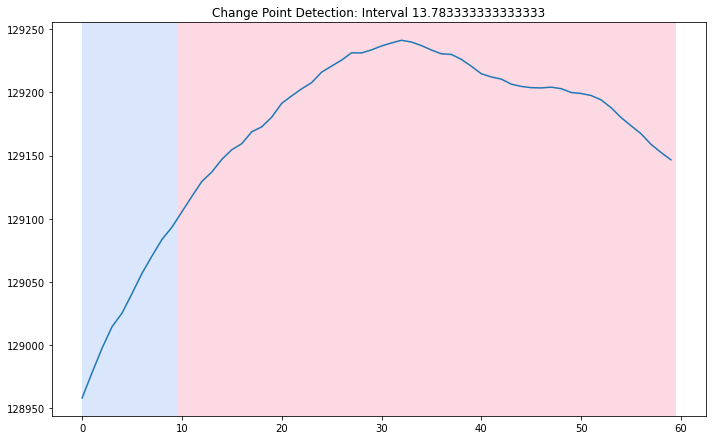

Its detected
6.171186440678311


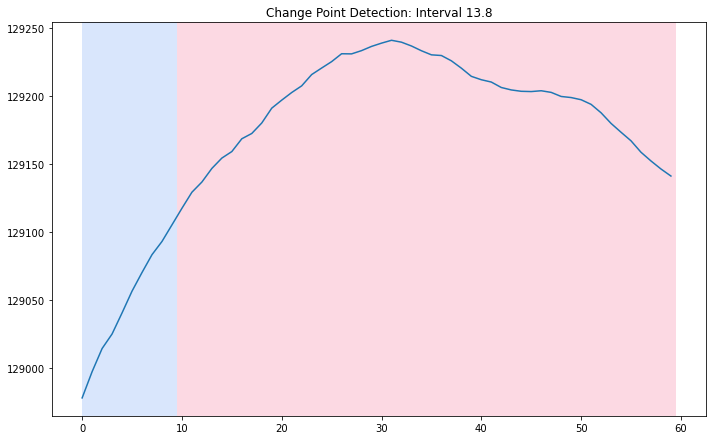

Its detected
5.938983050847606


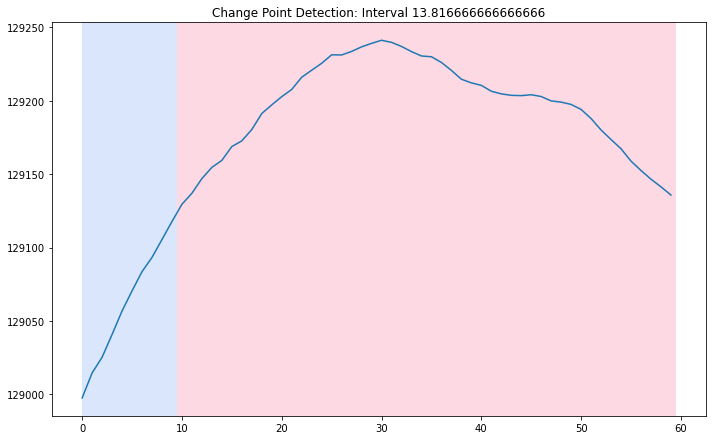

Its detected
5.7457627118646535


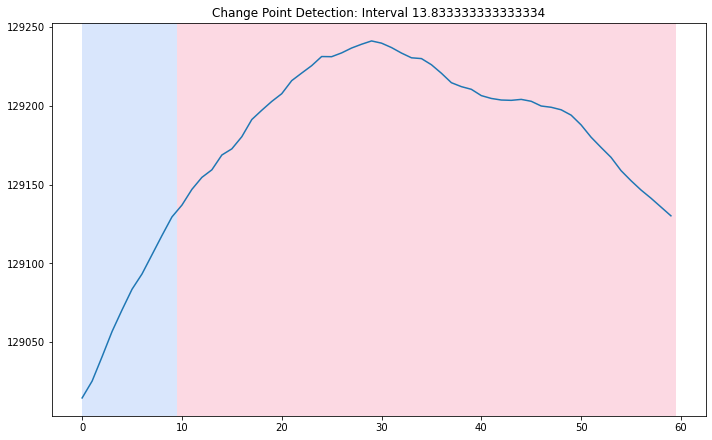

Its detected
5.637288135593566


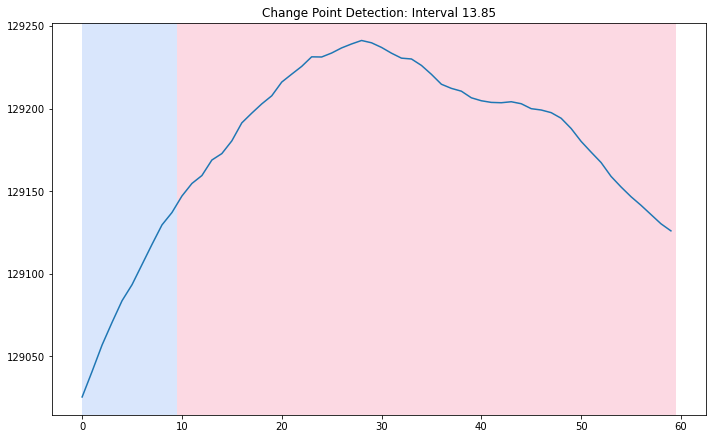

Its detected
5.449152542373128


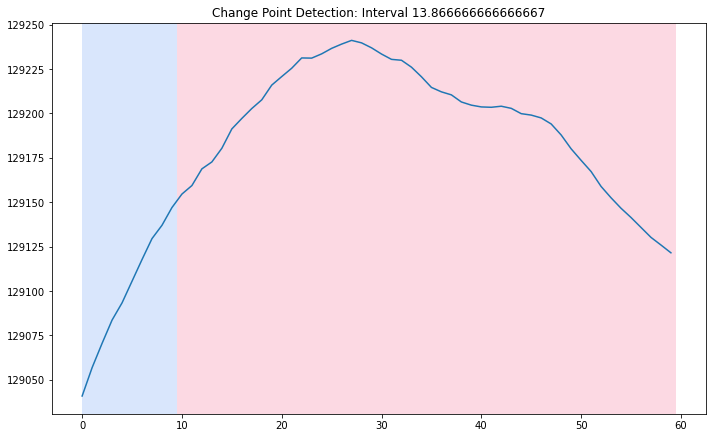

Its detected
5.247457627118989


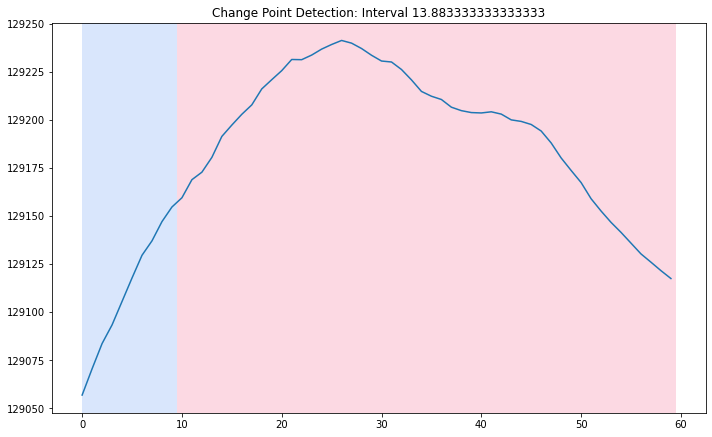

Its detected
5.12881355932238


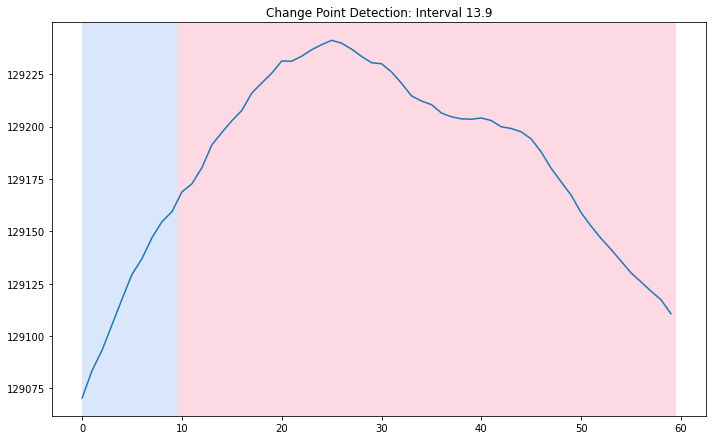

Its detected
5.028813559322232


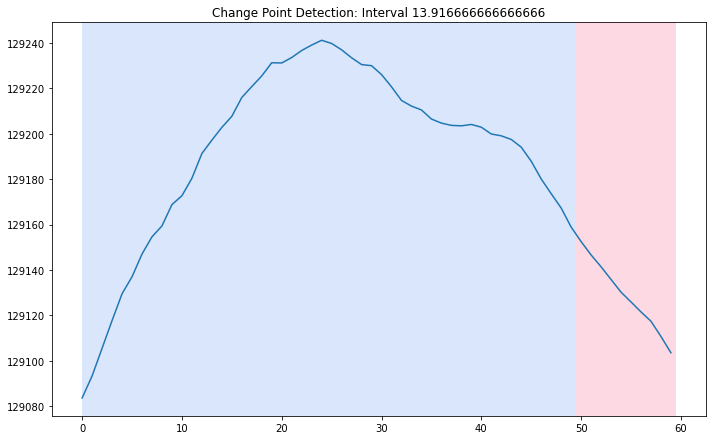

Its detected
5.008474576271433


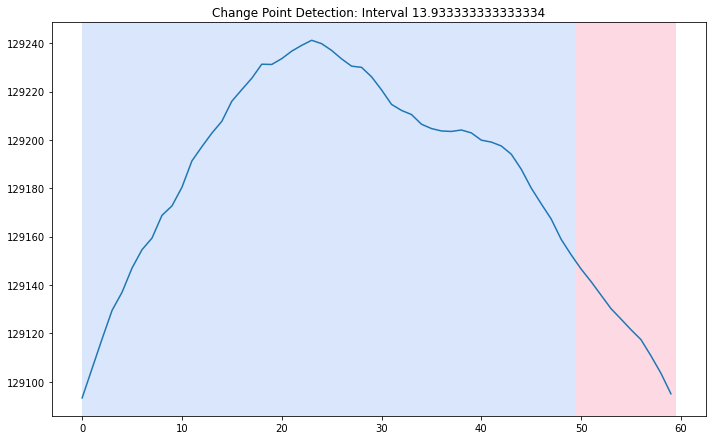

Its detected
4.933898305085091


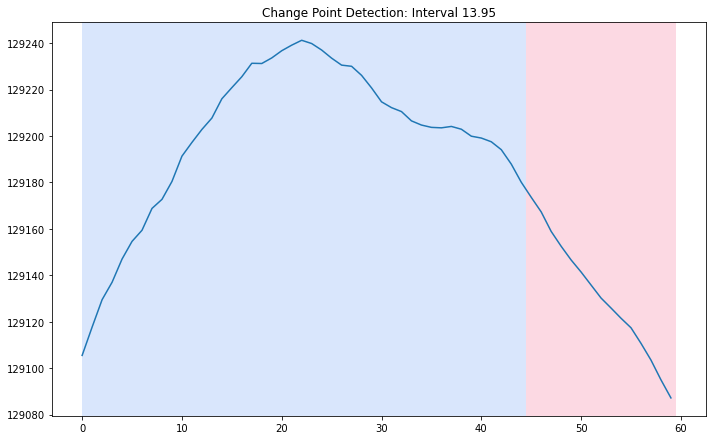

Its detected
4.8406779661020405


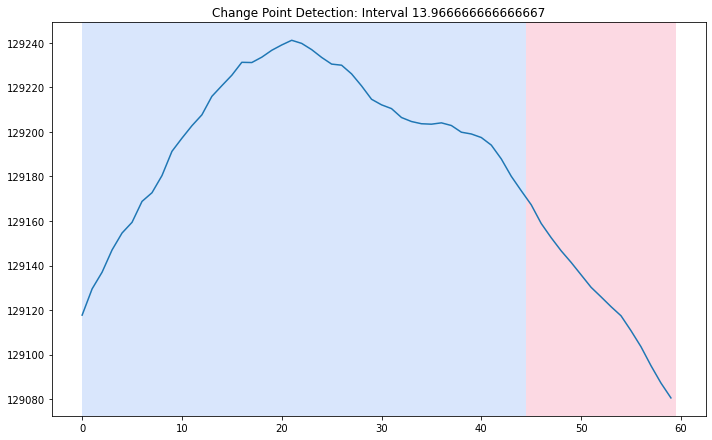

Its detected
4.730508474576617


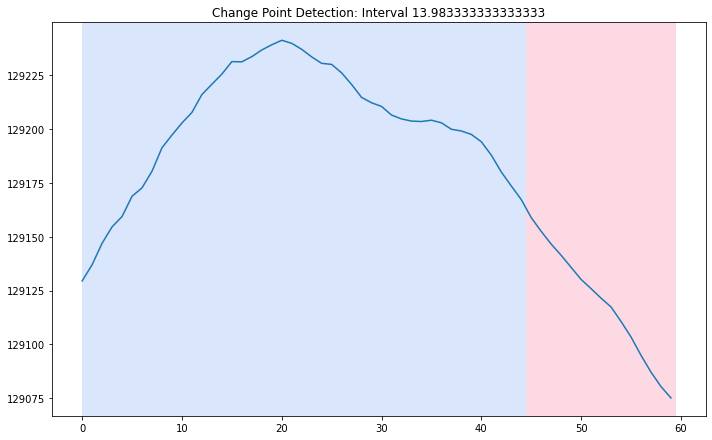

Its detected
4.727118644068192


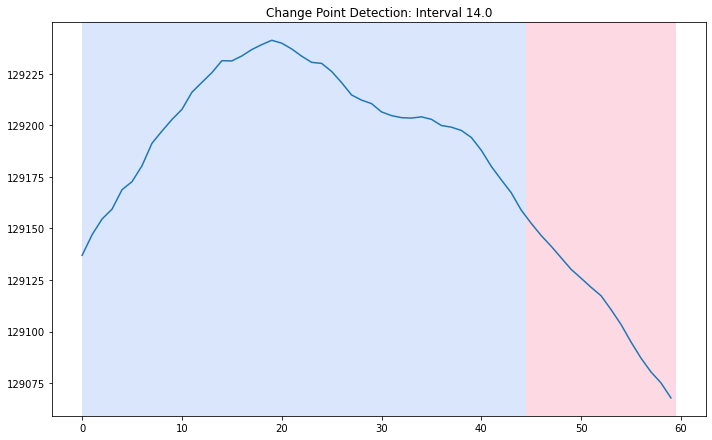

Its detected
4.654237288135938


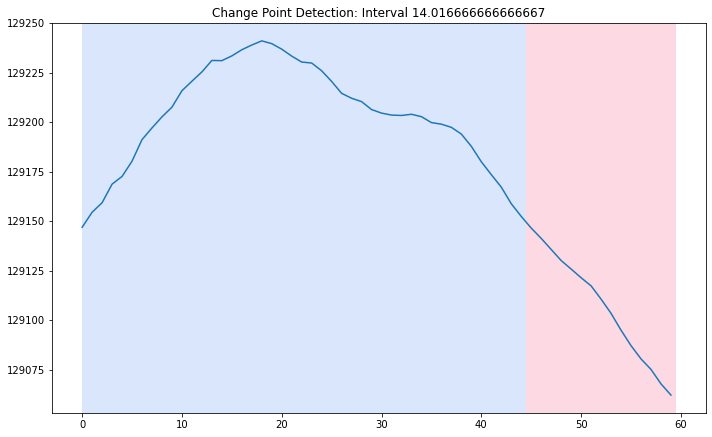

Its detected
4.649152542373177


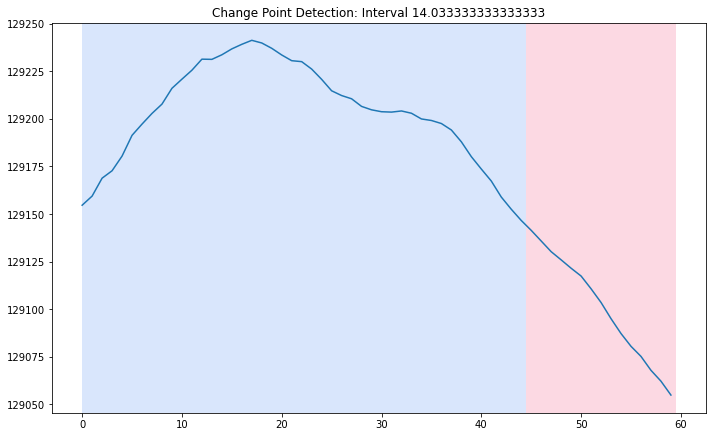

Its detected
4.713559322034244


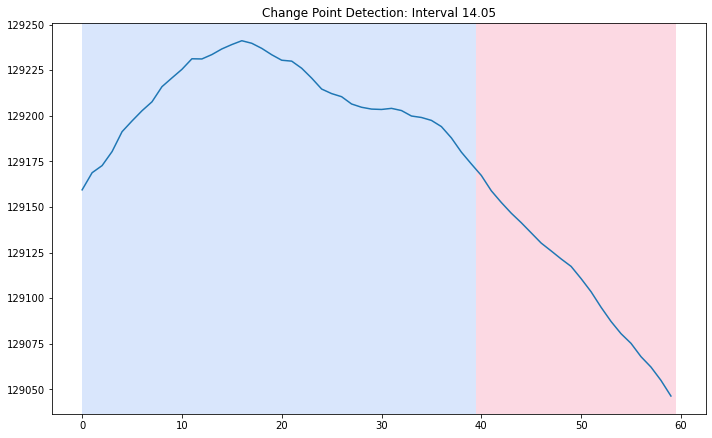

Its detected
4.671186440678311


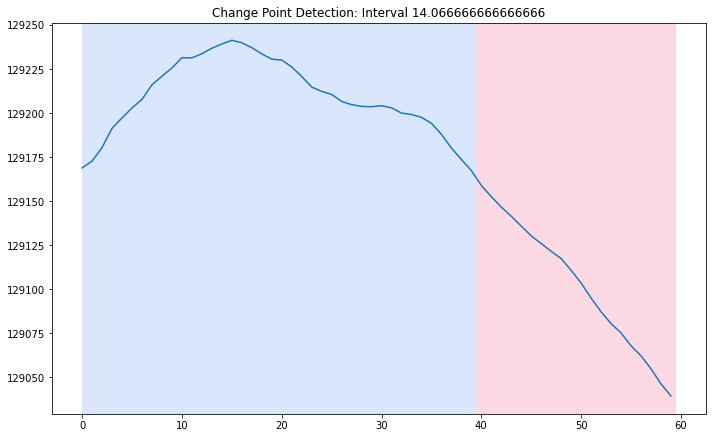

Its detected
4.735593220339378


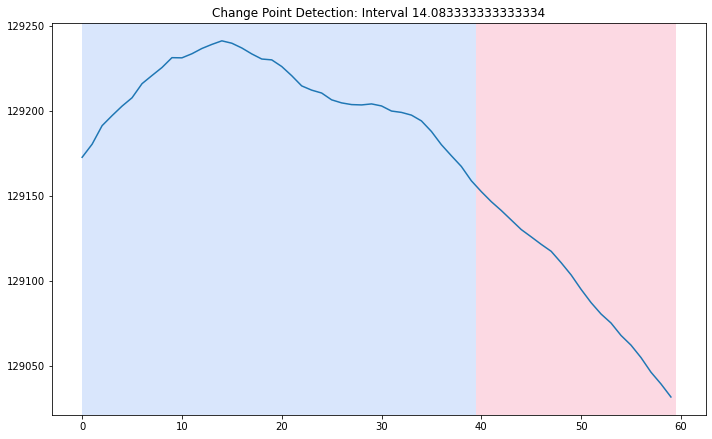

Its detected
4.735593220339378


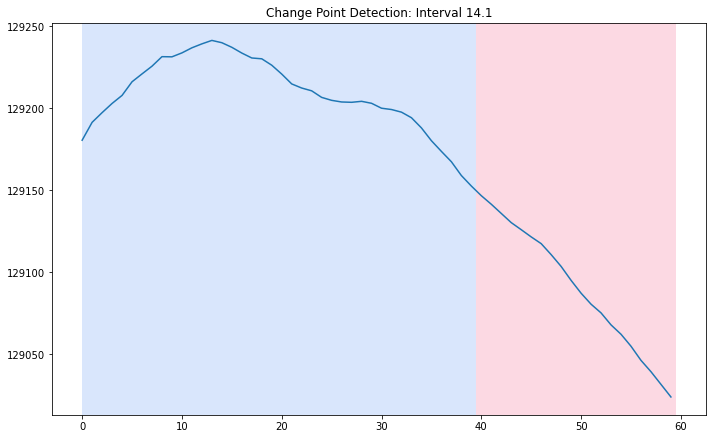

Its detected
4.7525423728815035


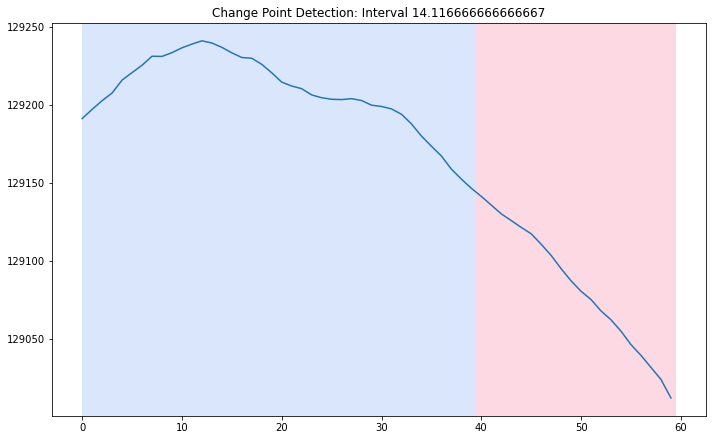

Its detected
4.808474576271631


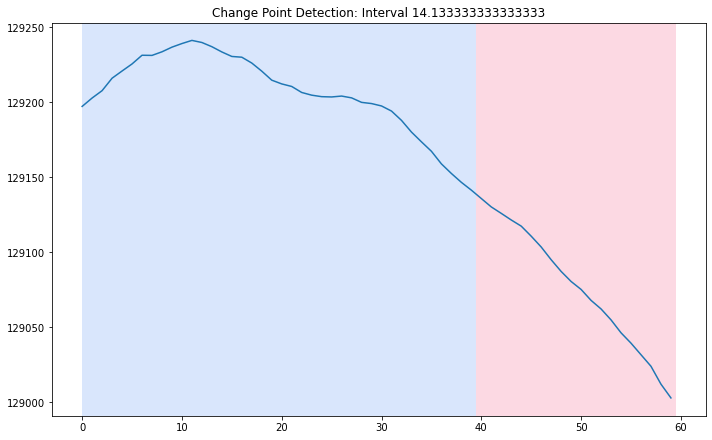

Its detected
4.861016949152838


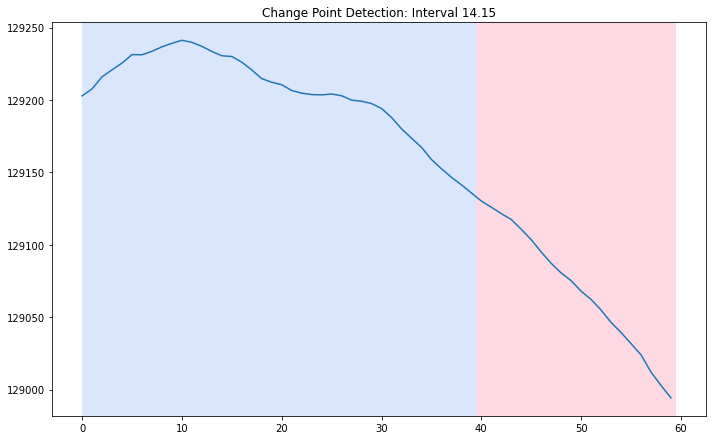

Its detected
4.935593220339427


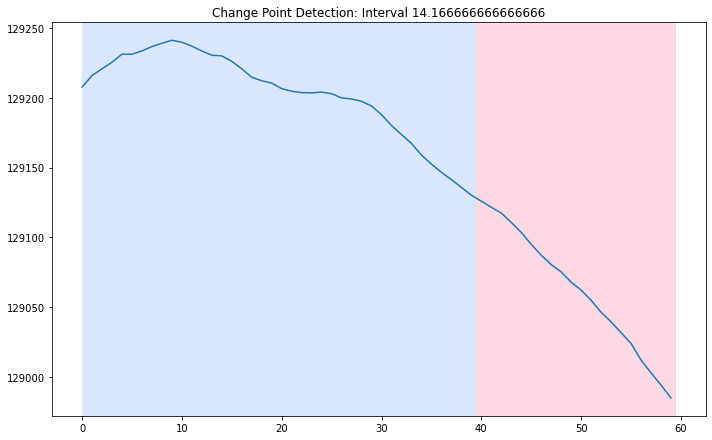

Its detected
4.927118644067994


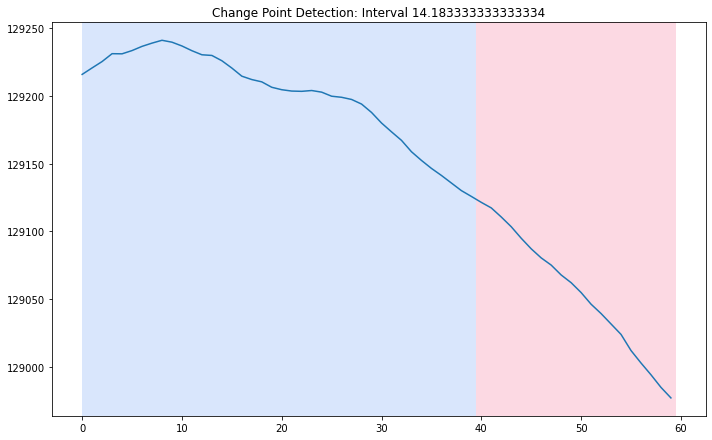

Its detected
4.961016949152739


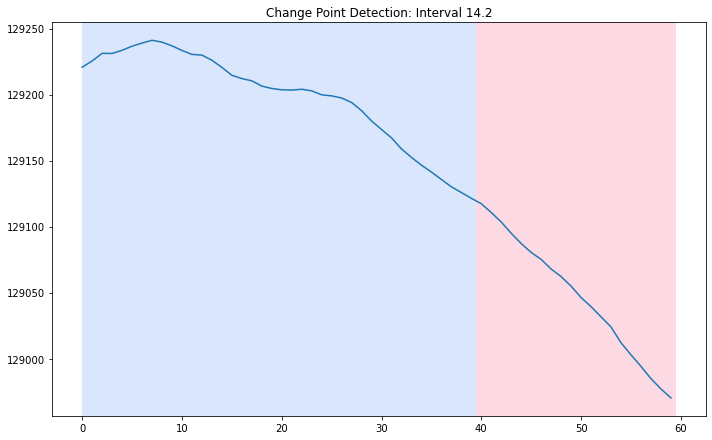

Its detected
5.0322033898309035


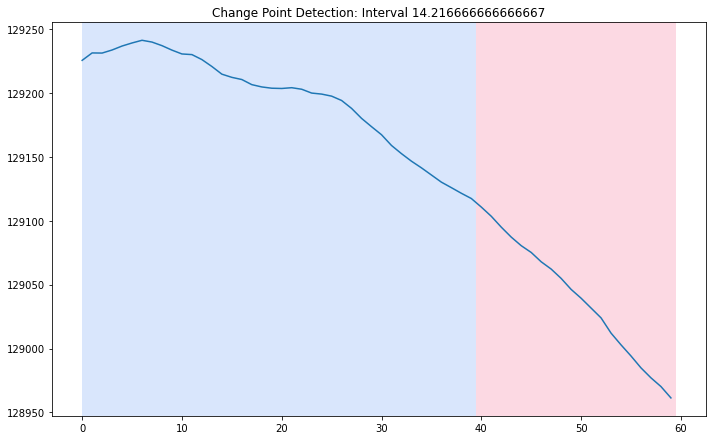

Its detected
5.086440677966447


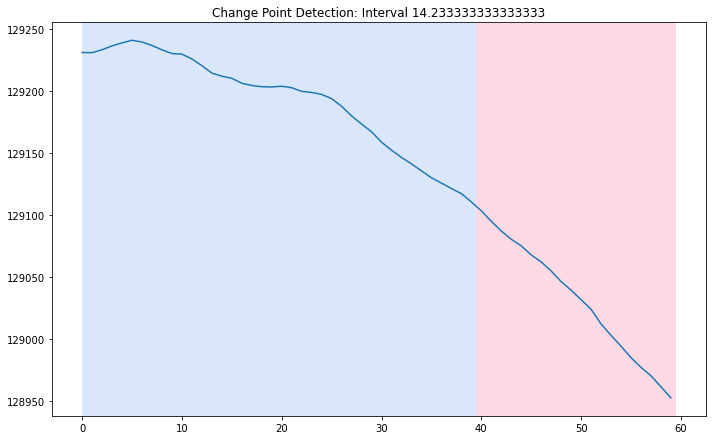

Its detected
5.232203389830706


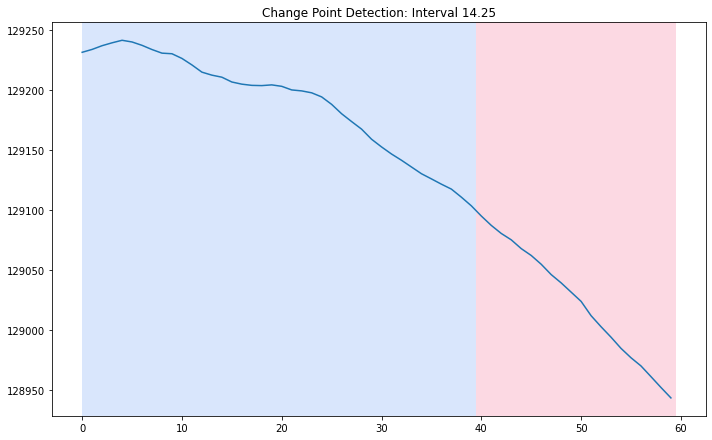

Its detected
5.366101694915353


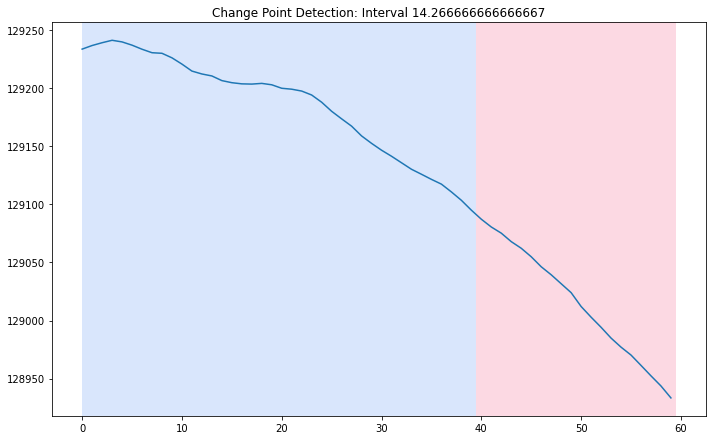

Its detected
5.494915254237485


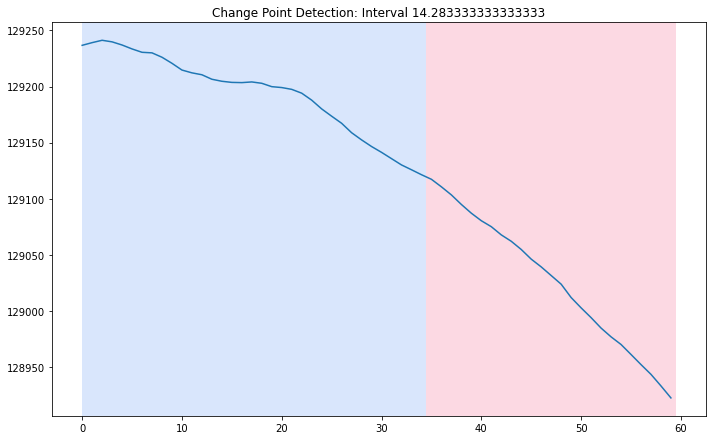

Its detected
5.627118644067797


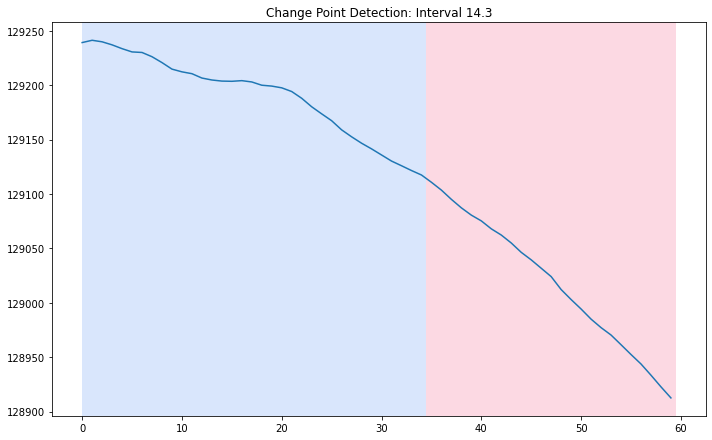

Its detected
5.772881355932302


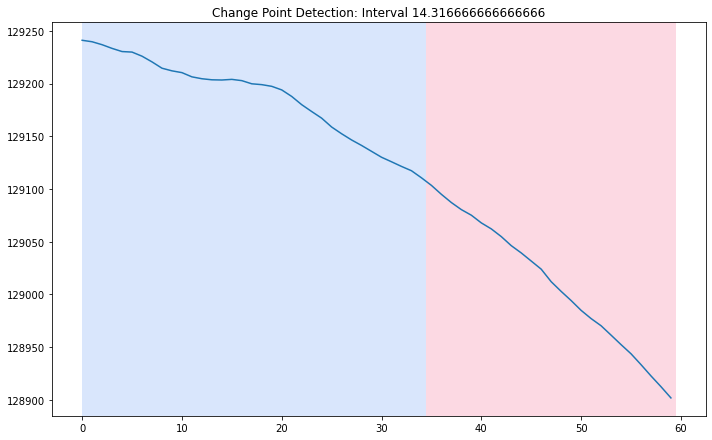

Its detected
5.949152542373128


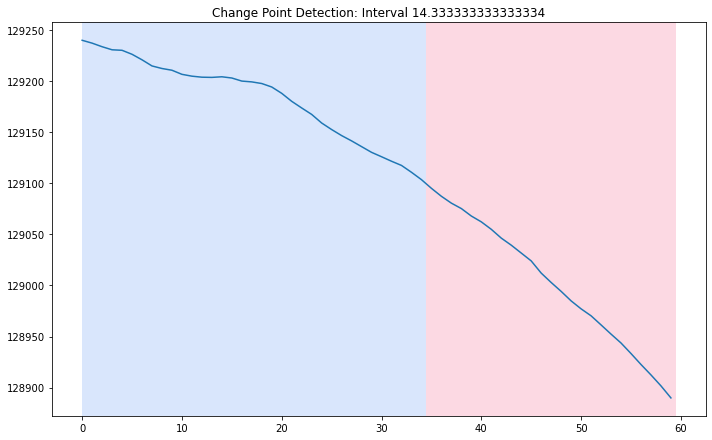

Its detected
6.055932203390126


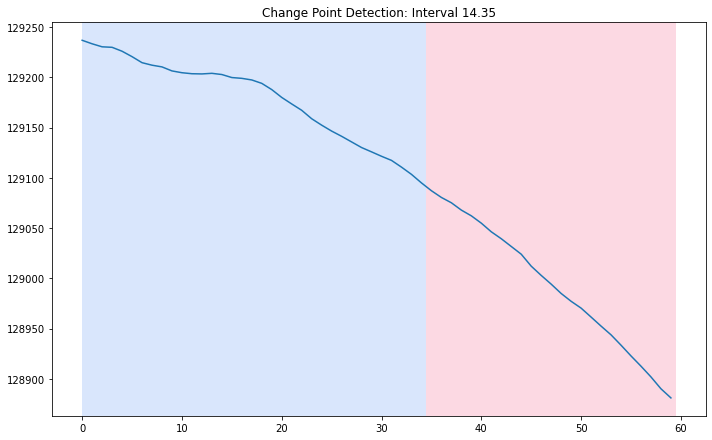

Its detected
6.196610169491624


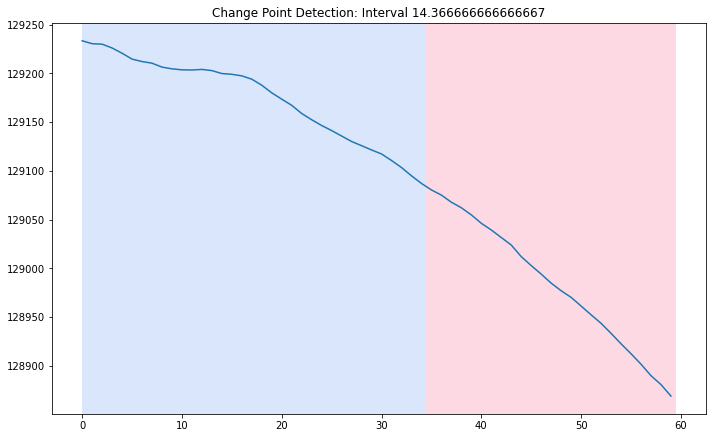

Its detected
6.361016949152838


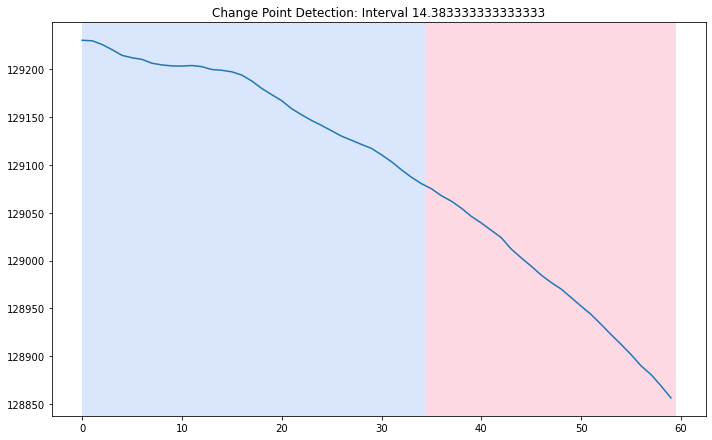

Its detected
6.51694915254262


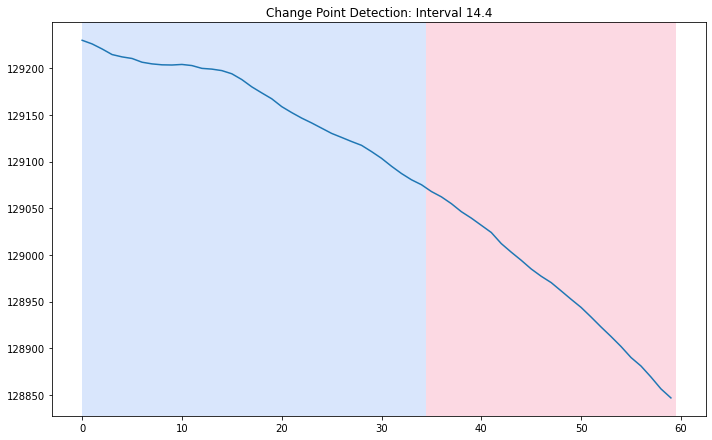

Its detected
6.693220338983445


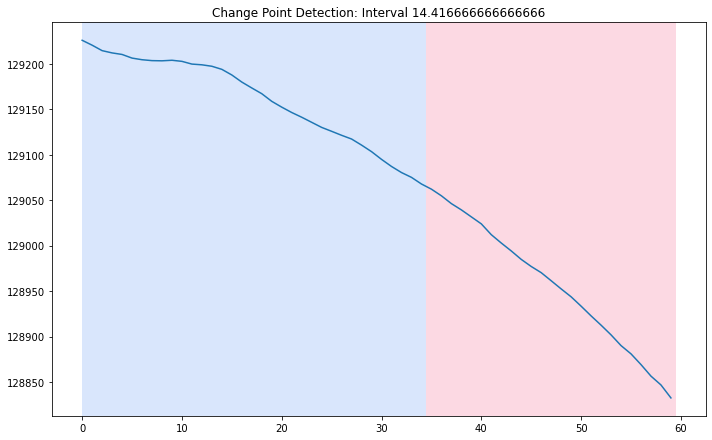

Its detected
6.798305084745861


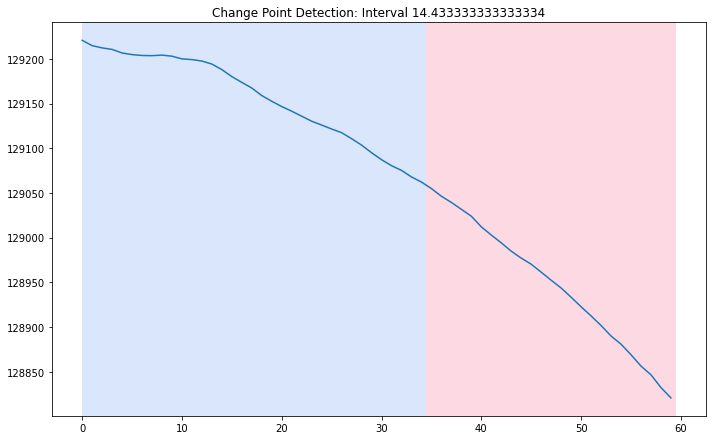

Its detected
6.918644067796808


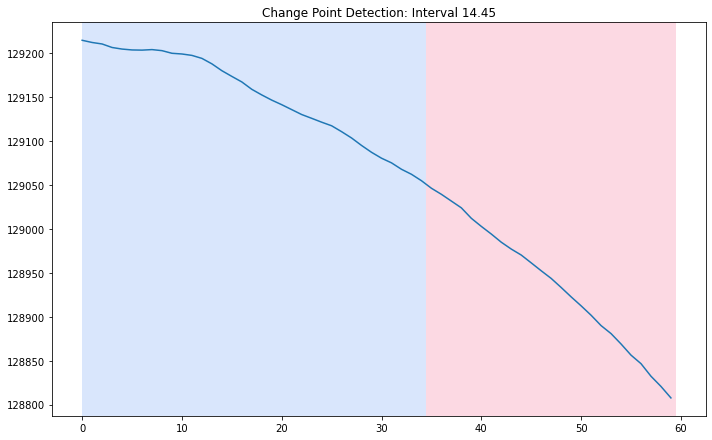

Its detected
7.093220338983297


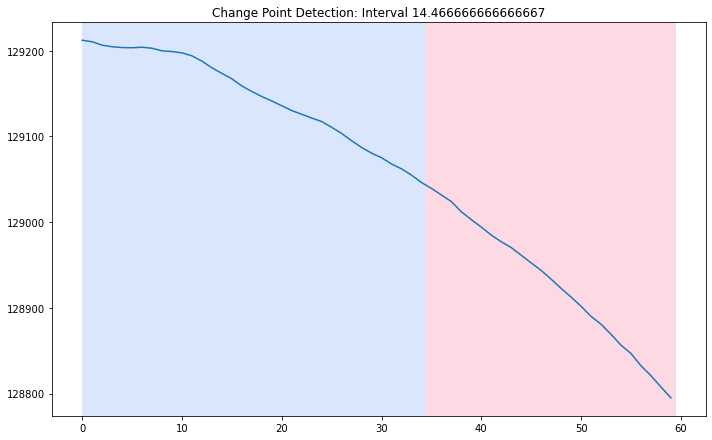

Its detected
7.264406779661115


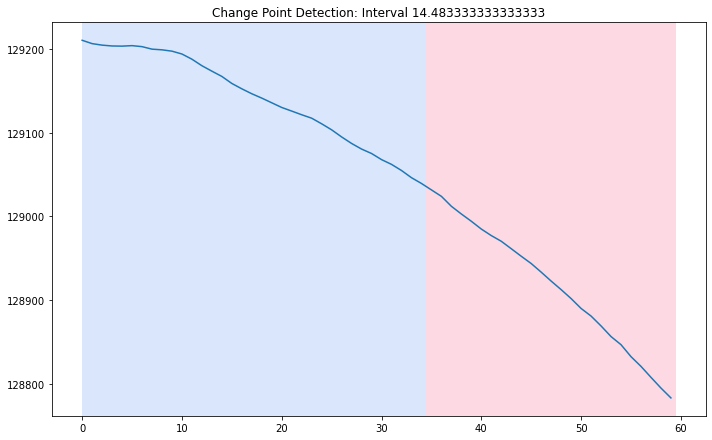

Its detected
7.34915254237298


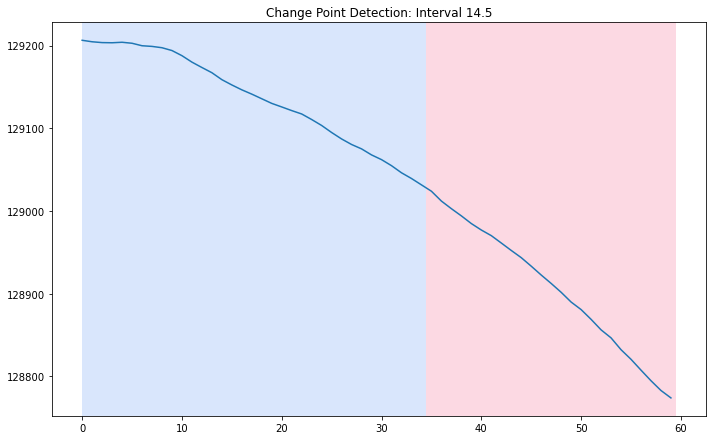

Its detected
7.515254237288284


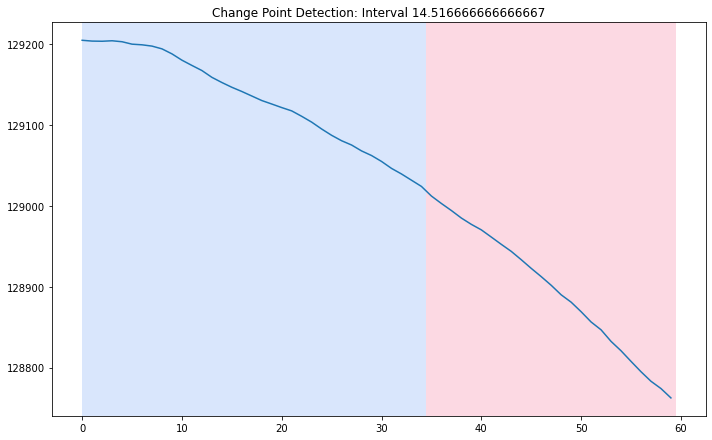

Its detected
7.728813559322281


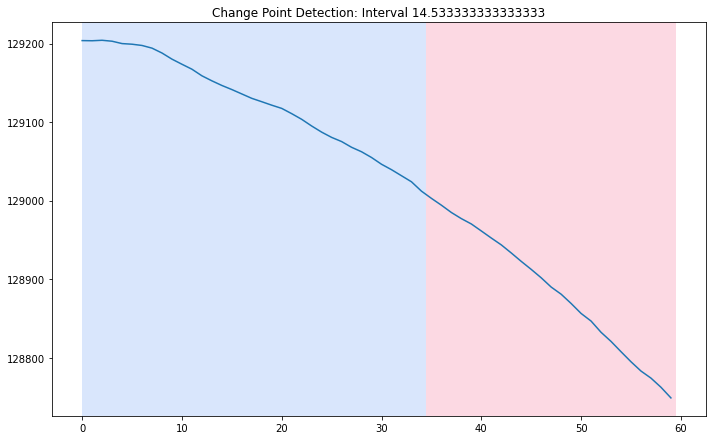

Its detected
7.869491525424025


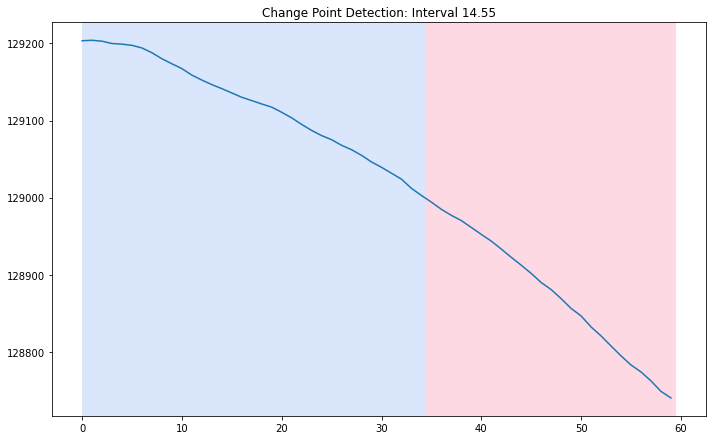

Its detected
8.094915254237387


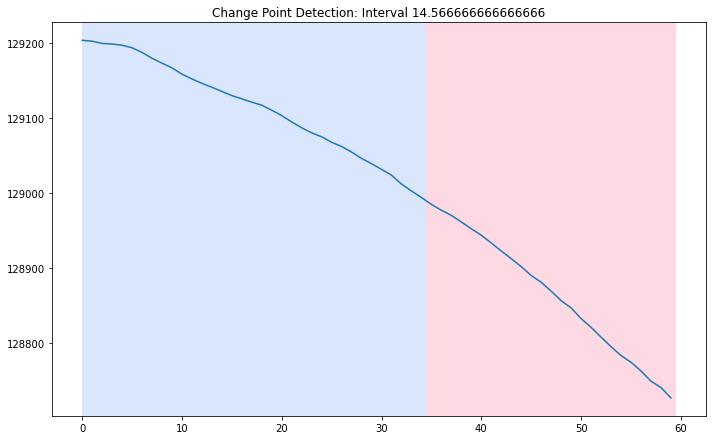

Its detected
8.271186440677965


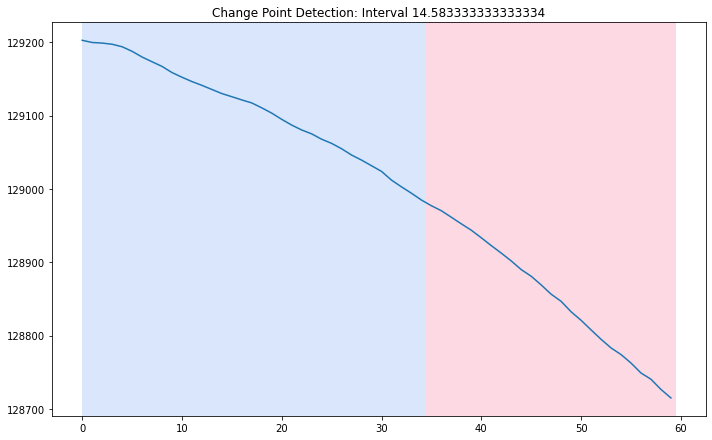

Its detected
8.408474576271038


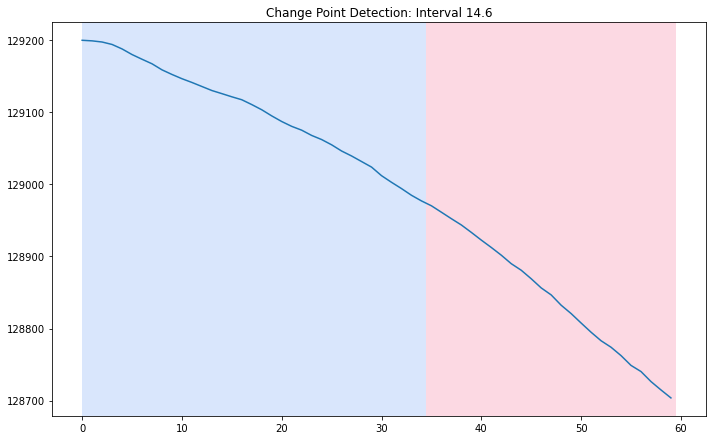

Its detected
8.603389830508574


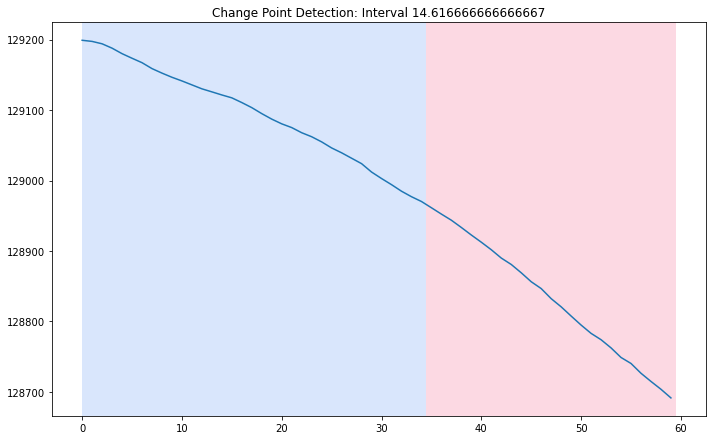

Its detected
8.783050847457577


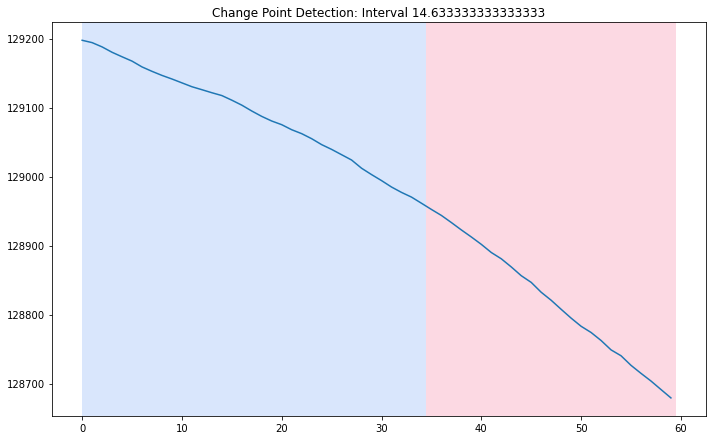

Its detected
8.884745762712061


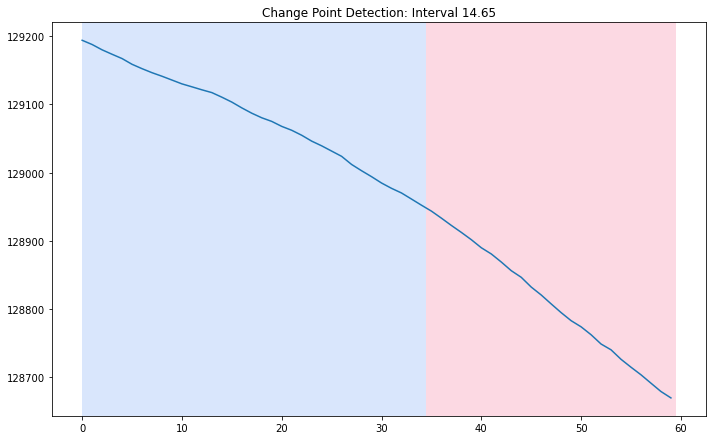

Its detected
8.927118644067747


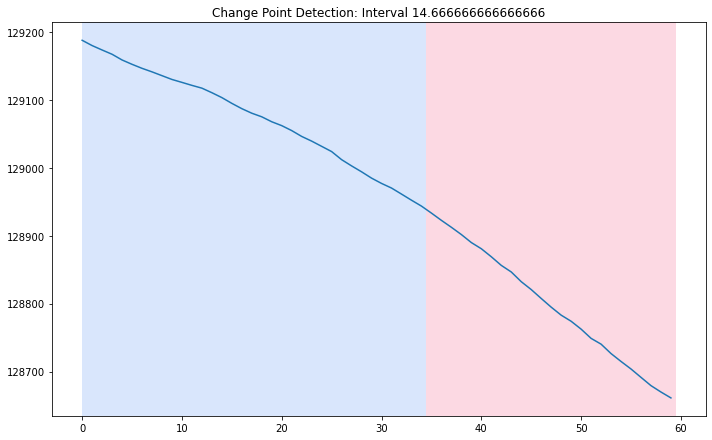

Its detected
8.981355932203538


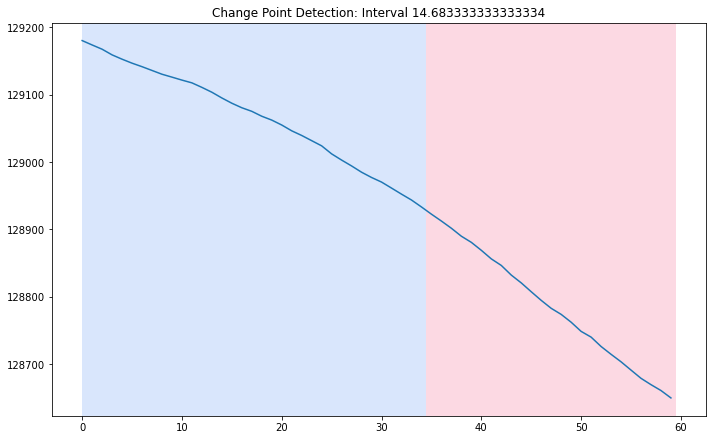

Its detected
8.947457627118792


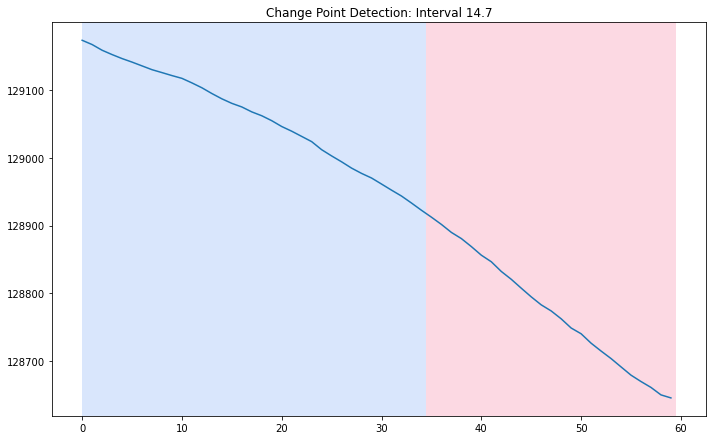

Its detected
8.935593220338934


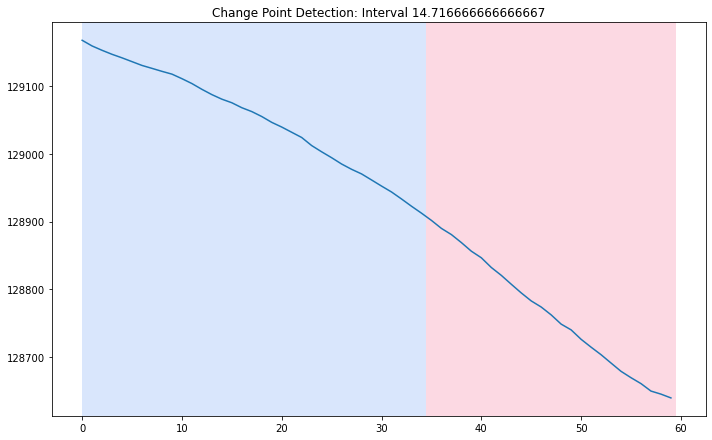

Its detected
8.85593220338983


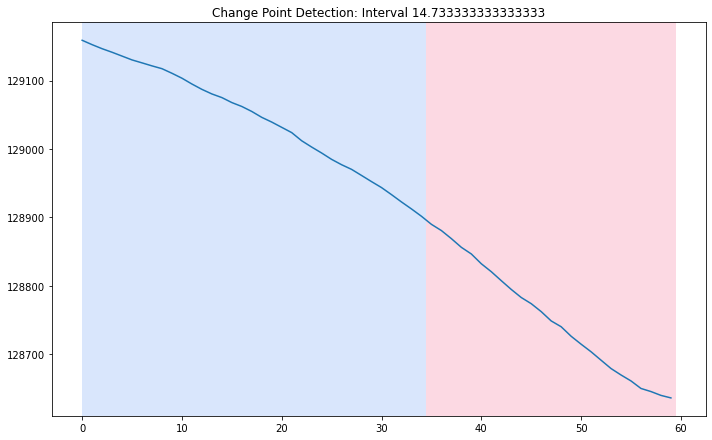

Its detected
8.840677966101794


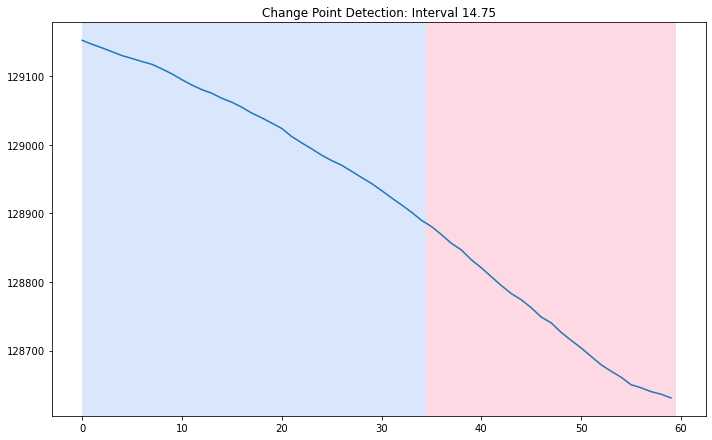

Its detected
8.788135593220339


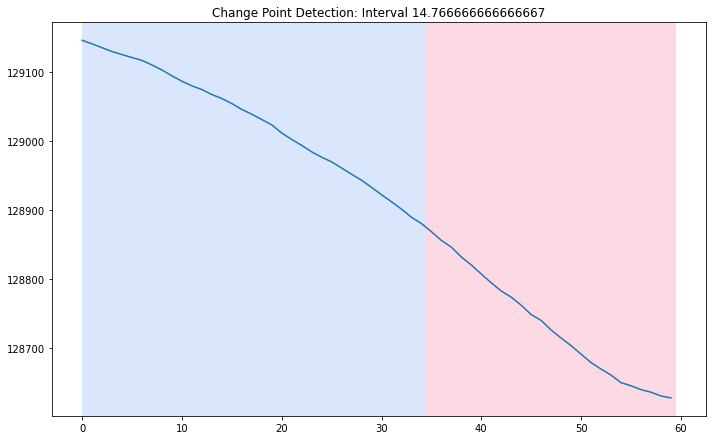

Its detected
8.754237288135593


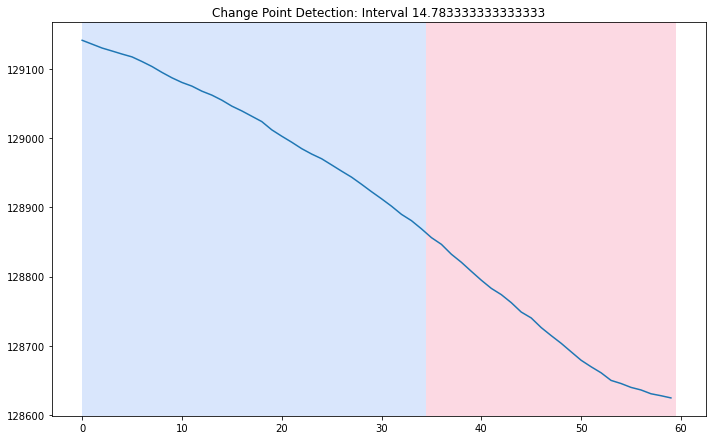

Its detected
8.747457627118743


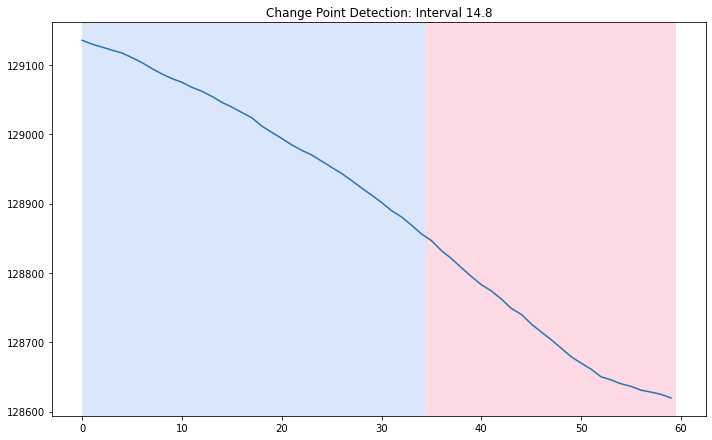

Its detected
8.666101694915303


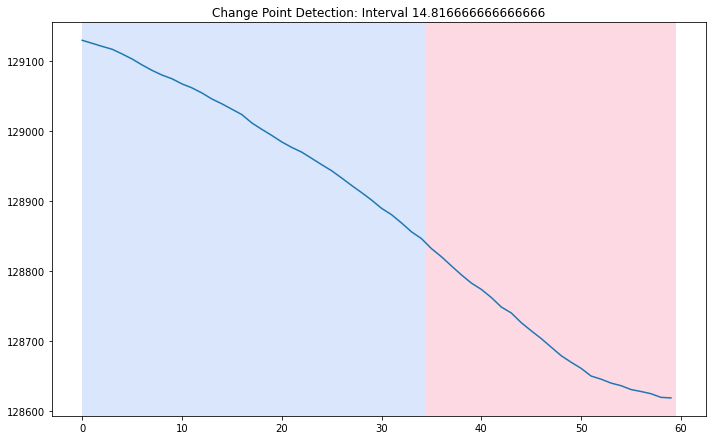

Its detected
8.606779661016752


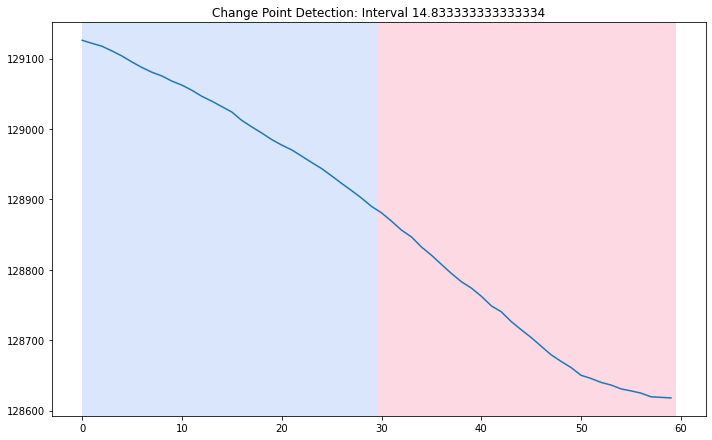

Its detected
8.55762711864397


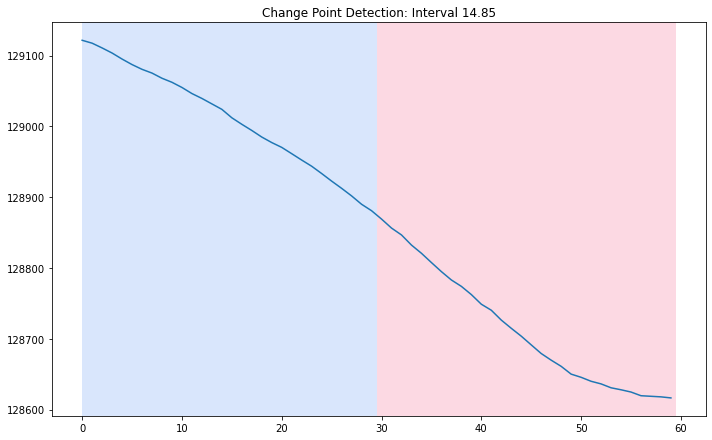

Its detected
8.5


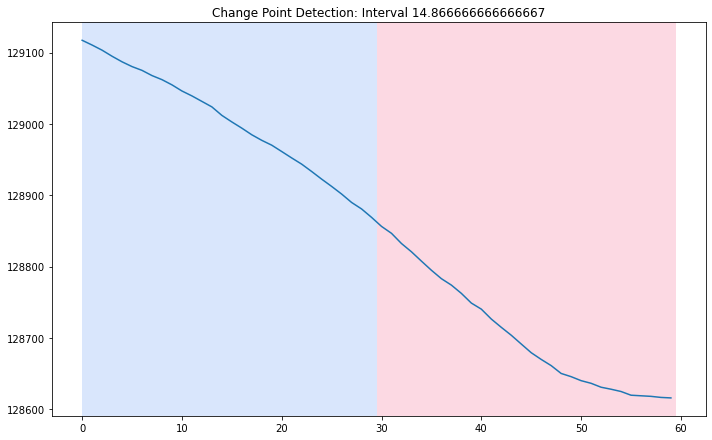

Its detected
8.420338983050897


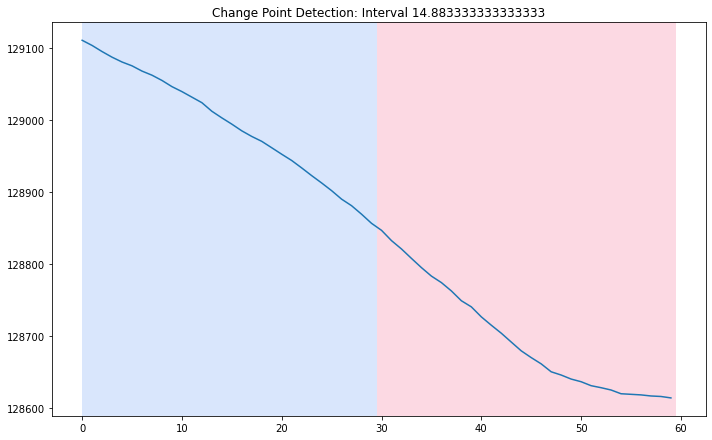

Its detected
8.320338983050748


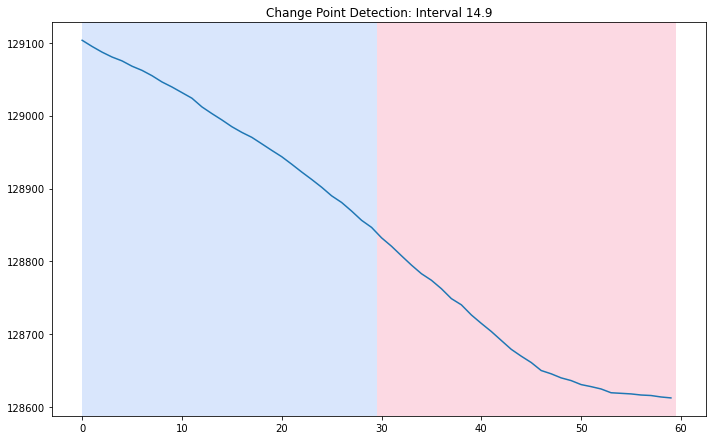

Its detected
8.227118644067698


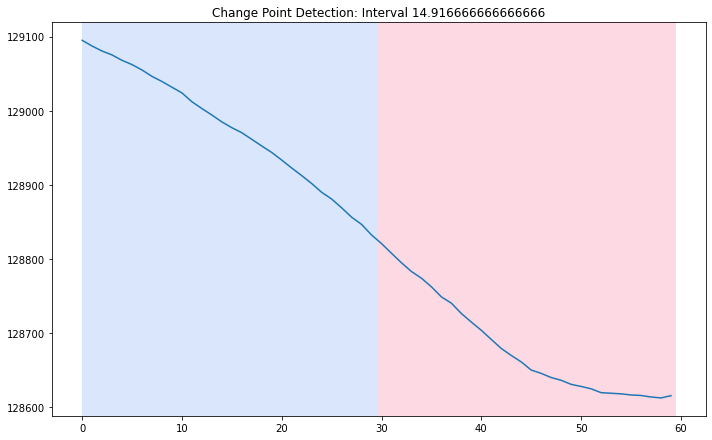

Its detected
8.162711864406631


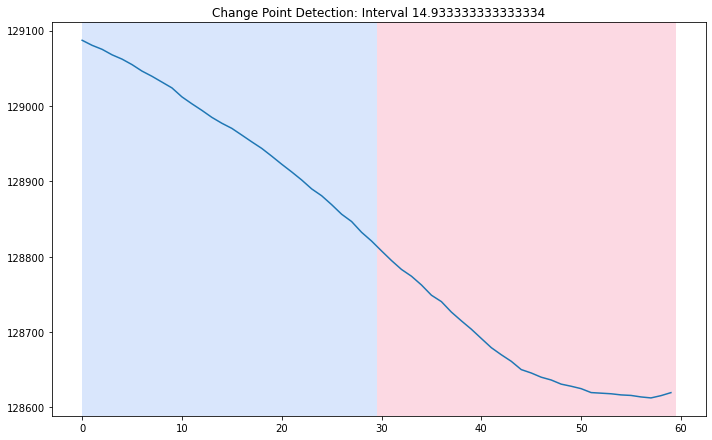

Its detected
8.072881355932006


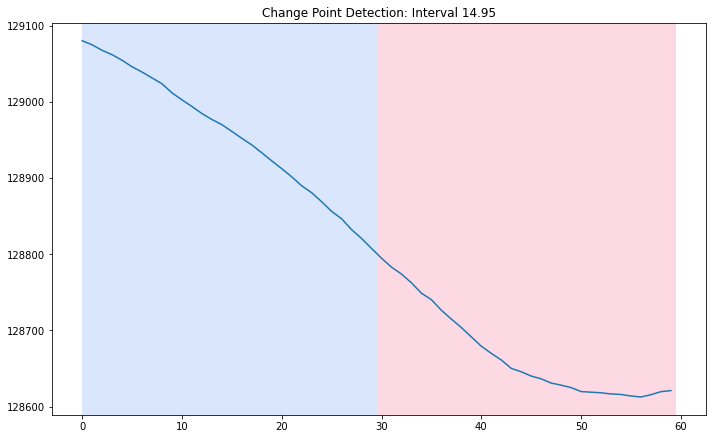

Its detected
8.003389830508178


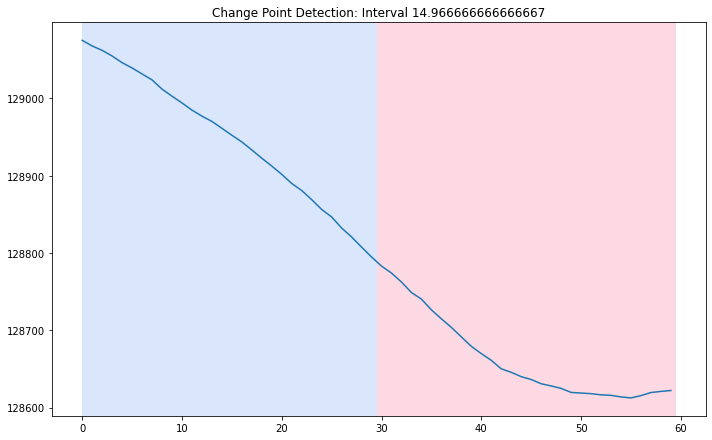

Its detected
7.886440677965904


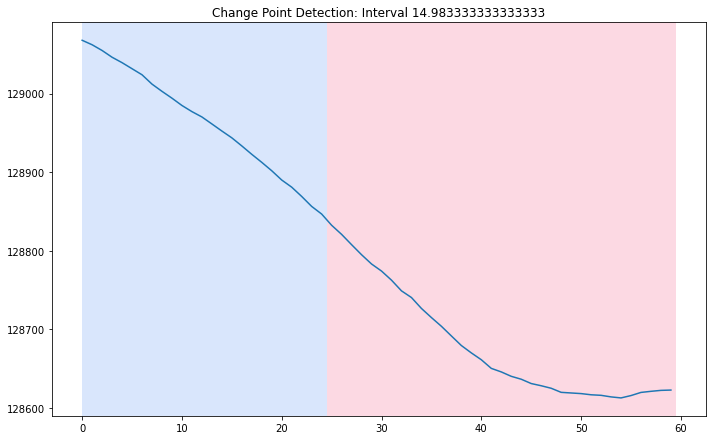

Its detected
7.801694915254287


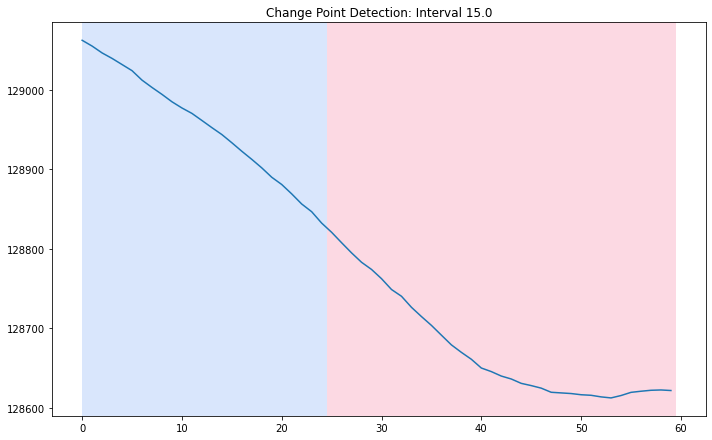

Its detected
7.727118644067945


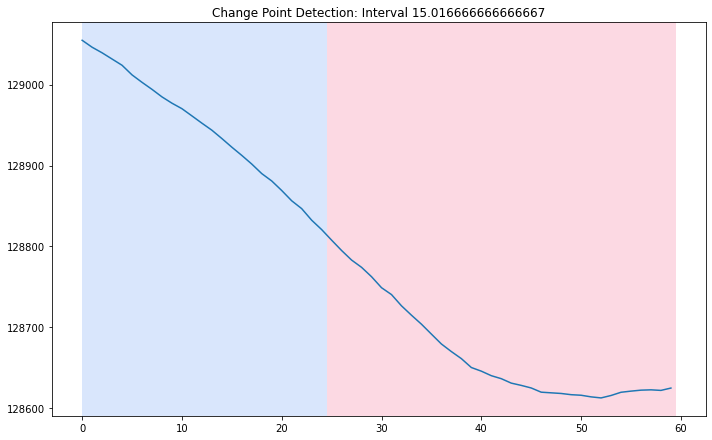

Its detected
7.615254237288432


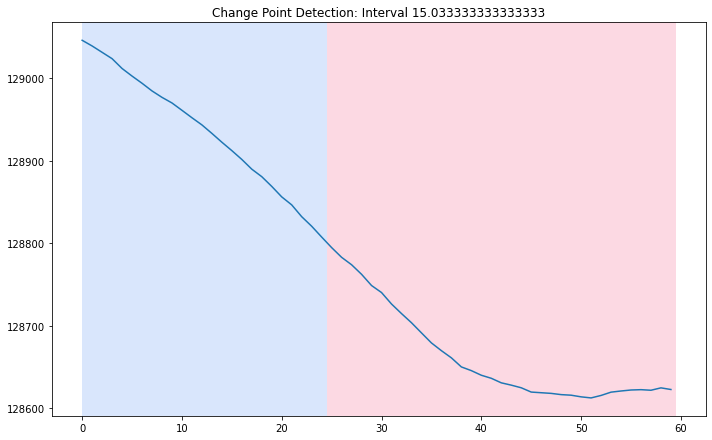

Its detected
7.508474576271433


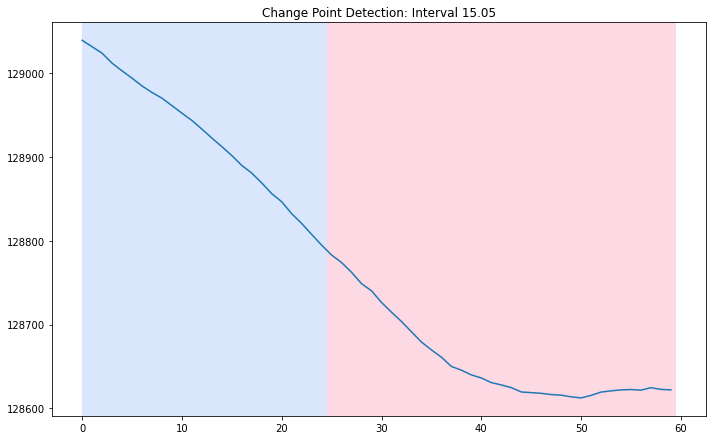

Its detected
7.381355932203636


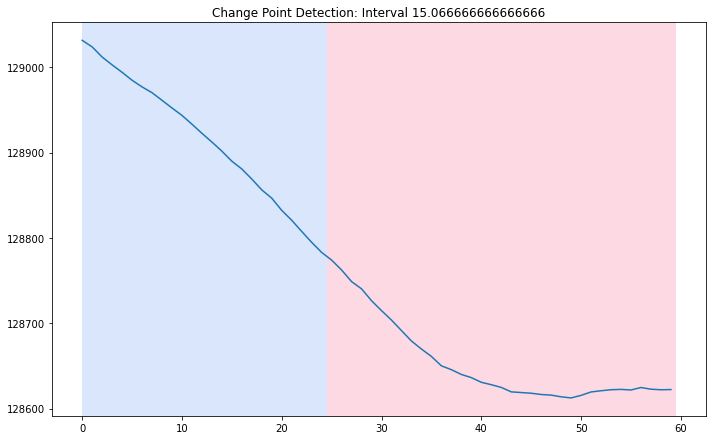

Its detected
7.3423728813563764


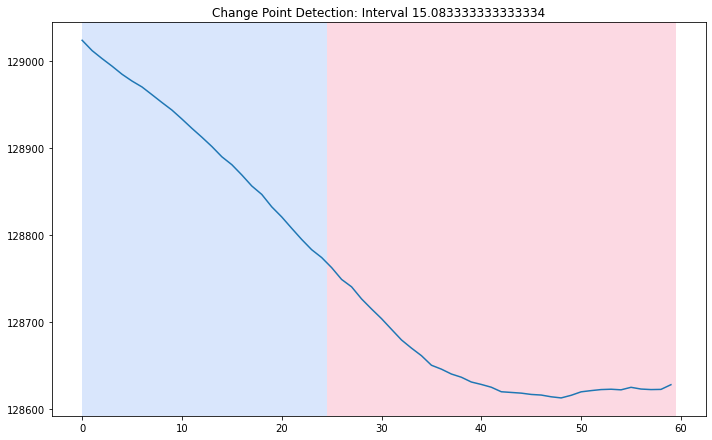

Its detected
7.2389830508480495


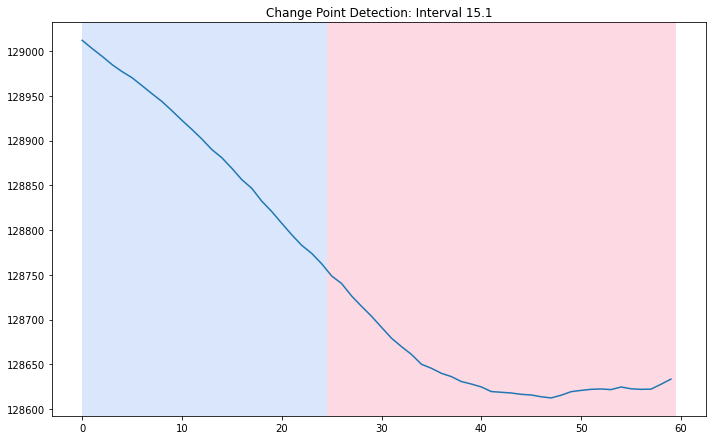

Its detected
7.206779661017147


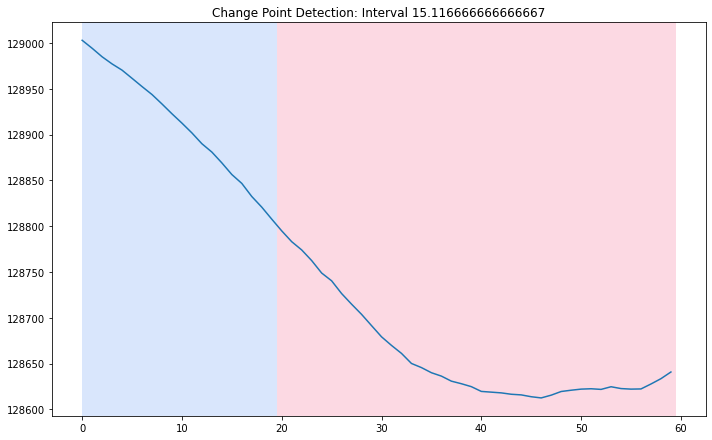

Its detected
7.218644067797005


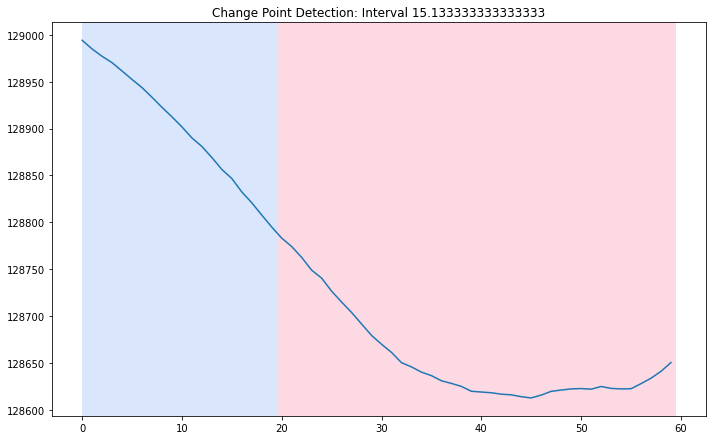

Its detected
7.308474576271384


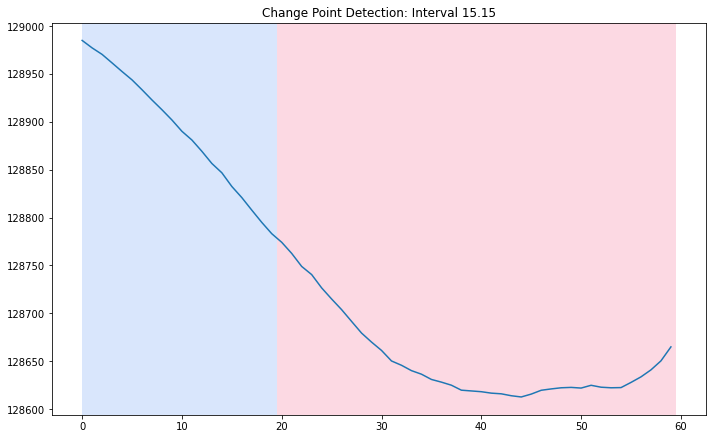

Its detected
7.496610169492068


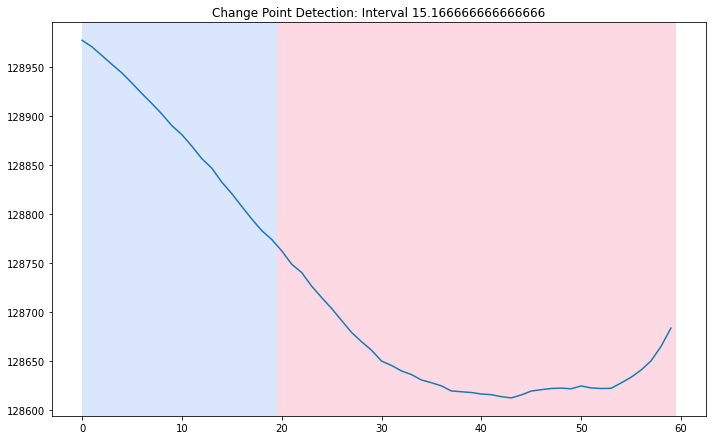

Its detected
7.625423728813954


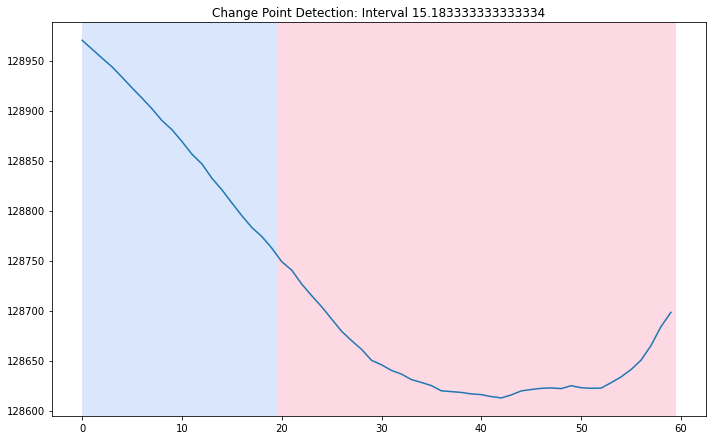

Its detected
7.744067796610564


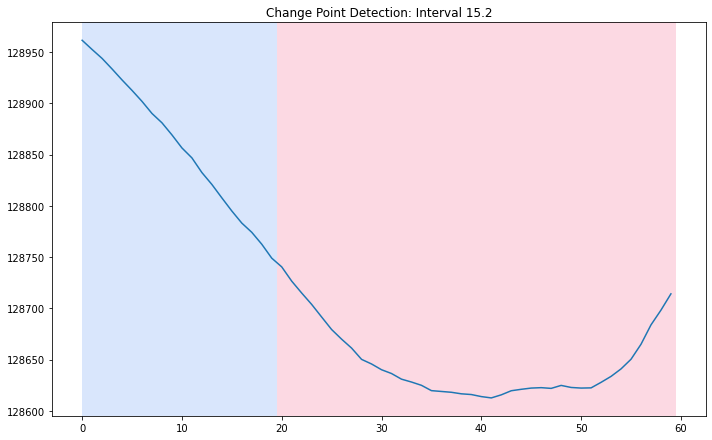

Its detected
7.811864406780056


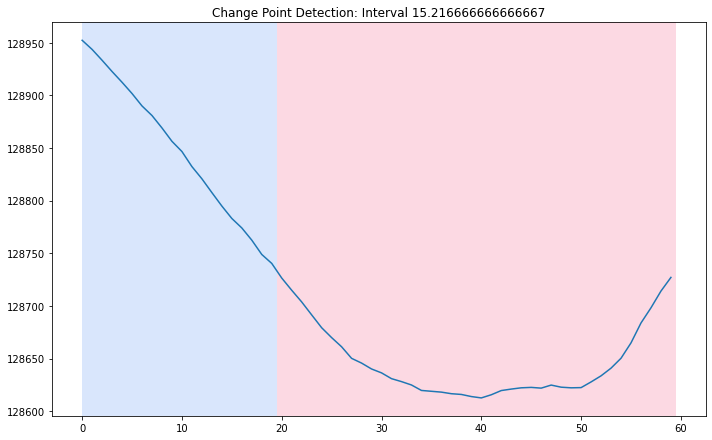

Its detected
7.816949152542817


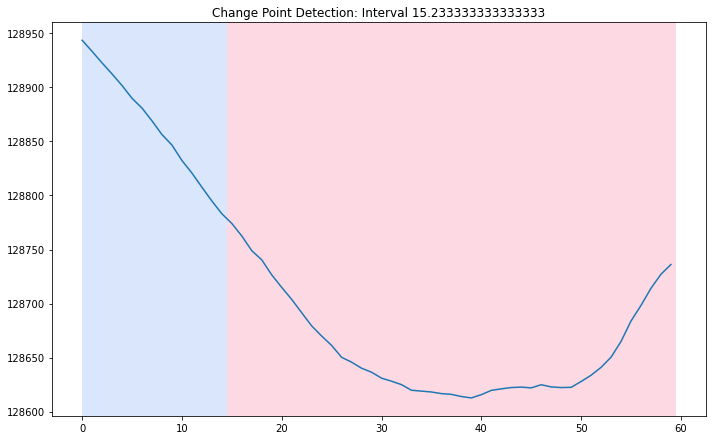

Its detected
7.861016949152838


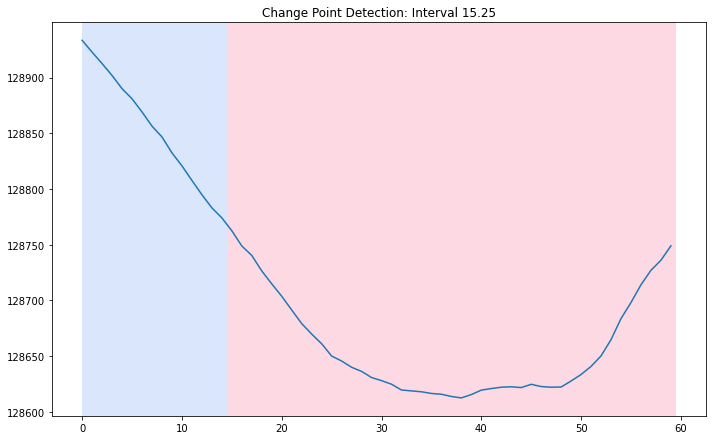

Its detected
7.827118644068093


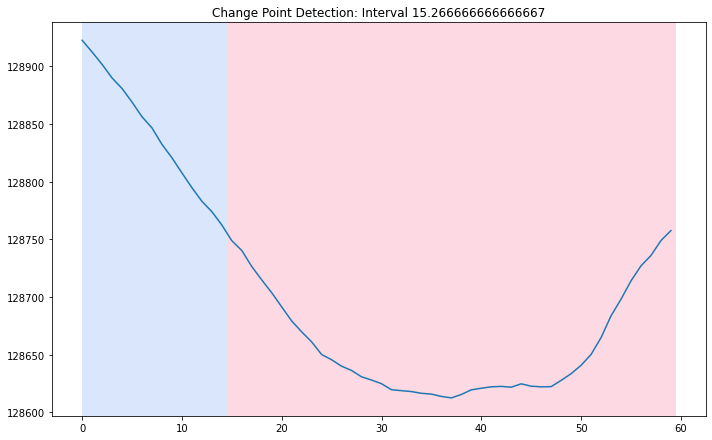

Its detected
7.716949152542669


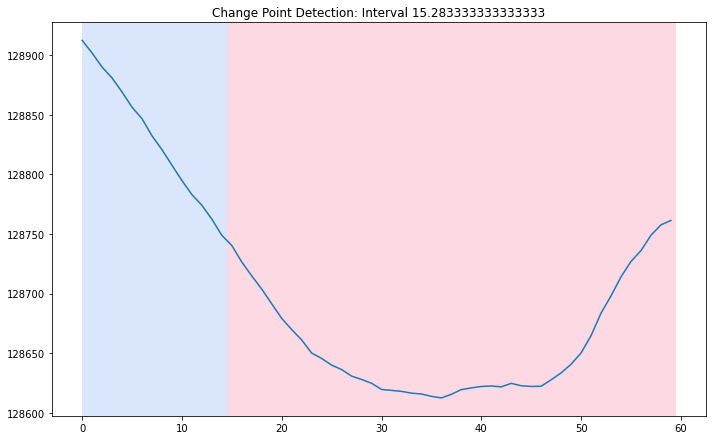

Its detected
7.606779661017492


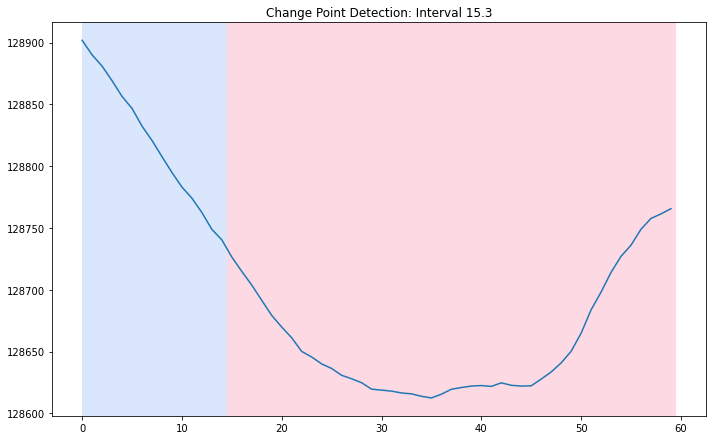

Its detected
7.530508474576568


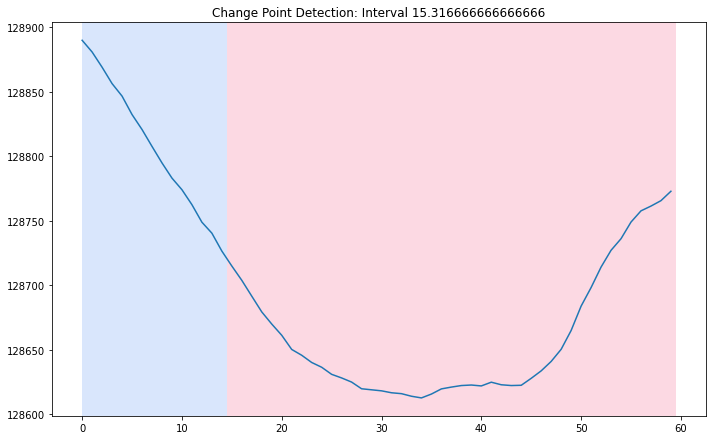

Its detected
7.4457627118647025


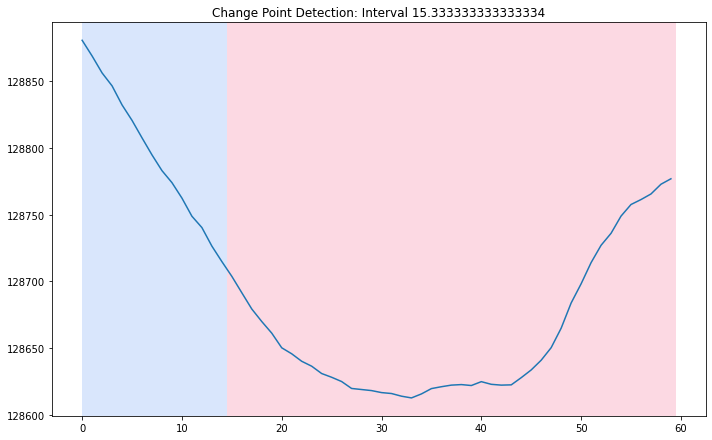

Its detected
7.296610169492019


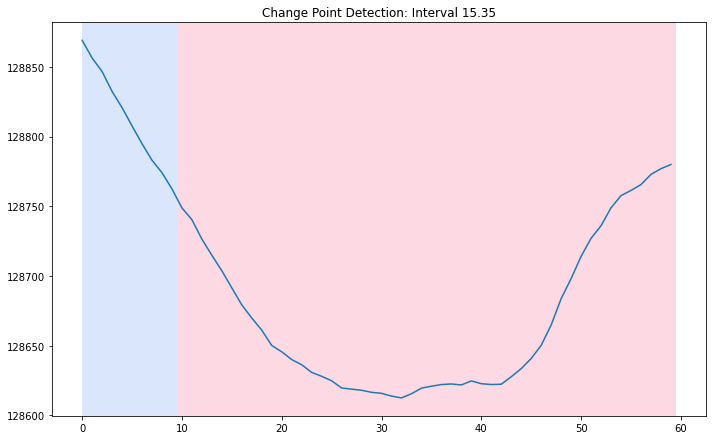

Its detected
7.1423728813563265


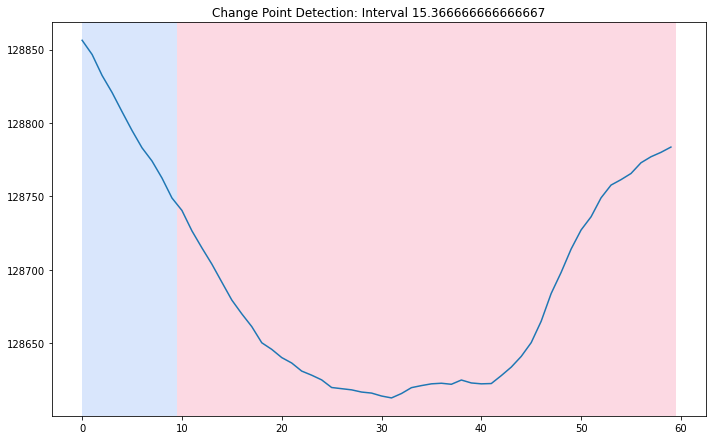

Its detected
7.005084745763255


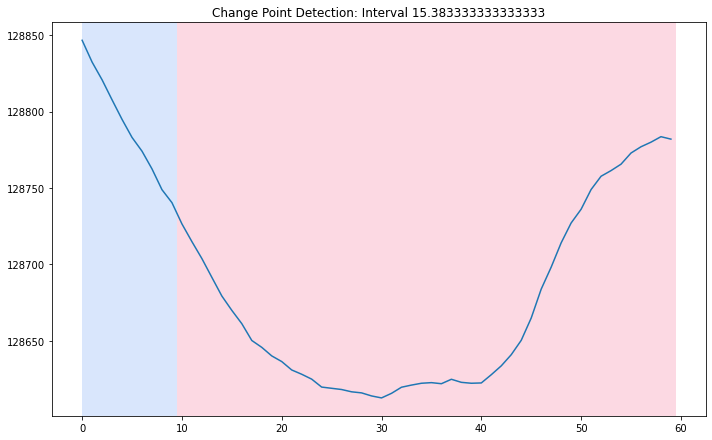

Its detected
6.77796610169531


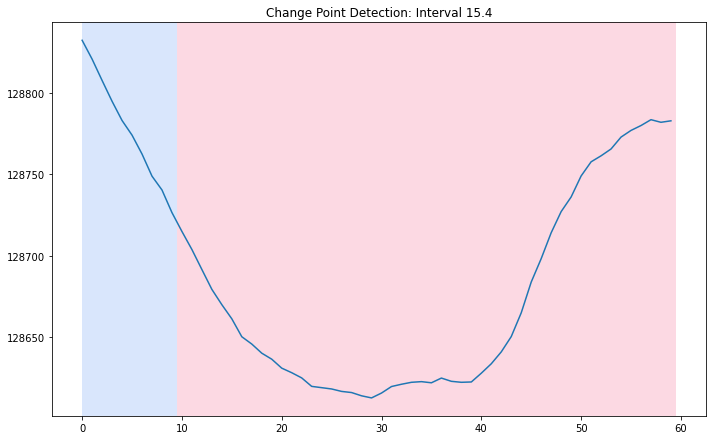

Its detected
6.605084745763156


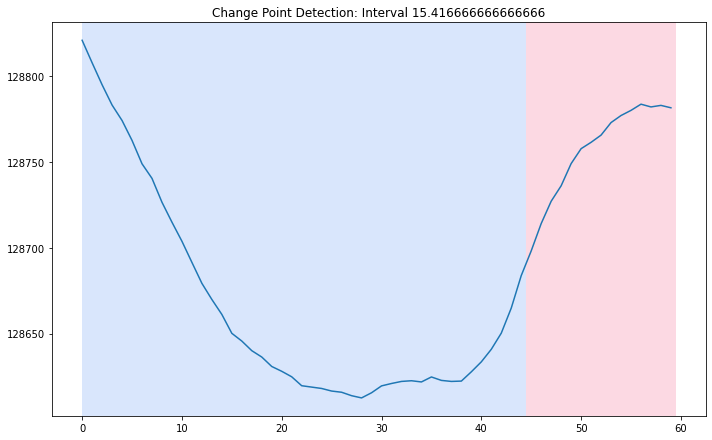

Its detected
6.4389830508478525


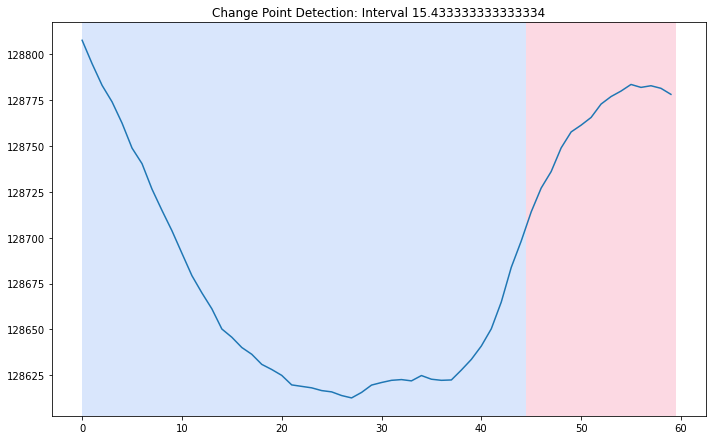

Its detected
6.313559322034145


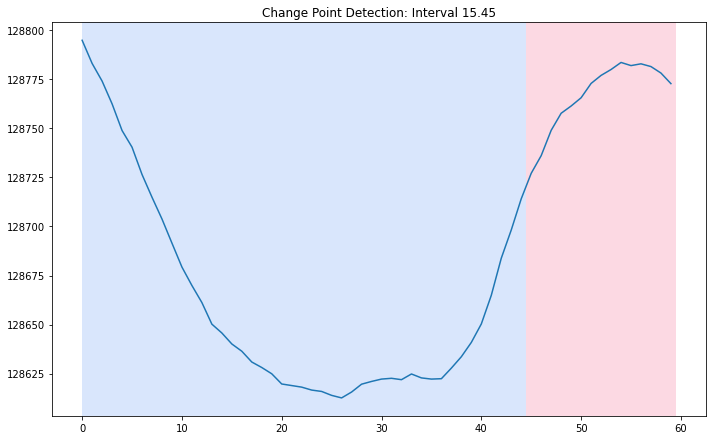

Its detected
6.181355932203834


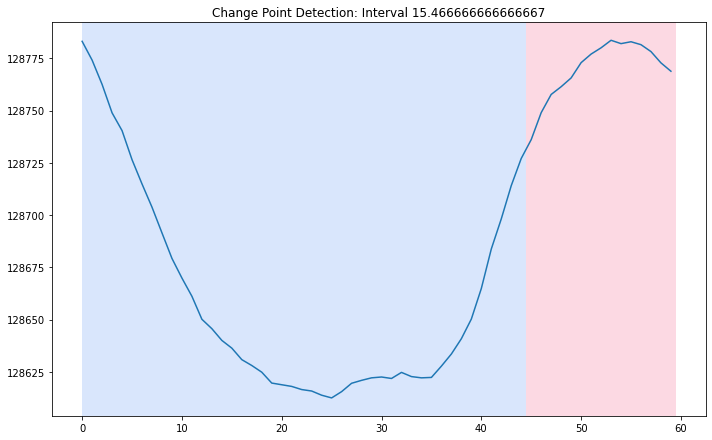

Its detected
6.1423728813563265


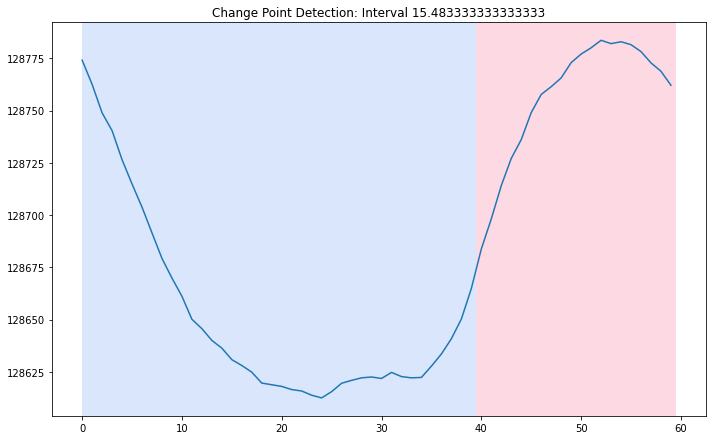

Its detected
6.0389830508477536


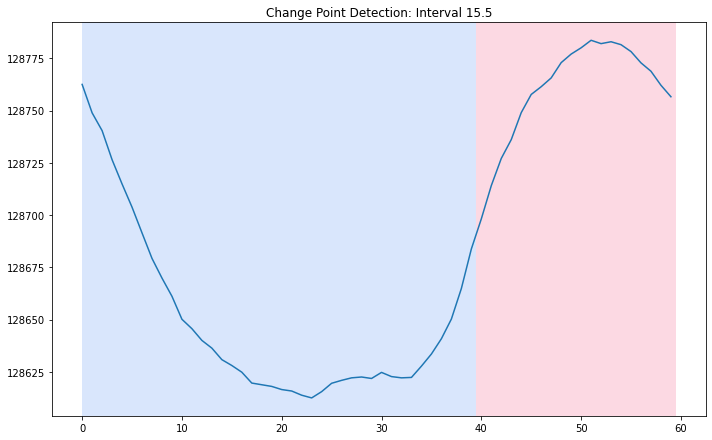

Its detected
5.881355932203636


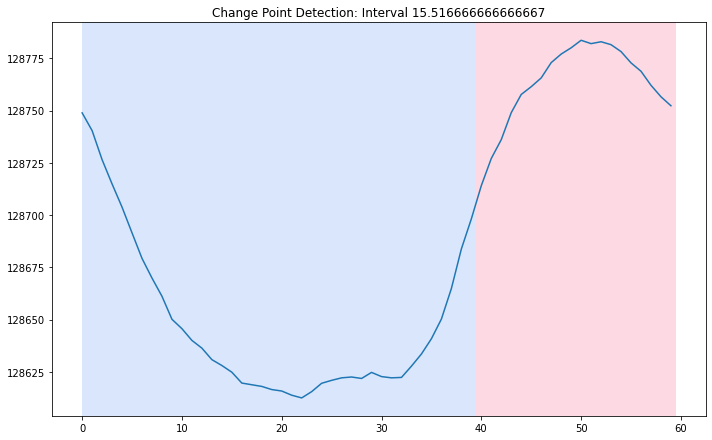

Its detected
5.8474576271188905


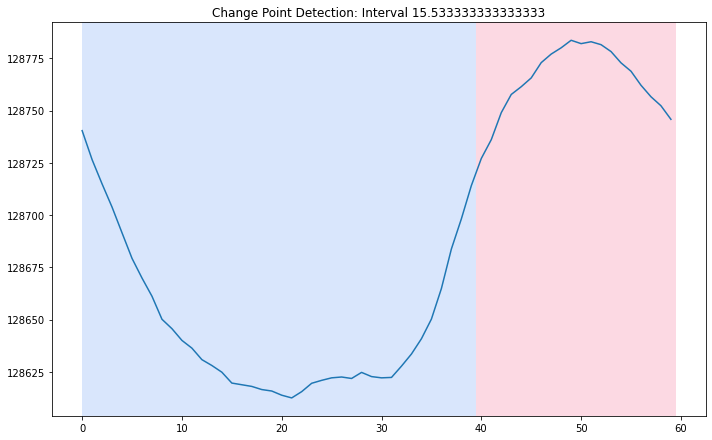

Its detected
5.66610169491555


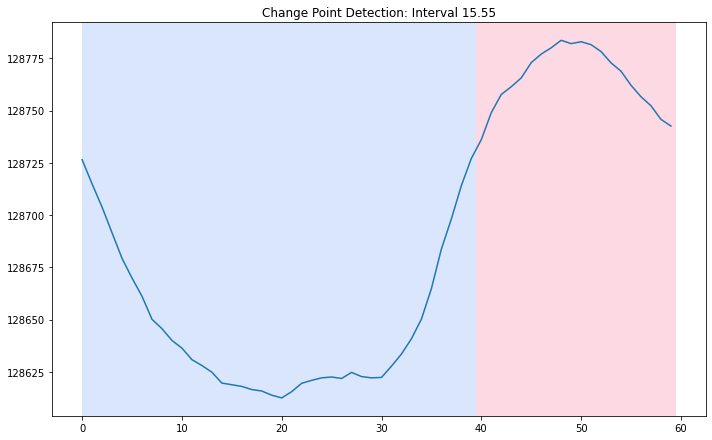

Its detected
5.527118644068142


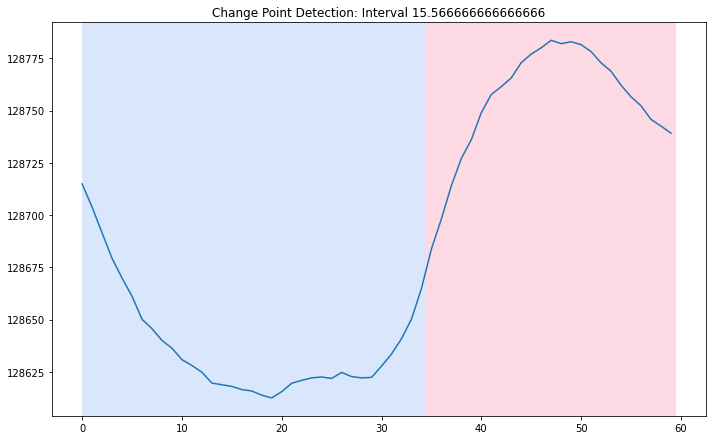

Its detected
5.359322033898749


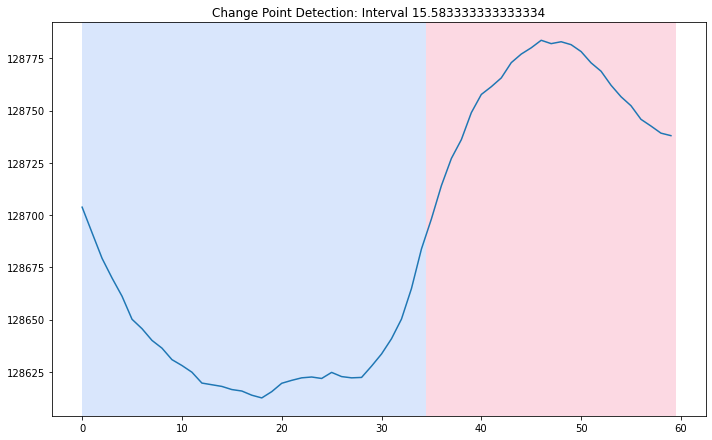

Its detected
5.208474576271483


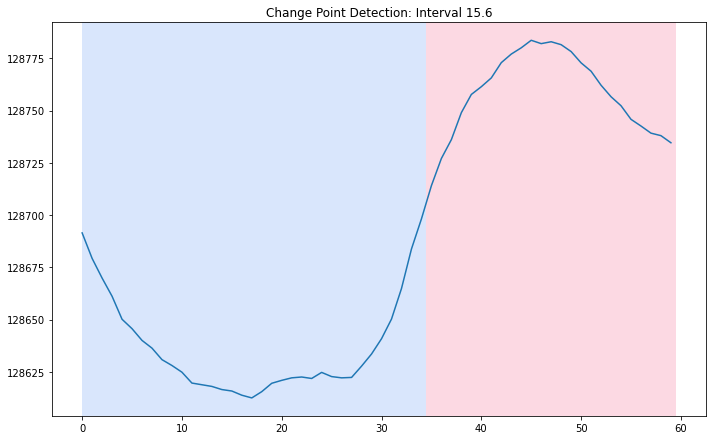

Its detected
5.0457627118646045


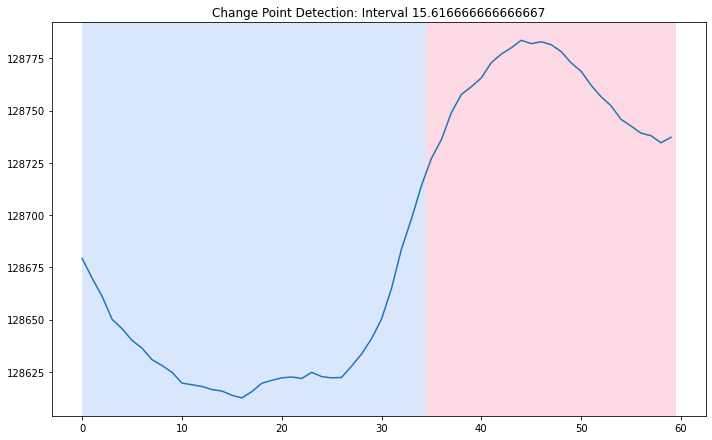

Its detected
4.891525423728912


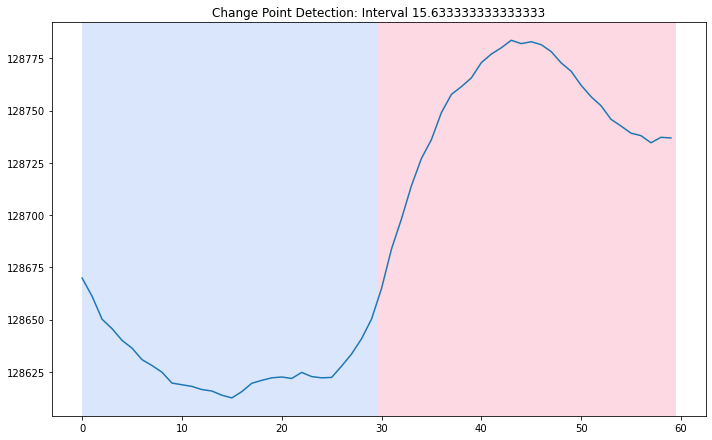

Its detected
4.7491525423728325


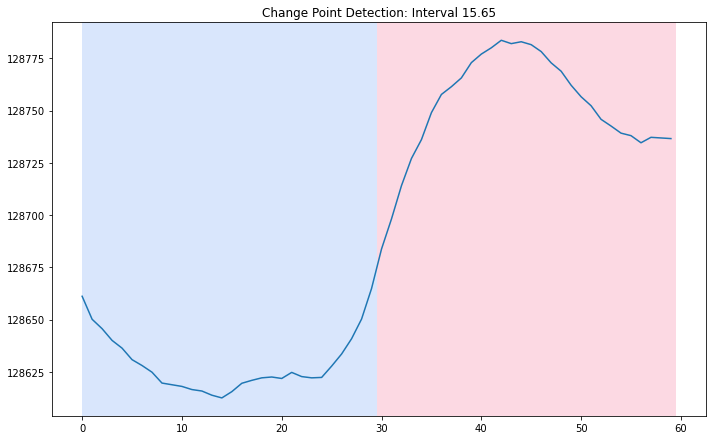

Its detected
4.649152542372684


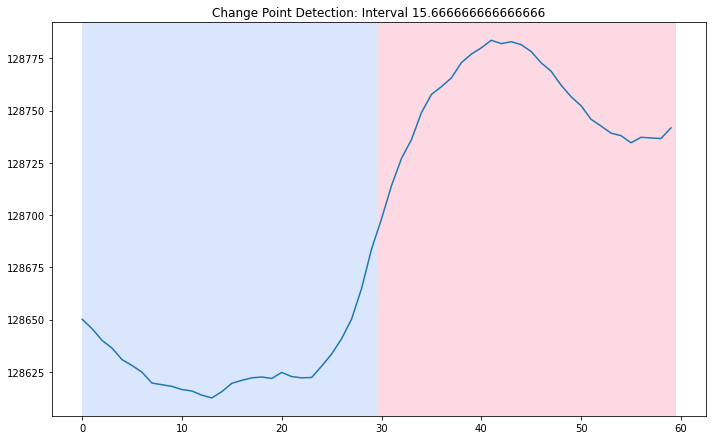

Its detected
4.676271186440579


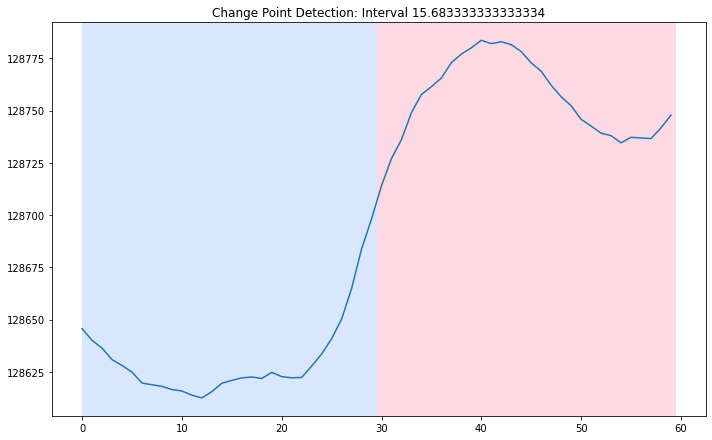

Its detected
4.632203389830558


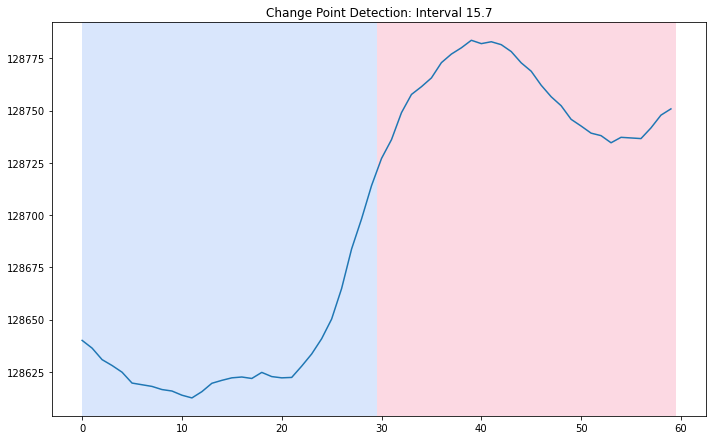

Its detected
4.68305084745743


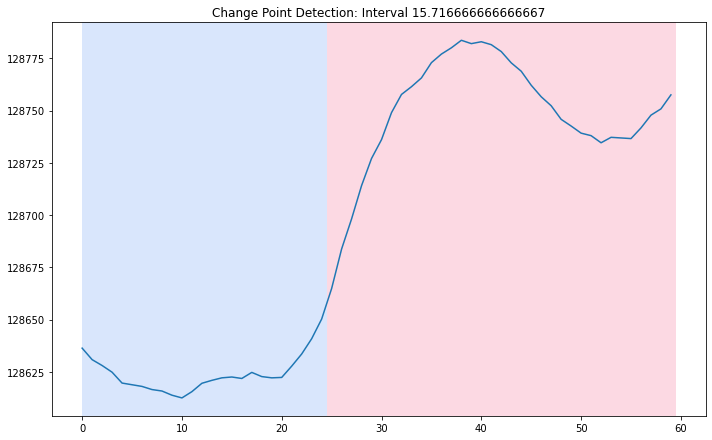

Its detected
4.7508474576269215


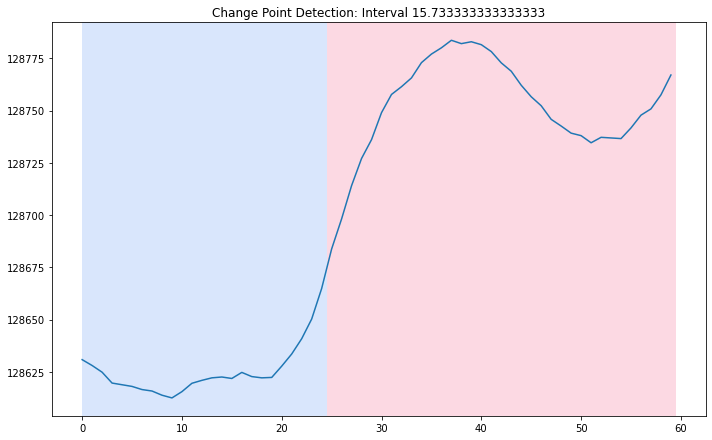

Its detected
4.869491525423778


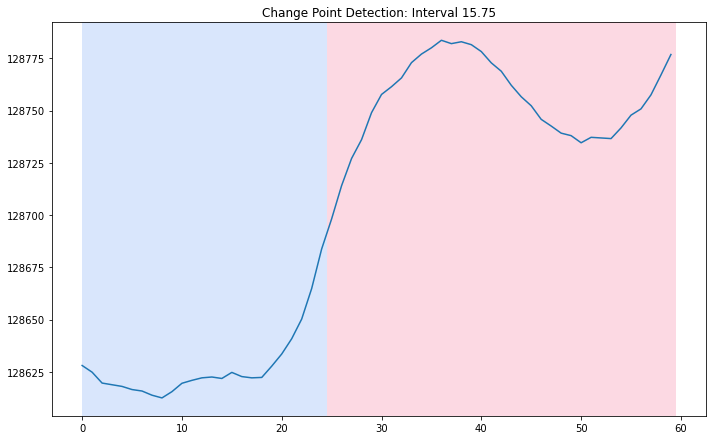

Its detected
4.898275862068815


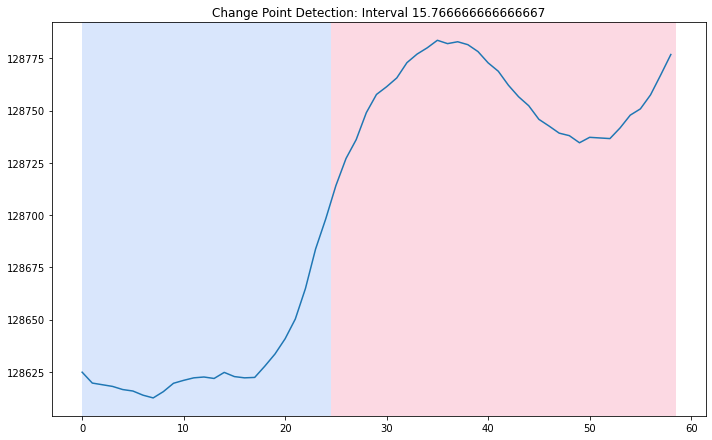

Its detected
4.892982456140249


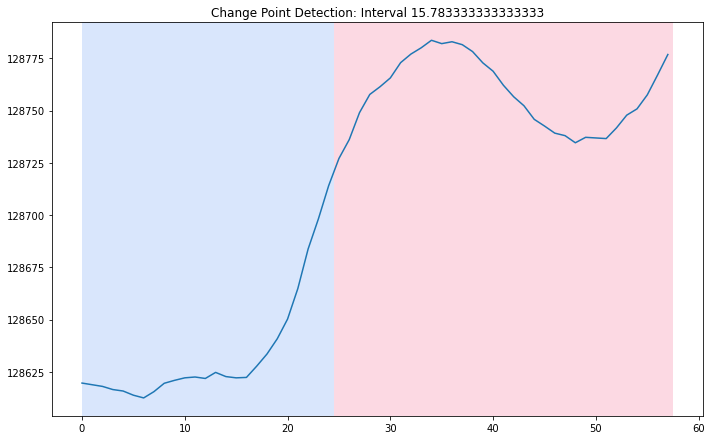

Its detected
4.966071428571273


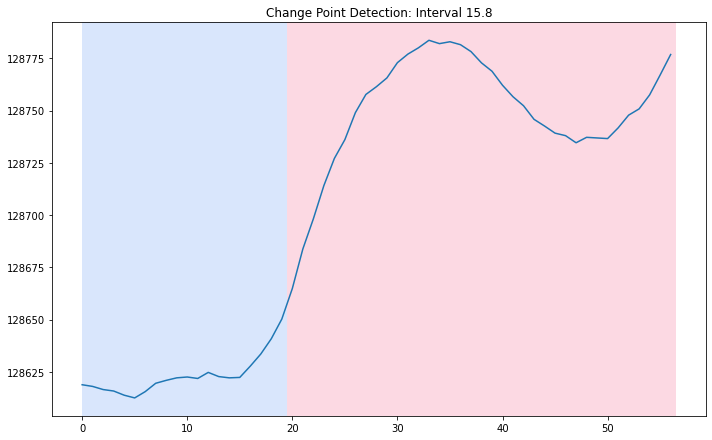

Its detected
5.041818181818234


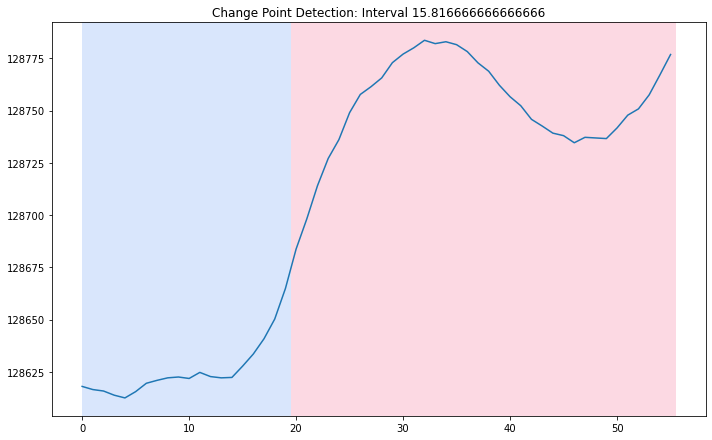

Its detected
5.107407407407461


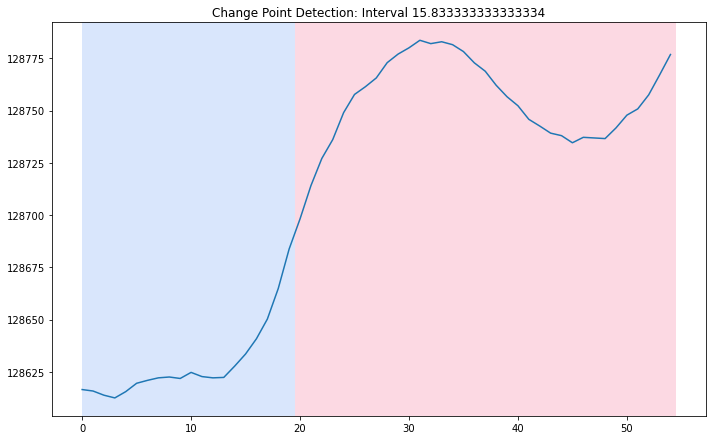

Its detected
5.190566037735684


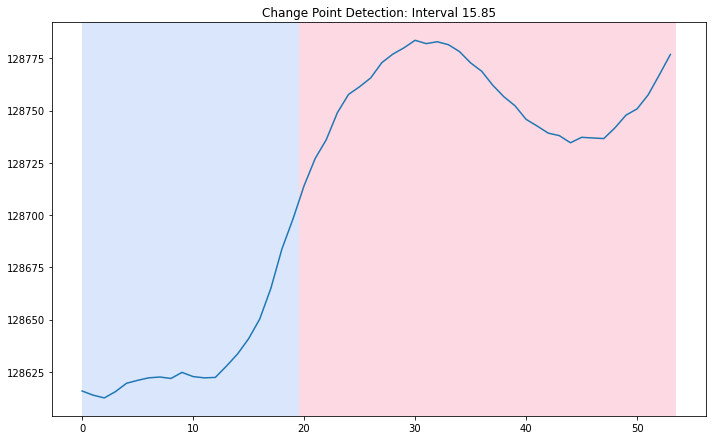

Its detected
5.251923076922909


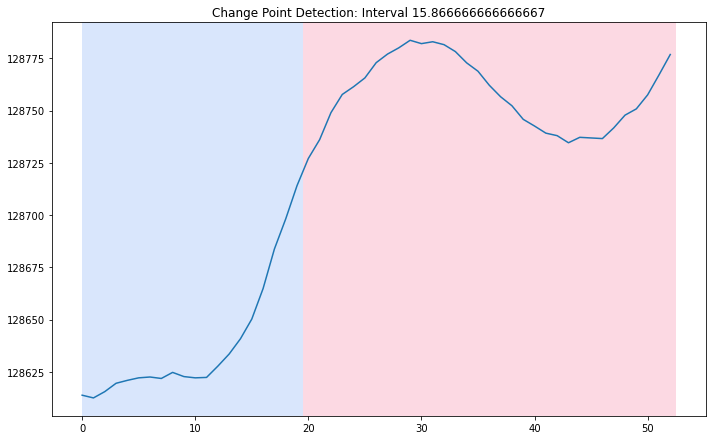

Its detected
5.32941176470594


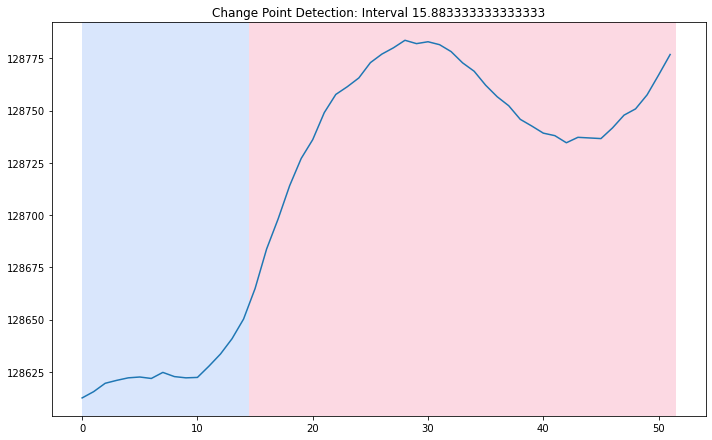

Its detected
5.376000000000058


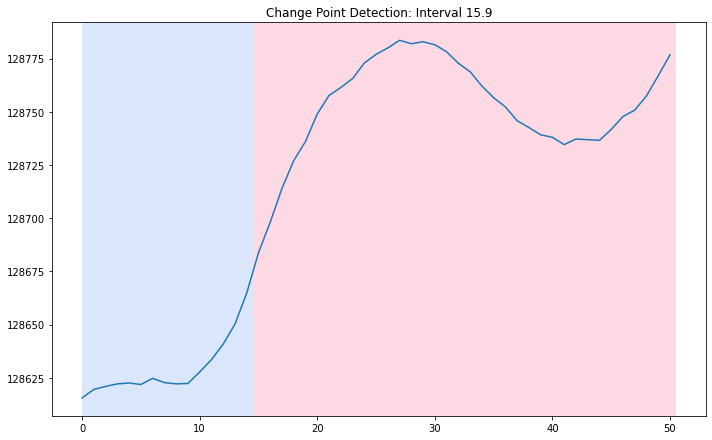

Its detected
5.404081632653121


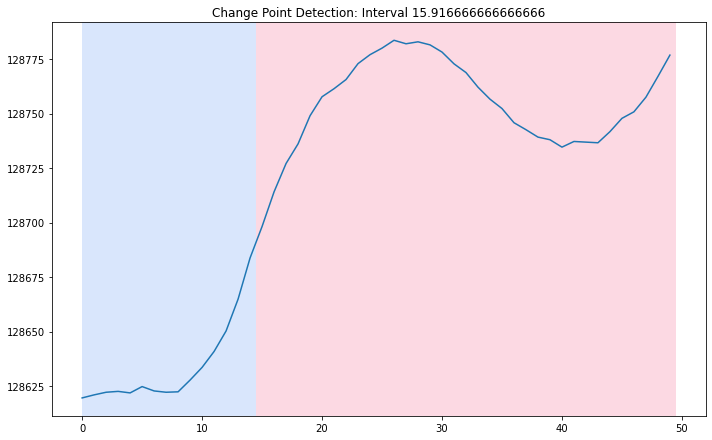

Its detected
5.487500000000182


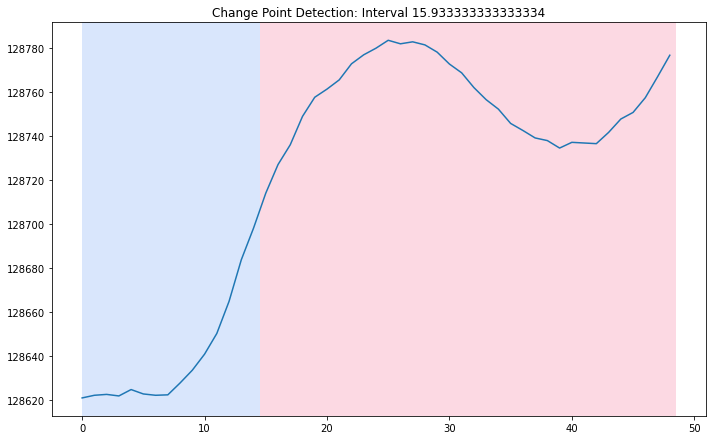

Its detected
5.578723404255567


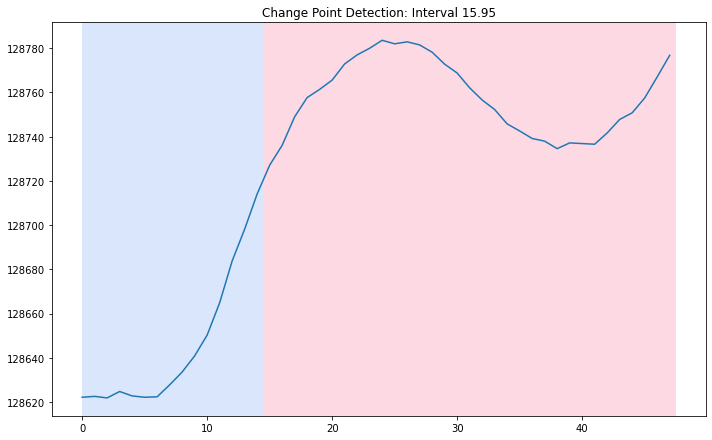

Its detected
5.69130434782615


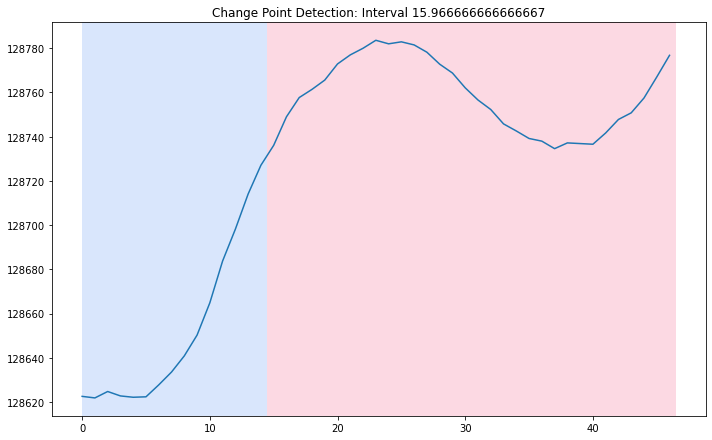

Its detected
5.802222222222028


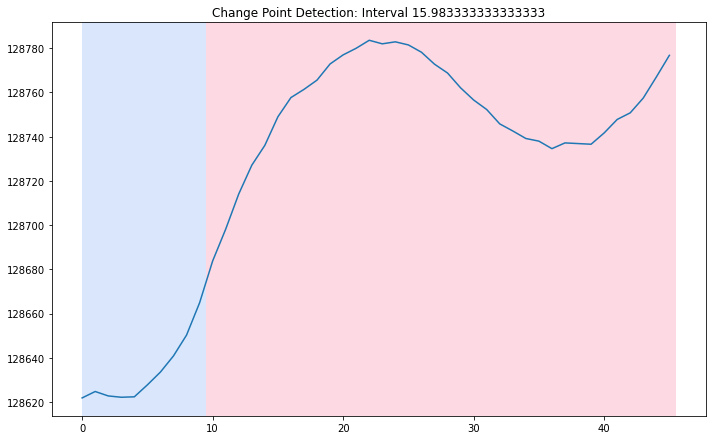

Its detected
5.868181818181421


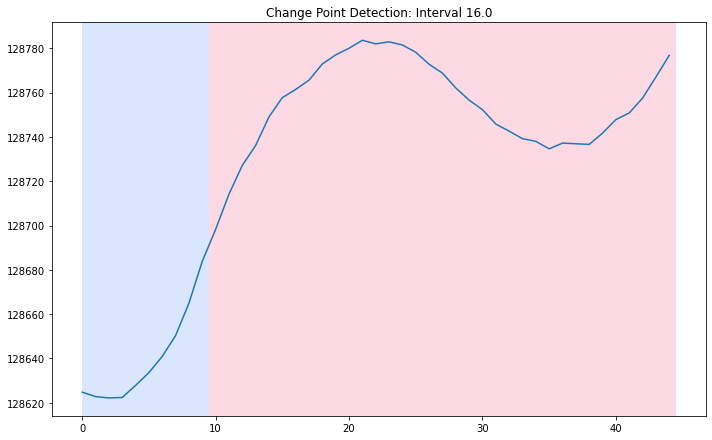

Its detected
5.958139534883315


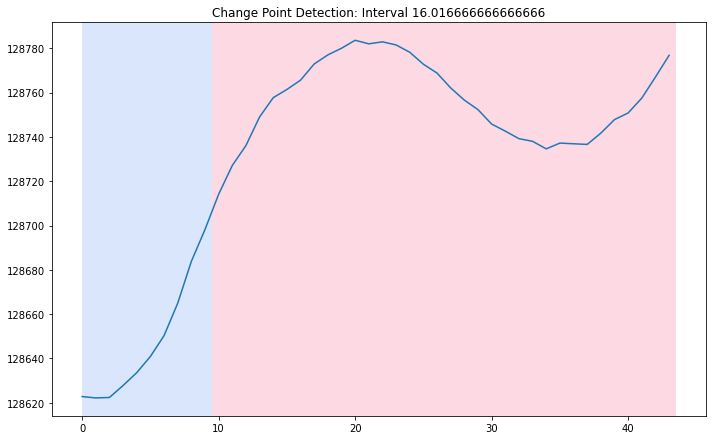

Its detected
6.085714285713731


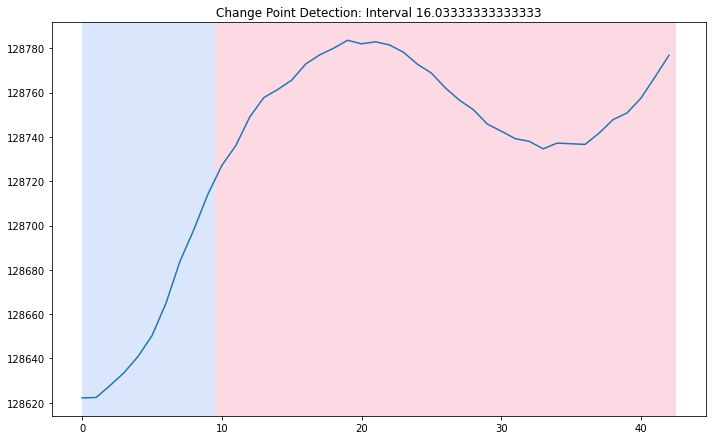

Its detected
6.22926829268243


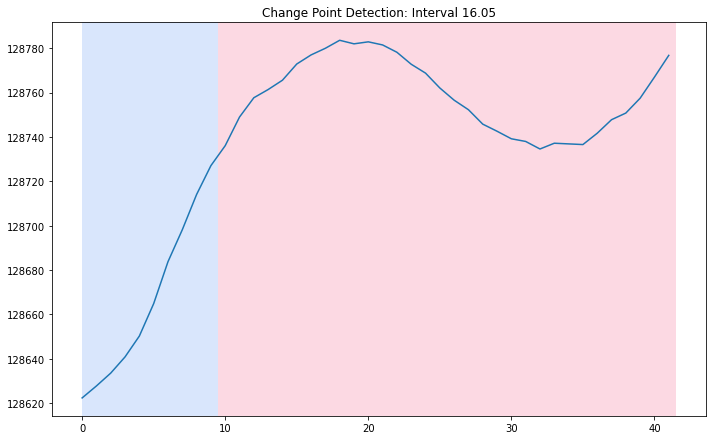

Its detected
6.249999999999273


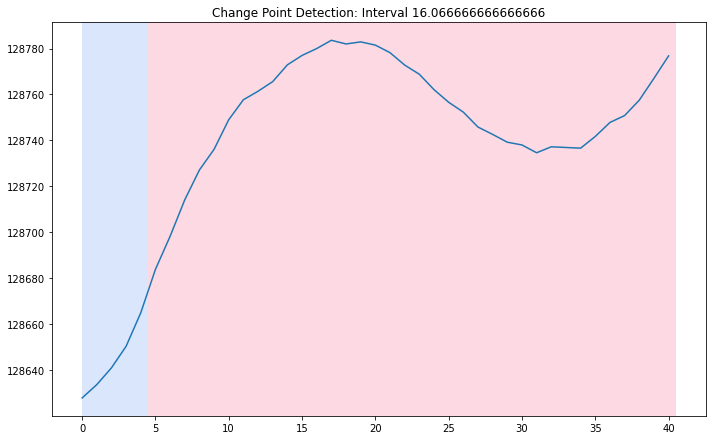

Its detected
6.261538461537641


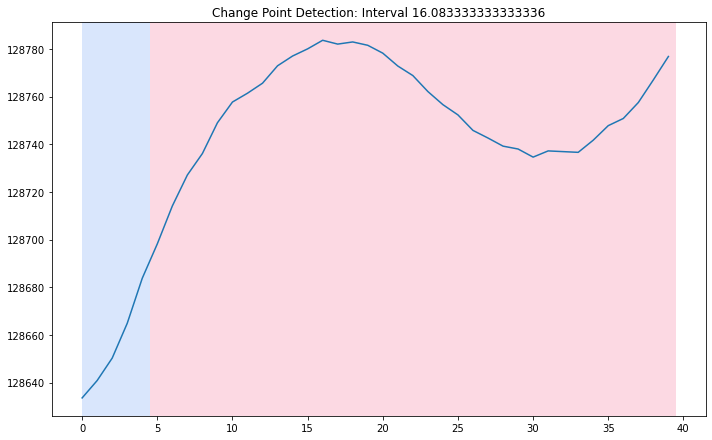

Its detected
6.234210526315254


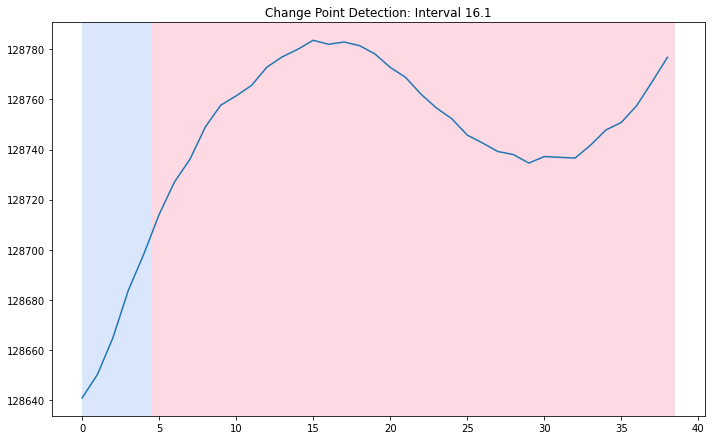

Its detected
6.148648648647862


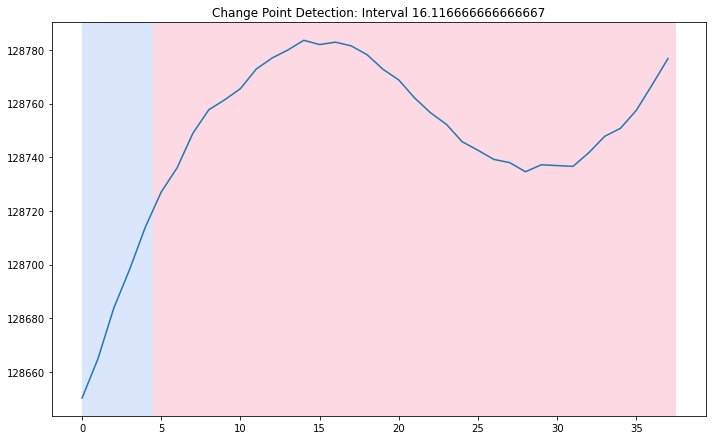

Its detected
5.913888888888323


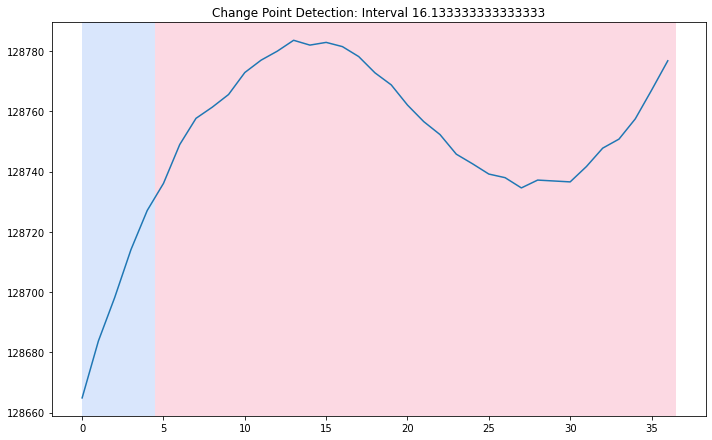

Its detected
5.542857142856311


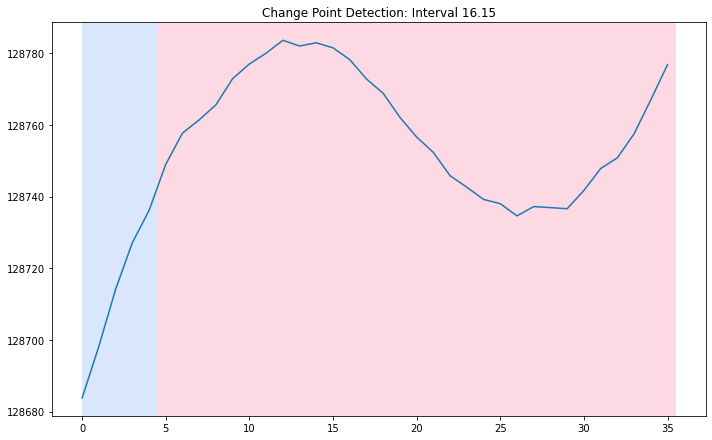

Its detected
5.282352941175786


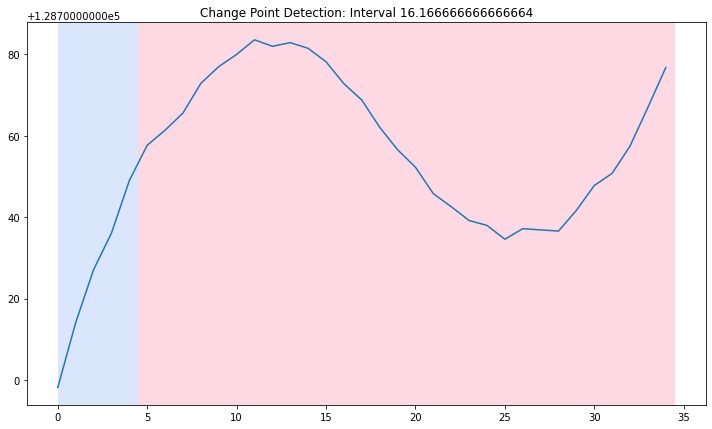

Its detected
4.96060606060509


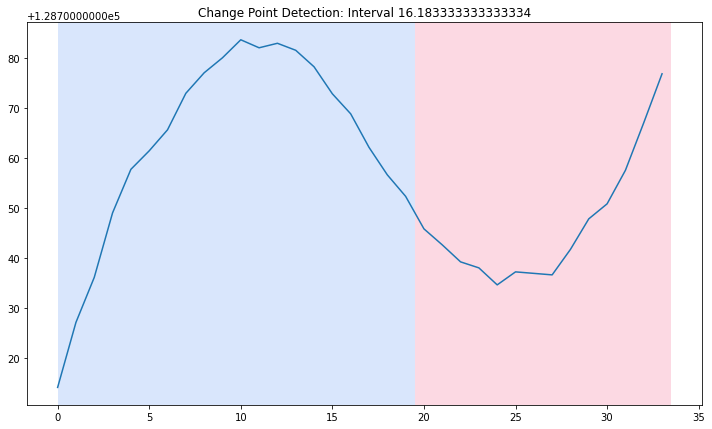

Its detected
4.7093749999989996


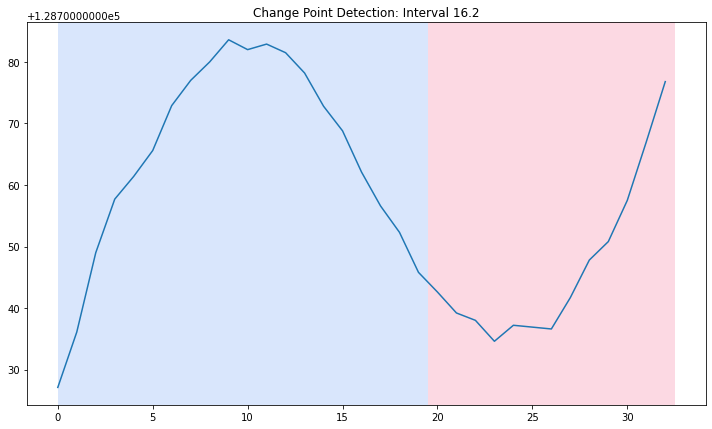

Its detected
4.570967741934451


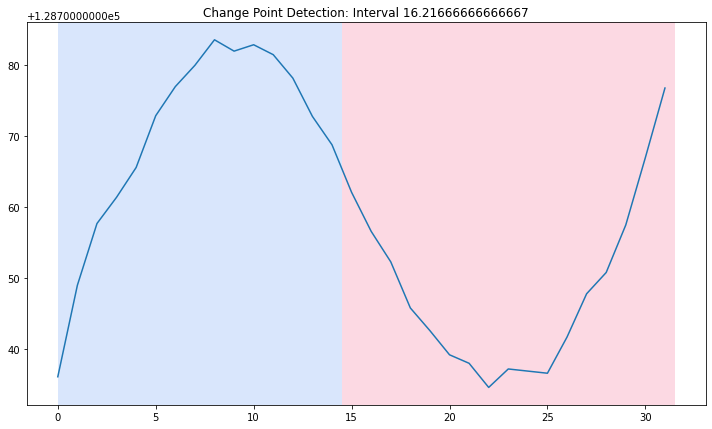

Its detected
4.29333333333246


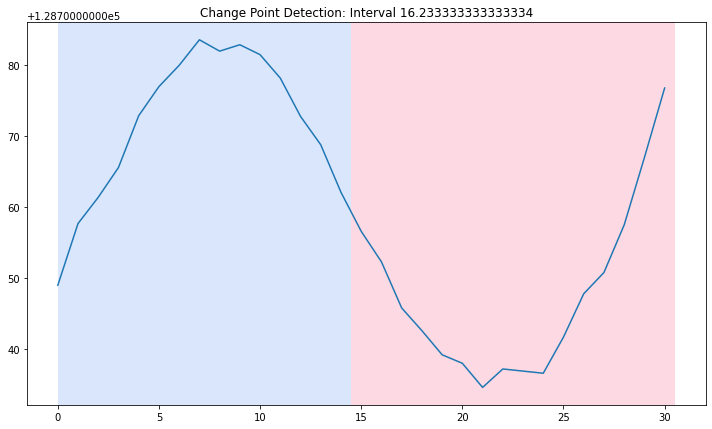

Its detected
4.141379310344025


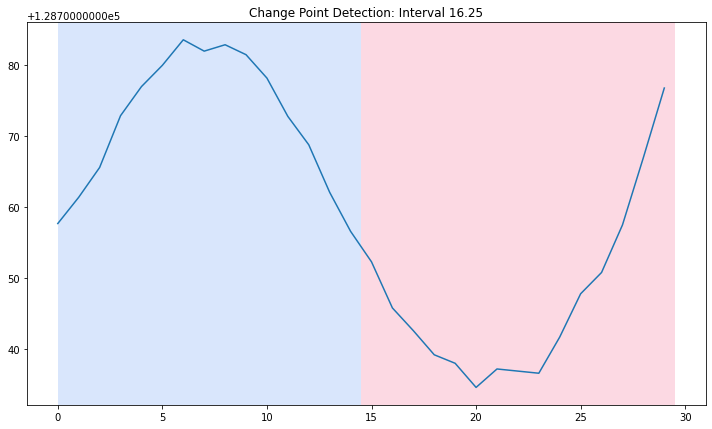

Its detected
4.157142857142129


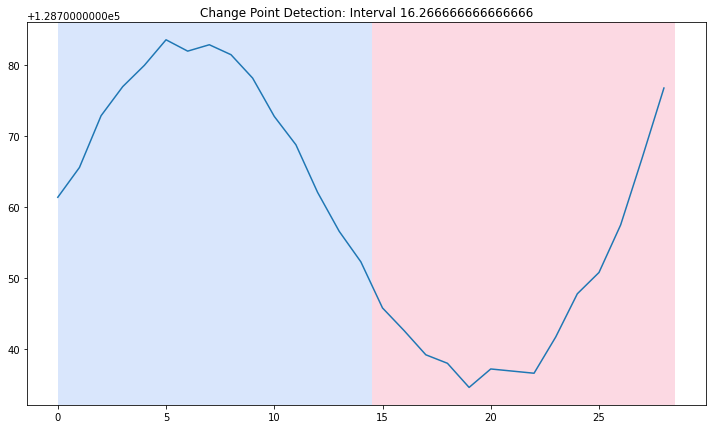

Its detected
4.15555555555437


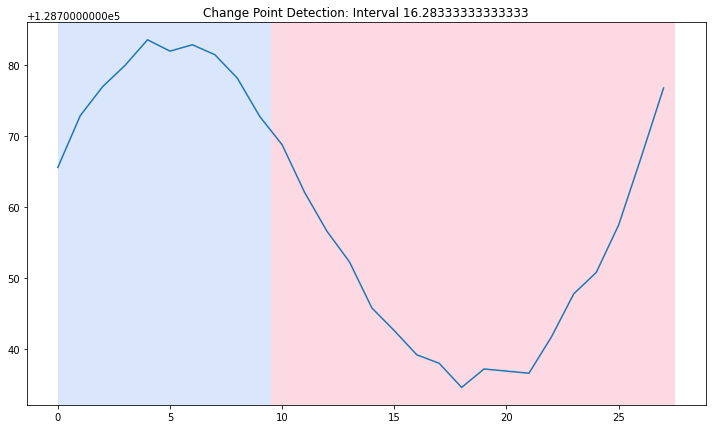

Its detected
4.034615384614601


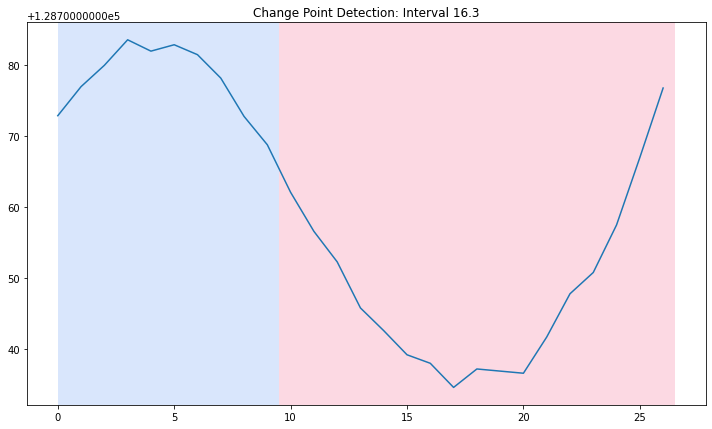

Its detected
4.031999999998952


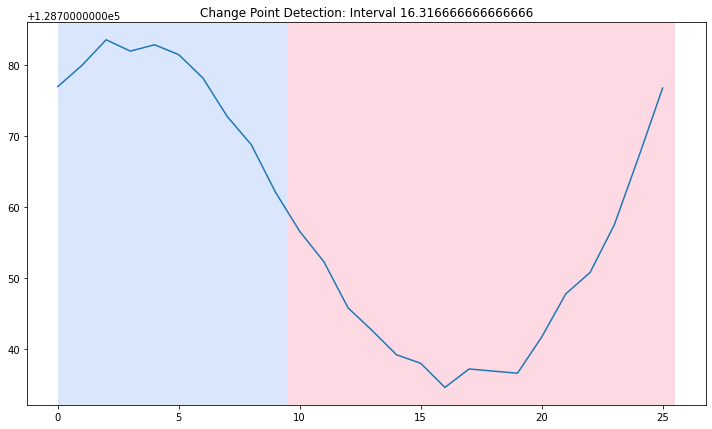

Its detected
4.074999999998909


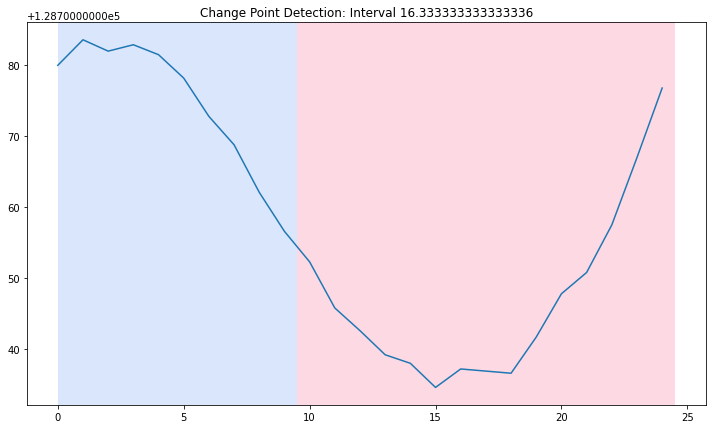

Its detected
4.095652173911652


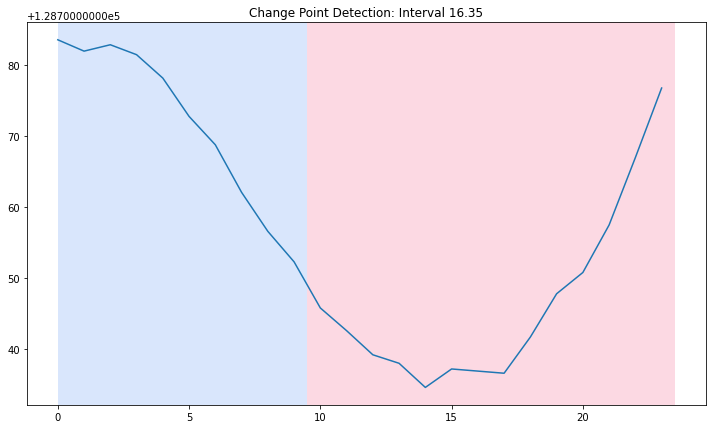

Its detected
4.2090909090891895


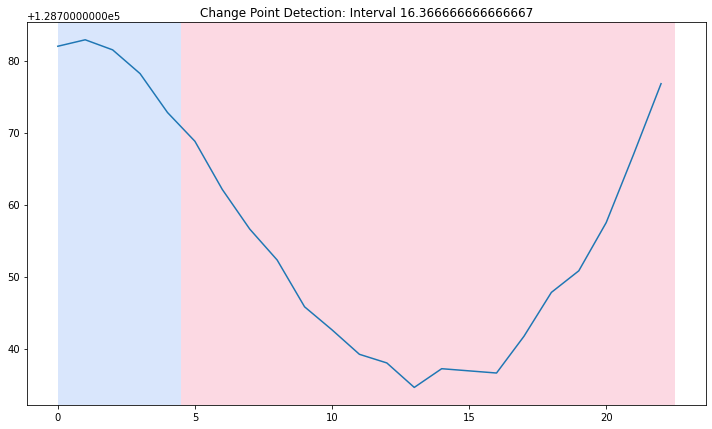

Its detected
4.366666666665142


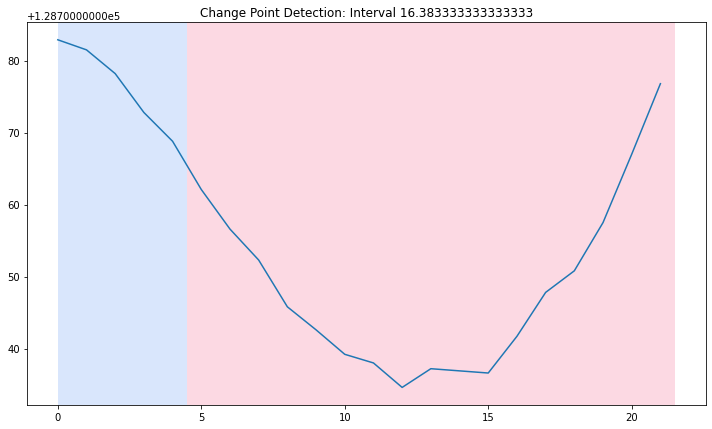

Its detected
4.5149999999986905


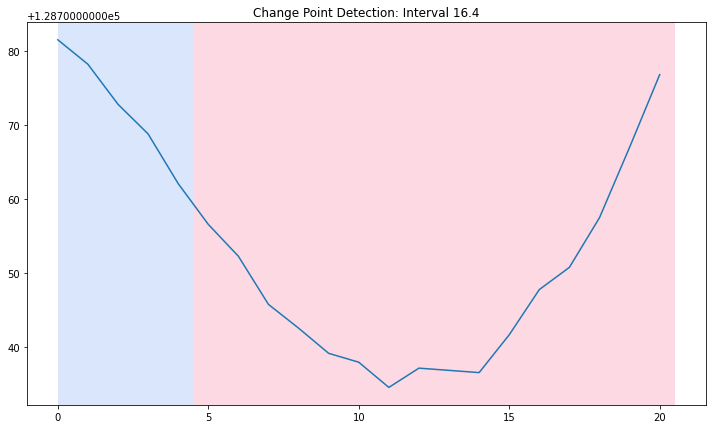

Its detected
4.578947368419521


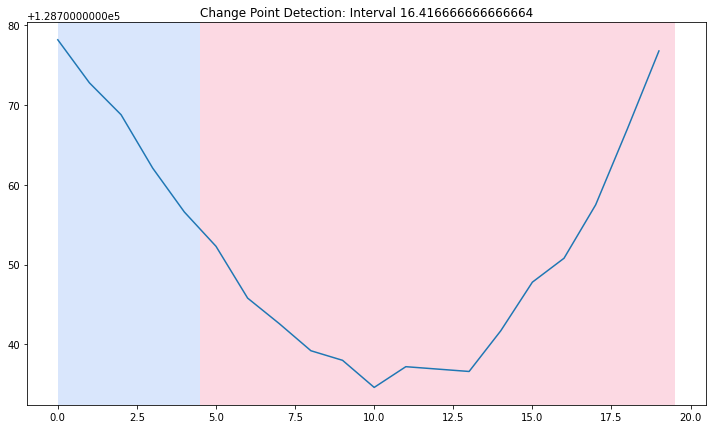

Its detected
4.53333333333204


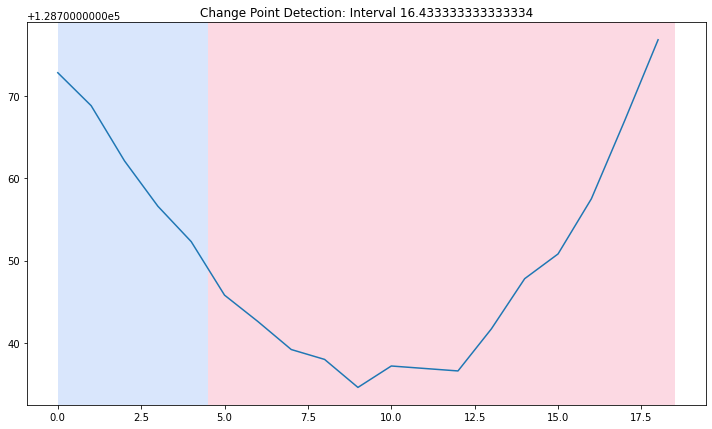

Its detected
4.564705882351571


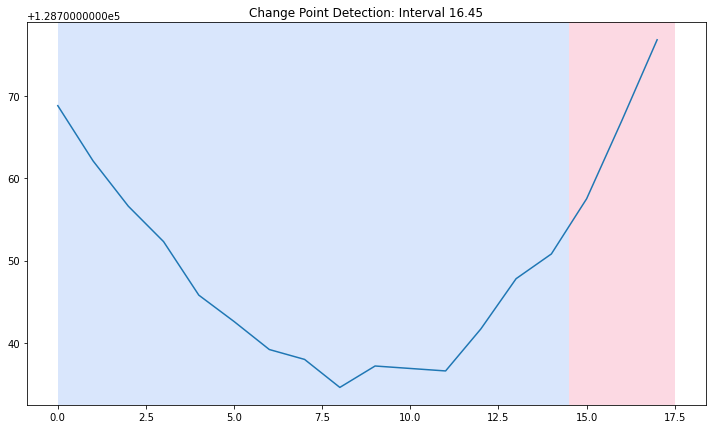

Its detected
4.431249999998727


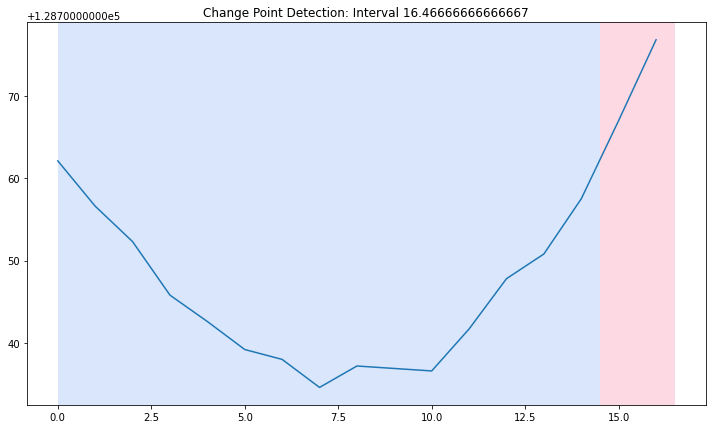

Its detected
4.359999999998641


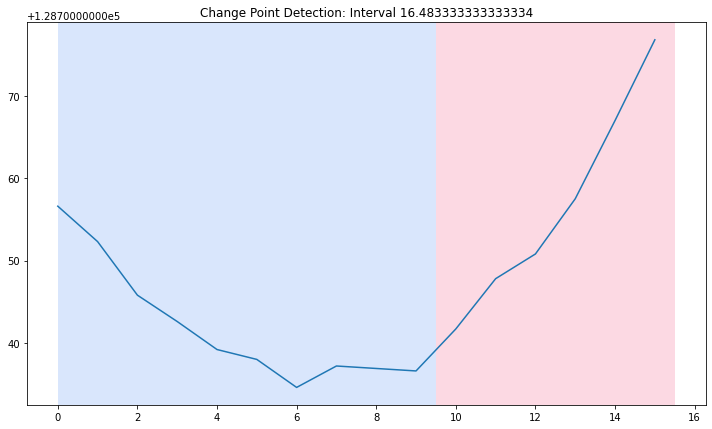

Its detected
4.364285714284051


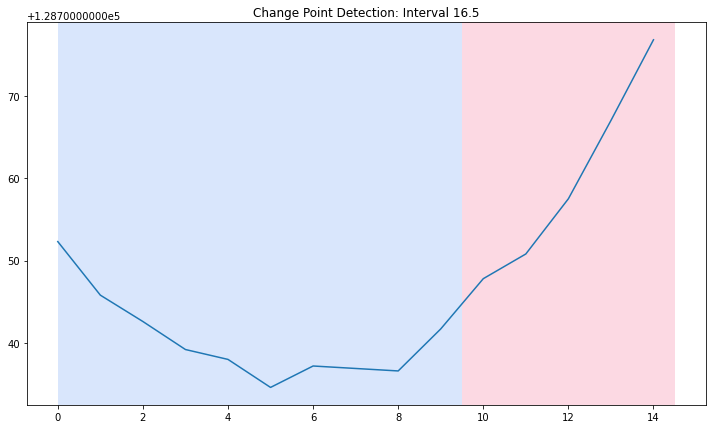

Its detected
4.199999999998209


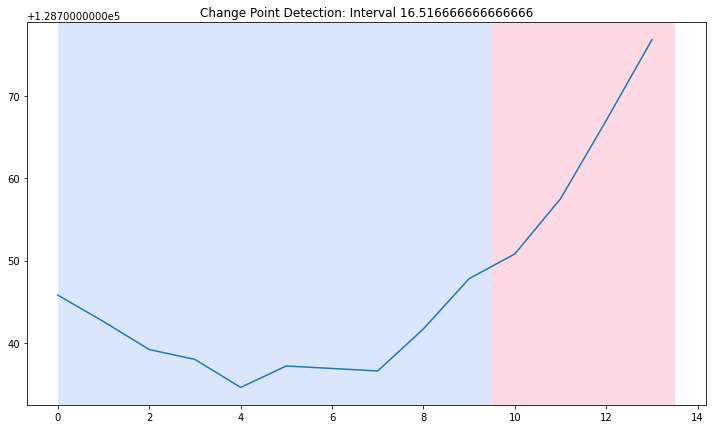

Its detected
4.283333333331636


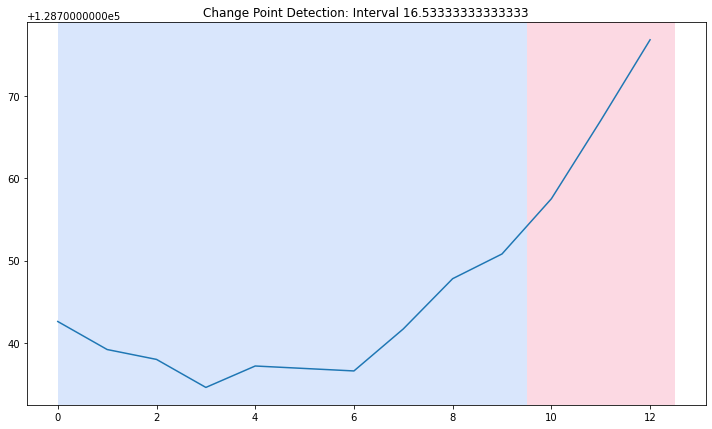

Its detected
4.363636363633717


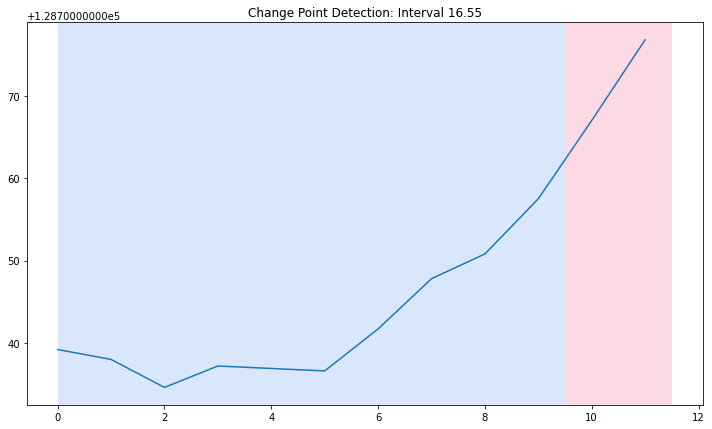

Its detected
4.6799999999973805


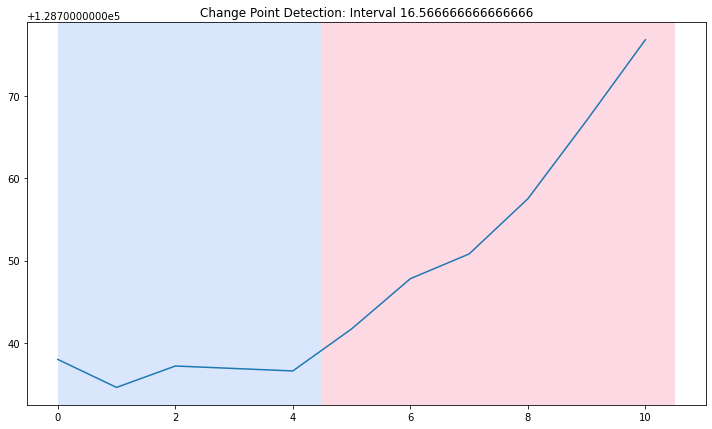

Its detected
4.822222222219959


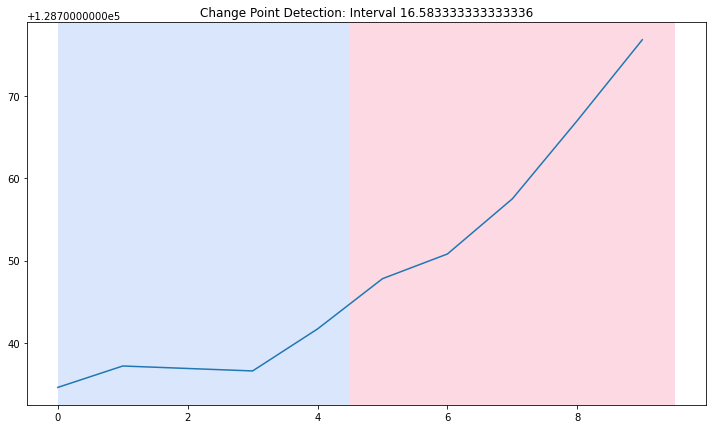

Its detected
5.099999999998545


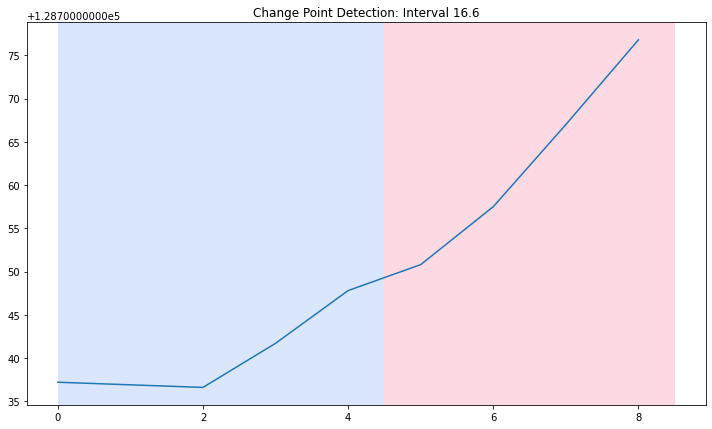

Its detected
5.785714285712207


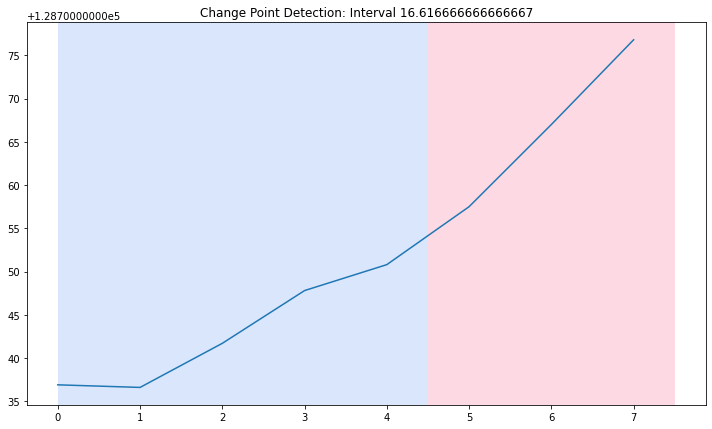

Its detected
6.699999999999515


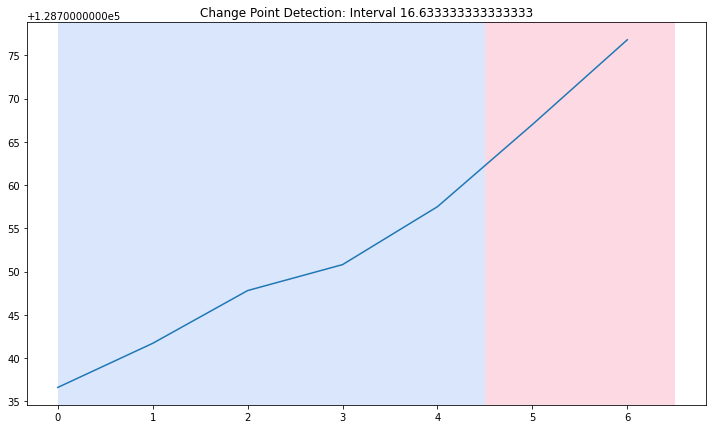

Its detected
7.020000000001164


BadSegmentationParameters: 

In [39]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\IOCL_data\1_2_2023_all_sensor_handheld_12 min expt\Syn_99sccm+so2_18.9 sccm_3min_8ppm\2302010750_MOX.csv')
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'][500:])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (0,10)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60,1
    
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]
    
    # Check if the slope between two points is within the in particular range  
    '''Though its finding slope for every data point inside the model but in particular range whats the overall slope if it lies then only it moves inside if block '''
    slope = np.abs(np.diff(current_data)).mean()
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        print("Its detected")
        print(slope)
        model = "l2"#Its a regularization techniques
        # Fit the change point detection algorithm to the current interval
        algo = rpt.Binseg(model=model).fit(current_data)
        my_bkps = algo.predict(n_bkps=1)
        
        # Display the change point detection results
        rpt.show.display(current_data, my_bkps, figsize=(10,6))
        plt.title(f'Change Point Detection: Interval {start_idx/interval_length+1}')
        plt.show()
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += 1


In [6]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\IOCL_data\1_2_2023_all_sensor_handheld_12 min expt\Syn_99sccm+so2_18.9 sccm_3min_8ppm\2302010750_MOX.csv')
data = np.array(df['MOX1(Ohms)'][500:])
start_idx = 540
interval_length=60
end_idx = start_idx +  interval_length  #---0+60,1
current_data = data[start_idx:end_idx]
slope = np.abs(np.diff(current_data))
slope

array([ 12.8,   9.6,   9.7,  11.6,   8.4,  14.4,  13.1,  17. ,  16.4,
        20.7,  20.9,  22.8,  27.1,  24.3,  27.5,  29. ,  29.6,  31.5,
        31.1,  32.6,  34.1,  35.9,  34.3,  33.8,  34.9,  35.3,  34.3,
        34.7,  35.6,  35. ,  36.5,  37.6,  39. ,  36. ,  39.1,  39.8,
        41.9,  43.2,  43. ,  45.7,  44.3,  48. ,  46.3,  48.8,  45.9,
        42.7,  47.7,  38.1,  33.5,  27.3,  21.9,  11.1,   2.3,  -5.5,
       -19.7, -23.7, -28.2, -33.6, -41.9])

# with explanation

In [ ]:
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'][530:570])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (20,91)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60
    
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]#---[0:60]
    
    # Check if the slope between two points is within the threshold
    slope = np.abs(np.diff(current_data)).mean()
    #np.diff(current_data)--1,2,3=-1,-1---n converts into n-1
    #From the current_data range giving  ,,it will be finding out mean for every sec
    
    if slope_threshold[0] <= slope <= slope_threshold[1]:# Checking on range whether it lies or not
        
        # Fit the change point detection algorithm to the current interval
        model = "l2"
        algo = rpt.Binseg(model=model).fit(current_data)
        my_bkps = algo.predict(n_bkps=1)#More-Minumum --Before 1 to 5 safe
        
        # Display the change point detection results
        rpt.show.display(current_data, my_bkps, figsize=(10,6))
        plt.show()
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += 1
